# <font color='blue'>Complete analysis of Machine Learning and Deep Learning using 11 Tumors database Simon Orozco Arias - Reinel Tabares Soto</font> 

# Import of libraries

In [1]:
import seaborn as sn; sn.set() 
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as colors

from mpl_toolkits.axes_grid1 import make_axes_locatable
from pandas import set_option


from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import classification_report

from sklearn import preprocessing
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import decomposition
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
from scipy.spatial.distance import pdist, squareform
from scipy.stats import mode

from keras.layers import Dense
import matplotlib.pyplot as plt
from pandas import set_option
import pandas as pd
from keras.models import Sequential
import keras.utils
from keras.utils import plot_model
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn 
import keras
from keras.layers import Dense, Dropout, Activation
from keras.optimizers import SGD
from keras.models import model_from_json
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.layers import Embedding
from keras.layers import Conv1D, GlobalAveragePooling1D, MaxPooling1D

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from keras.utils import np_utils
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import SGD
from keras.layers import Dropout
from keras.constraints import maxnorm
from keras.layers import Dense, Flatten, Conv1D

from keras.layers import Dropout
from keras.constraints import maxnorm

Using TensorFlow backend.


# File read

In [2]:
set_option("display.max_rows", 15)
pd.options.mode.chained_assignment = None

filename = 'data11tumors2.csv'
training_data = pd.read_csv(filename)
training_data

,Class,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D12524,D12525,D12526,D12527,D12528,D12529,D12530,D12531,D12532,D12533
0,7,153,228,32,30,-36,48,984,-19,537,...,100,30,83,28,57,106,128,5,74,-188
1,7,154,99,43,55,66,63,5051,-26,1001,...,27,43,90,30,82,485,896,-2,91,-78
2,7,84,85,19,28,-104,28,2387,-80,1131,...,-32,51,110,10,86,62,76,-47,92,-103
3,7,234,169,40,36,81,6,2657,-6,1214,...,43,52,82,12,135,60,69,22,89,-180
4,7,104,58,42,13,107,5,3562,18,1464,...,159,42,73,1,82,60,50,30,74,-198
5,7,207,408,56,6,41,33,2617,40,1243,...,71,71,131,11,146,204,183,-2,146,-152
6,7,188,245,45,18,-15,44,1885,25,1313,...,22,48,90,14,113,76,131,4,98,-98
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
167,0,106,391,44,104,-52,-104,-10,-93,1573,...,-47,67,59,68,275,234,337,7,139,-195
168,0,105,415,65,61,-7,-49,-80,-76,1757,...,-83,57,121,40,162,134,201,18,114,-256


# Basic statistics 

In [3]:
training_data.describe()

,Class,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,D12524,D12525,D12526,D12527,D12528,D12529,D12530,D12531,D12532,D12533
count,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,...,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000,174.000000
mean,4.425287,218.413793,537.942529,71.965517,83.706897,-67.155172,-16.568966,644.988506,76.609195,1472.890805,...,-1.327586,93.120690,138.028736,2.839080,97.948276,62.850575,102.396552,12.913793,206.942529,-220.873563
std,3.245743,117.290761,268.926376,43.827156,122.828468,141.340339,62.832499,1092.470272,863.362875,650.125888,...,96.165089,45.964957,67.895485,44.568288,95.784336,80.848968,127.692587,27.441552,402.505214,217.480811
min,0.000000,-122.000000,30.000000,-24.000000,-80.000000,-900.000000,-206.000000,-551.000000,-205.000000,23.000000,...,-235.000000,12.000000,-26.000000,-146.000000,-349.000000,-184.000000,-75.000000,-56.000000,37.000000,-992.000000
25%,2.000000,148.750000,360.000000,44.000000,24.250000,-129.750000,-58.000000,-32.250000,-67.750000,1060.250000,...,-54.750000,59.250000,92.250000,-20.500000,46.000000,16.000000,20.500000,-4.000000,96.000000,-332.500000
50%,4.000000,210.500000,520.500000,65.000000,65.000000,-43.500000,-15.000000,146.000000,-35.500000,1427.500000,...,-5.500000,87.500000,131.500000,7.000000,113.000000,43.000000,73.500000,10.000000,142.000000,-208.500000
75%,7.000000,281.750000,706.750000,87.750000,111.000000,26.500000,23.000000,838.750000,-3.750000,1774.500000,...,41.000000,118.750000,169.500000,33.500000,155.500000,96.750000,145.000000,25.500000,210.500000,-142.000000
max,10.000000,616.000000,1419.000000,247.000000,1307.000000,264.000000,138.000000,5218.000000,10019.000000,4120.000000,...,452.000000,270.000000,414.000000,100.000000,480.000000,485.000000,896.000000,109.000000,4888.000000,1351.000000


In [4]:
# class dist|ribution
print(training_data.groupby('Class').size())

Class
0     27
1      8
2     26
3     23
4     12
5     11
6      7
7     26
8      6
9     14
10    14
dtype: int64


# Data imputation

In [5]:
#from sklearn.preprocessing import Imputer
#imputer = Imputer(missing_values='NaN', strategy='median', axis=1)
#imputer = imputer.fit(training_data)
#training_data = imputer.transform(training_data)
#training_data

# Separation of labels and features 

In [6]:
label_vectors = training_data['Class'].values
feature_vectors = training_data.drop(['Class'], axis=1).values

In [7]:
label_vectors

array([ 7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  1,  1,  1,  1,  1,  1,  1,
        1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,
        4,  5,  5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  8,  8,  8,  8,  8,  8,  9,  9,
        9,  9,  9,  9,  9,  9,  9, 10, 10, 10, 10, 10, 10, 10, 10,  2, 10,
        4,  3,  0,  6,  0,  0,  3,  2,  9, 10,  7,  7,  2,  2,  5,  2,  0,
        9,  3,  3,  3,  3,  3,  3,  3,  3,  3,  3,  9, 10,  9, 10, 10,  9,
       10,  2,  2,  2,  2,  2,  2,  2,  2,  2,  7,  7,  7,  7,  7,  7,  7,
        7,  7,  7,  7,  7,  7,  7,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0], dtype=int64)

In [8]:
feature_vectors

array([[ 153,  228,   32, ...,    5,   74, -188],
       [ 154,   99,   43, ...,   -2,   91,  -78],
       [  84,   85,   19, ...,  -47,   92, -103],
       ...,
       [ 579,  667,   55, ...,  -42,  171, -371],
       [ 252,  582,   88, ...,    0,  201, -333],
       [  83,  420,   14, ...,   12,   80, -180]], dtype=int64)

# Information scaling

In [9]:
scaler = preprocessing.StandardScaler().fit(feature_vectors)
feature_vectors_scaler = scaler.transform(feature_vectors)

# Information Split - without scaling

In [10]:
validation_size = 0.2
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(feature_vectors, label_vectors, 
                                                                test_size=validation_size, random_state=seed)

In [11]:
X_train.shape

(139, 12533)

# Information Split with scaling

In [12]:
validation_size = 0.2
seed = 7
X_trainScaler, X_validationScaler, Y_trainScaler, Y_validationScaler = train_test_split(feature_vectors_scaler, label_vectors, 
                                                                                        test_size=validation_size, 
                                                                                        random_state=seed)

# PCA - without scaling

In [13]:
pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_train)
X_trainPCA = pca.transform(X_train)
X_validationPCA=pca.transform(X_validation)

In [14]:
print('X_PCA:',X_trainPCA.shape)

X_PCA: (139, 83)


# PCA - with scaling

In [15]:
pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors)
feature_vectorsPCA = pca.transform(feature_vectors)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(feature_vectors_scaler)
feature_vectorsPCA_Scaler = pca.transform(feature_vectors_scaler)

pca = decomposition.PCA(n_components=0.96,svd_solver='full',tol=1e-4)
pca.fit(X_trainScaler)
X_trainPCAScaler = pca.transform(X_trainScaler)
X_validationPCAScaler=pca.transform(X_validationScaler)

In [16]:
print('X_PCA:',X_trainPCAScaler.shape)

X_PCA: (139, 113)


# Metrics

In [17]:
def metrics(Y_validation,predictions):
    print('Accuracy:', accuracy_score(Y_validation, predictions))
    print('F1 score:', f1_score(Y_validation, predictions,average='weighted'))
    print('Recall:', recall_score(Y_validation, predictions,average='weighted'))
    print('Precision:', precision_score(Y_validation, predictions, average='weighted'))
    print('\n clasification report:\n', classification_report(Y_validation, predictions))
    print('\n confusion matrix:\n',confusion_matrix(Y_validation, predictions))
    #Creamos la matriz de confusión
    snn_cm = confusion_matrix(Y_validation, predictions)

    # Visualizamos la matriz de confusión
    snn_df_cm = pd.DataFrame(snn_cm, range(11), range(11))  
    plt.figure(figsize = (20,14))  
    sn.set(font_scale=1.4) #for label size  
    sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
    plt.show()  

# Herarchical clustering

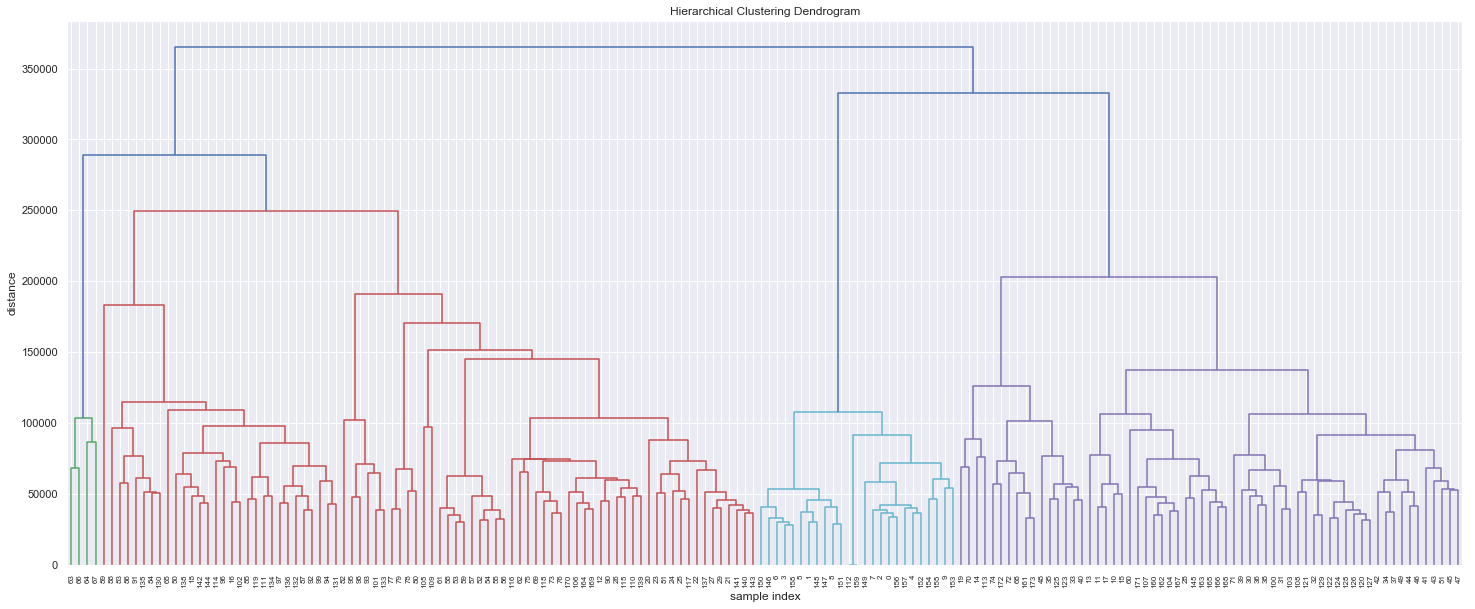

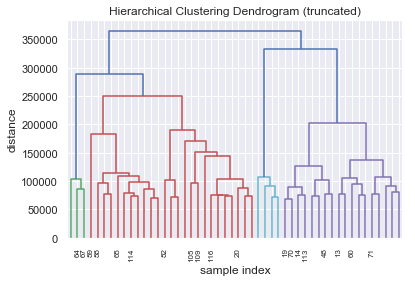

In [18]:
x=feature_vectors
# generate the linkage matrix
# Performs hierarchical/agglomerative clustering.
Z = linkage(x,method='ward',metric='euclidean')

# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
           Z,
           leaf_rotation=90.,  # rotates the x axis labels
           leaf_font_size=8.,  # font size for the x axis labels
           )
plt.show()

plt.title('Hierarchical Clustering Dendrogram (truncated)')
plt.xlabel('sample index')
plt.ylabel('distance')
dendrogram(
           Z,
           truncate_mode='lastp',  # show only the last p merged clusters
           p=50,  # show only the last p merged clusters
           show_leaf_counts=False,  # otherwise numbers in brackets are counts
           leaf_rotation=90.,
           leaf_font_size=8.,
           show_contracted=True,  # to get a distribution impression in truncated branches
           )
plt.show()

# Herarchical clustering with Heatmap

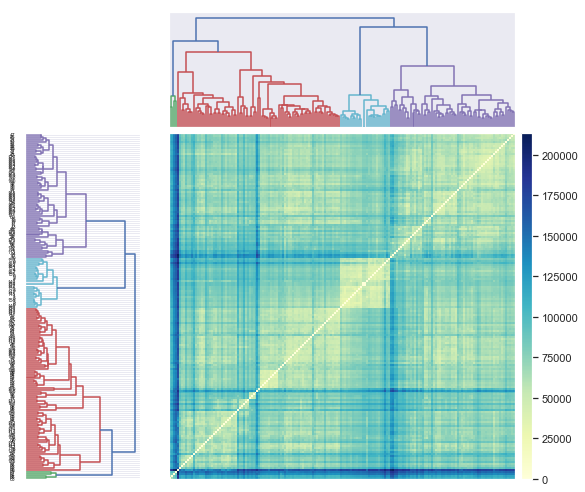

In [19]:
data_dist = pdist(x)
# Compute and plot first dendrogram.
fig = plt.figure(figsize=(8,8))
# x ywidth height
ax1 = fig.add_axes([0.05,0.1,0.2,0.6])
Y = linkage(data_dist, method='ward')
Z1 = dendrogram(Y, orientation='right') # adding/removing the axes
ax1.set_xticks([])

# Compute and plot second dendrogram.
ax2 = fig.add_axes([0.3,0.71,0.6,0.2])
Z2 = dendrogram(Y)
ax2.set_xticks([])
ax2.set_yticks([])

#Compute and plot the heatmap
axmatrix = fig.add_axes([0.3,0.1,0.6,0.6])
idx1 = Z1['leaves']
idx2 = Z2['leaves']
D = squareform(data_dist)
D = D[idx1,:]
D = D[:,idx2]
im = axmatrix.matshow(D, aspect='auto', origin='lower', cmap=plt.cm.YlGnBu)
axmatrix.set_xticks([])
axmatrix.set_yticks([])

# Plot colorbar.
axcolor = fig.add_axes([0.91,0.1,0.02,0.6])
plt.colorbar(im, cax=axcolor)
plt.show()

# Clustering

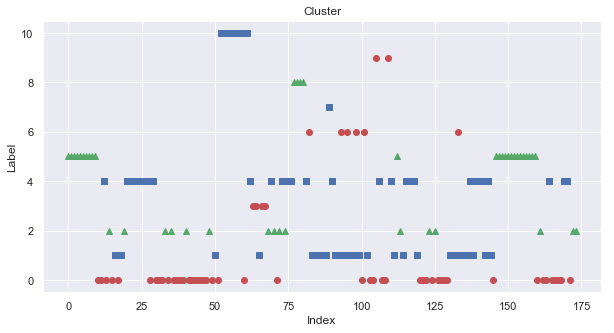

Cluster 0 =  47
Cluster 1 =  29
Cluster 2 =  16
Cluster 3 =  4
Cluster 4 =  31
Cluster 5 =  25
Cluster 6 =  6
Cluster 7 =  1
Cluster 8 =  4
Cluster 9 =  2
Cluster 10 =  9


In [20]:
cluster = AgglomerativeClustering(n_clusters=11, affinity='euclidean', linkage='ward')  
clus=cluster.fit_predict(feature_vectors)
plt.figure(figsize=(10, 5))
cont0=0 
cont1=0 
cont2=0
cont3=0
cont4=0
cont5=0
cont6=0
cont7=0
cont8=0
cont9=0
cont10=0
for x in range(0, 174):
    if clus[x]==0:
        plt.plot(x,clus[x],'ro')
        cont0+=1
    elif clus[x]==1:
        plt.plot(x,clus[x],'bs')
        cont1+=1
    elif clus[x]==2:
        plt.plot(x,clus[x],'g^')
        cont2+=1
    elif clus[x]==3:
        plt.plot(x,clus[x],'ro')
        cont3+=1
    elif clus[x]==4:
        plt.plot(x,clus[x],'bs')
        cont4+=1
    elif clus[x]==5:
        plt.plot(x,clus[x],'g^')
        cont5+=1
    elif clus[x]==6:
        plt.plot(x,clus[x],'ro') 
        cont6+=1
    elif clus[x]==7:
        plt.plot(x,clus[x],'bs') 
        cont7+=1
    elif clus[x]==8:
        plt.plot(x,clus[x],'g^')
        cont8+=1
    elif clus[x]==9:
        plt.plot(x,clus[x],'ro')
        cont9+=1
    elif clus[x]==10:
        plt.plot(x,clus[x],'bs') 
        cont10+=1

plt.title('Cluster')
plt.xlabel('Index')
plt.ylabel('Label')
plt.show()
print('Cluster 0 = ',cont0)
print('Cluster 1 = ',cont1)
print('Cluster 2 = ',cont2)
print('Cluster 3 = ',cont3)
print('Cluster 4 = ',cont4)
print('Cluster 5 = ',cont5)
print('Cluster 6 = ',cont6)
print('Cluster 7 = ',cont7)
print('Cluster 8 = ',cont8)
print('Cluster 9 = ',cont9)
print('Cluster 10 = ',cont10)

# 1. KNN algorithm

In [21]:
#Testing different quantities of neighbors
limit=100
x=[x for x in range(1,limit)]
yValidation=[0 for x in range(1,limit)]
ytrain=[0 for x in range(1,limit)]
yValidationScaler=[0 for x in range(1,limit)]
ytrainScaler=[0 for x in range(1,limit)]
yValidationPCA=[0 for x in range(1,limit)]
ytrainPCA=[0 for x in range(1,limit)]
yValidationPCAScaler=[0 for x in range(1,limit)]
ytrainPCAScaler=[0 for x in range(1,limit)]
for i in range(1,limit):
    KNN = KNeighborsClassifier(n_neighbors=i)
    
    KNN.fit(X_train, Y_train)
    trainScore=KNN.score(X_train,Y_train)
    validationScore=KNN.score(X_validation,Y_validation)
    
    KNN.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=KNN.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=KNN.score(X_validationScaler,Y_validationScaler)
    
    KNN.fit(X_trainPCA, Y_train)
    trainScorePCA=KNN.score(X_trainPCA,Y_train)
    validationScorePCA=KNN.score(X_validationPCA,Y_validation)
    
    KNN.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=KNN.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=KNN.score(X_validationPCAScaler,Y_validationScaler)
    
    print('KNN Score:',i)
    ytrain[i-1]=trainScore   
    yValidation[i-1]=validationScore
    
    ytrainScaler[i-1]=trainScoreScaler   
    yValidationScaler[i-1]=validationScoreScaler
    
    ytrainPCA[i-1]=trainScorePCA   
    yValidationPCA[i-1]=validationScorePCA
    
    ytrainPCAScaler[i-1]=trainScorePCAScaler   
    yValidationPCAScaler[i-1]=validationScorePCAScaler
    

KNN Score: 1
KNN Score: 2
KNN Score: 3
KNN Score: 4
KNN Score: 5
KNN Score: 6
KNN Score: 7
KNN Score: 8
KNN Score: 9
KNN Score: 10
KNN Score: 11
KNN Score: 12
KNN Score: 13
KNN Score: 14
KNN Score: 15
KNN Score: 16
KNN Score: 17
KNN Score: 18
KNN Score: 19
KNN Score: 20
KNN Score: 21
KNN Score: 22
KNN Score: 23
KNN Score: 24
KNN Score: 25
KNN Score: 26
KNN Score: 27
KNN Score: 28
KNN Score: 29
KNN Score: 30
KNN Score: 31
KNN Score: 32
KNN Score: 33
KNN Score: 34
KNN Score: 35
KNN Score: 36
KNN Score: 37
KNN Score: 38
KNN Score: 39
KNN Score: 40
KNN Score: 41
KNN Score: 42
KNN Score: 43
KNN Score: 44
KNN Score: 45
KNN Score: 46
KNN Score: 47
KNN Score: 48
KNN Score: 49
KNN Score: 50
KNN Score: 51
KNN Score: 52
KNN Score: 53
KNN Score: 54
KNN Score: 55
KNN Score: 56
KNN Score: 57
KNN Score: 58
KNN Score: 59
KNN Score: 60
KNN Score: 61
KNN Score: 62
KNN Score: 63
KNN Score: 64
KNN Score: 65
KNN Score: 66
KNN Score: 67
KNN Score: 68
KNN Score: 69
KNN Score: 70
KNN Score: 71
KNN Score: 72
K

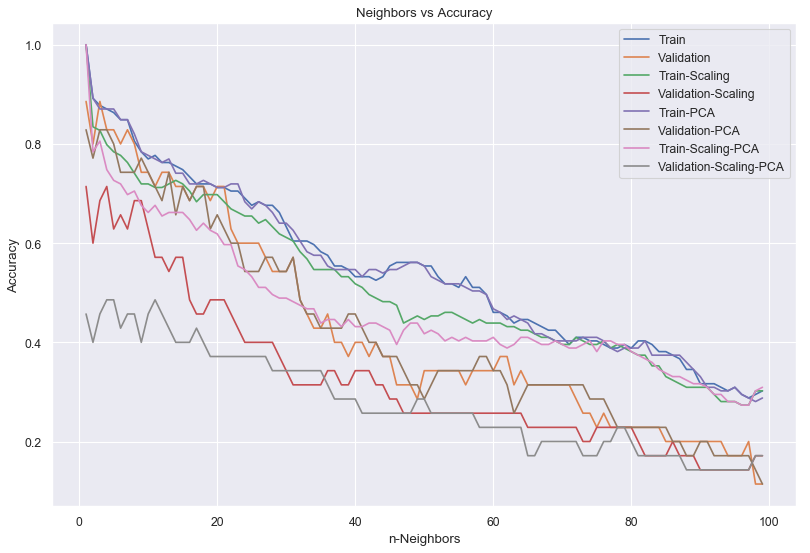

The best score with data validation:  0.8857142857142857 with Neighbors:  1
The best score with data validation with Scaling:  0.7142857142857143 with Neighbors:  1
The best score with data validation with PCA:  0.8285714285714286 with Neighbors:  1
The best score with data validation with Scaling and PCA:  0.4857142857142857 with Neighbors:  4


In [22]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,ytrain,label='Train')
plt.plot(x,yValidation,label='Validation')
plt.plot(x,ytrainScaler,label='Train-Scaling')
plt.plot(x,yValidationScaler,label='Validation-Scaling')
plt.plot(x,ytrainPCA,label='Train-PCA')
plt.plot(x,yValidationPCA,label='Validation-PCA')
plt.plot(x,ytrainPCAScaler,label='Train-Scaling-PCA')
plt.plot(x,yValidationPCAScaler,label='Validation-Scaling-PCA')



plt.xlabel('n-Neighbors')
plt.ylabel('Accuracy')
plt.title('Neighbors vs Accuracy')
plt.legend()
plt.savefig('KNN-Algorithm.png', dpi=100)
plt.show()  
print('The best score with data validation: ', max(yValidation),'with Neighbors: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with Neighbors: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with Neighbors: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with Neighbors: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])

# Show Metrics

Accuracy: 0.8285714285714286
F1 score: 0.7910946196660481
Recall: 0.8285714285714286
Precision: 0.8133333333333334

 clasification report:
               precision    recall  f1-score   support

           0       0.40      1.00      0.57         2
           1       1.00      1.00      1.00         1
           2       1.00      0.40      0.57         5
           3       0.75      1.00      0.86         6
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       0.83      1.00      0.91         5

    accuracy                           0.83        35
   macro avg       0.73      0.76      0.72        35
weighted avg       0.81      0.83      0.79        35


 confusion matrix:
 [[2 0 0 0 0 0 0 0 0 0 0]
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib

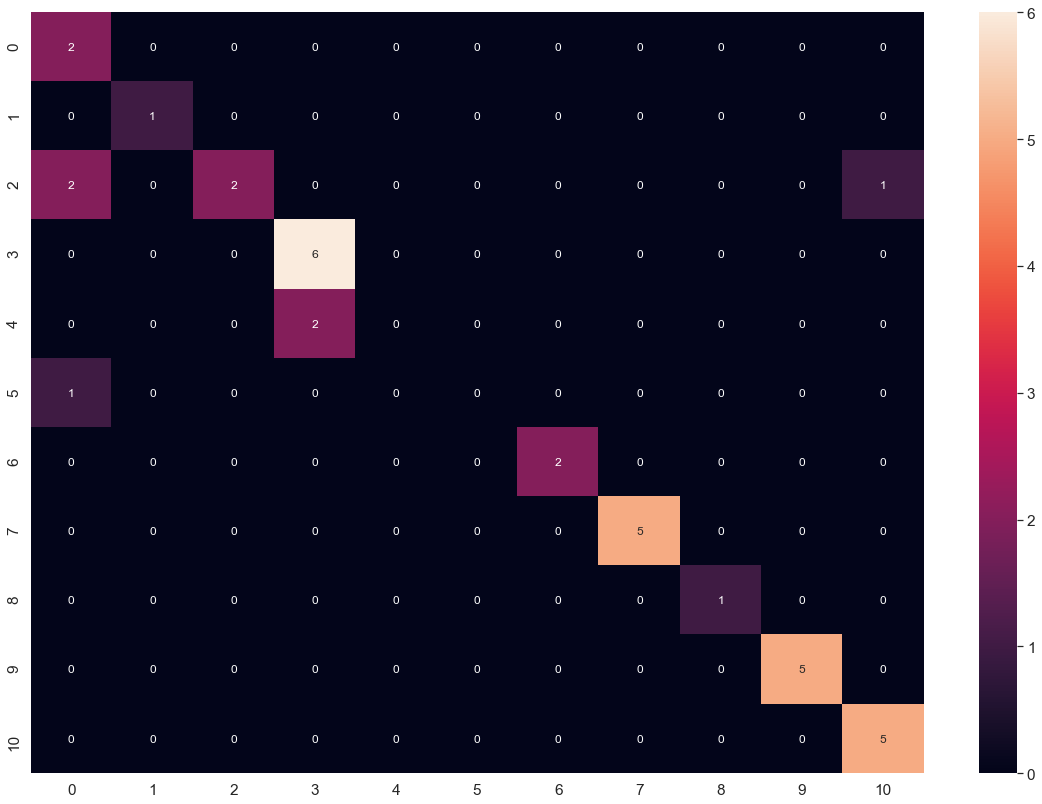

In [23]:
KNN = KNeighborsClassifier(n_neighbors=x[yValidation.index(max(yValidation))])
KNN.fit(X_trainPCA, Y_train)
predictions = KNN.predict(X_validationPCA)
metrics(Y_validation,predictions)

# 2. Linear models

# 2.1 SVC

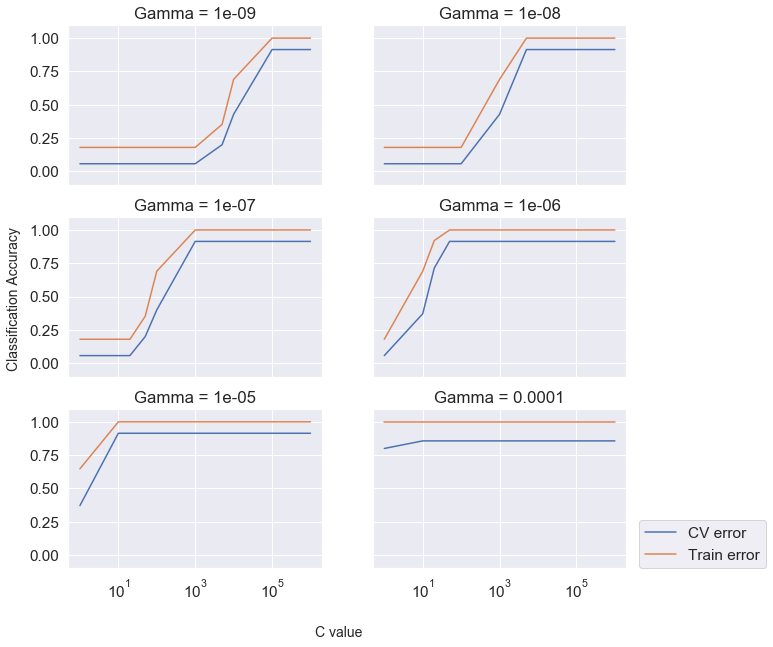

In [24]:
#model selection takes a few minutes, change this variable
#to true to run the parameter loop
def accuracy(conf):
    total_correct = 0.
    nb_classes = conf.shape[0]
    for i in np.arange(0,nb_classes):
        total_correct += conf[i][i]
    acc = total_correct/sum(sum(conf))
    return acc

do_model_selection = True

if do_model_selection:
    C_range = np.array([ 1, 10, 20, 50, 100, 1000, 5000, 10000,100000,1000000])
    gamma_range = np.array([0.000000001,0.00000001,0.0000001,0.000001,0.00001,0.0001])
    
    fig, axes = plt.subplots(3, 2,
                     sharex='col', sharey='row',figsize=(10,10))
    plot_number = 0
    for outer_ind, gamma_value in enumerate(gamma_range):
        row = int(plot_number / 2)
        column = int(plot_number % 2)
        cv_errors = np.zeros(C_range.shape)
        train_errors = np.zeros(C_range.shape)
        for index, c_value in enumerate(C_range):
                                                     
            clf = SVC(C=c_value, gamma=gamma_value)
            clf.fit(X_trainPCAScaler,Y_trainScaler)
                                                             
            train_conf = confusion_matrix(Y_trainScaler, clf.predict(X_trainPCAScaler))
            cv_conf = confusion_matrix(Y_validationScaler, clf.predict(X_validationPCAScaler))
                                                                     
            cv_errors[index] = accuracy(cv_conf)
            train_errors[index] = accuracy(train_conf)
                                                                             
        ax = axes[row, column]
        ax.set_title('Gamma = %g'%gamma_value)
        ax.semilogx(C_range, cv_errors, label='CV error')
        ax.semilogx(C_range, train_errors, label='Train error')
        plot_number += 1
        ax.set_ylim([-0.1,1.1])
                                                                                             
    ax.legend(bbox_to_anchor=(1.05, 0), loc='lower left', borderaxespad=0.)
    fig.text(0.5, 0.03, 'C value', ha='center',
             fontsize=14)
    
    fig.text(0.04, 0.5, 'Classification Accuracy', va='center',
             rotation='vertical', fontsize=14)

    plt.show()

In [25]:
#Testing different values of C
limit=100
step=10
x=[x for x in range(0,int(limit/step)-1)]
yValidation=[0 for x in range(0,int(limit/step)-1)]
ytrain=[0 for x in range(0,int(limit/step)-1)]
yValidationScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainScaler=[0 for x in range(0,int(limit/step)-1)]
yValidationPCA=[0 for x in range(0,int(limit/step)-1)]
ytrainPCA=[0 for x in range(0,int(limit/step)-1)]
yValidationPCAScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainPCAScaler=[0 for x in range(0,int(limit/step)-1)]

i=step
index=0
while i<limit:
    svc = SVC(C=i, gamma=1e-6)
    
    svc.fit(X_train, Y_train)
    trainScore=svc.score(X_train,Y_train)
    validationScore=svc.score(X_validation,Y_validation)
    
    svc.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=svc.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=svc.score(X_validationScaler,Y_validationScaler)
    
    svc.fit(X_trainPCA, Y_train)
    trainScorePCA=svc.score(X_trainPCA,Y_train)
    validationScorePCA=svc.score(X_validationPCA,Y_validation)
    
    svc.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=svc.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=svc.score(X_validationPCAScaler,Y_validationScaler)
    
    ytrain[index]=trainScore   
    yValidation[index]=validationScore
    
    ytrainScaler[index]=trainScoreScaler   
    yValidationScaler[index]=validationScoreScaler
    
    ytrainPCA[index]=trainScorePCA   
    yValidationPCA[index]=validationScorePCA
    
    ytrainPCAScaler[index]=trainScorePCAScaler   
    yValidationPCAScaler[index]=validationScorePCAScaler
    
    print('ite:',i)
    
    x[index]=i
    i+=step
    index+=1

ite: 10
ite: 20
ite: 30
ite: 40
ite: 50
ite: 60
ite: 70
ite: 80
ite: 90


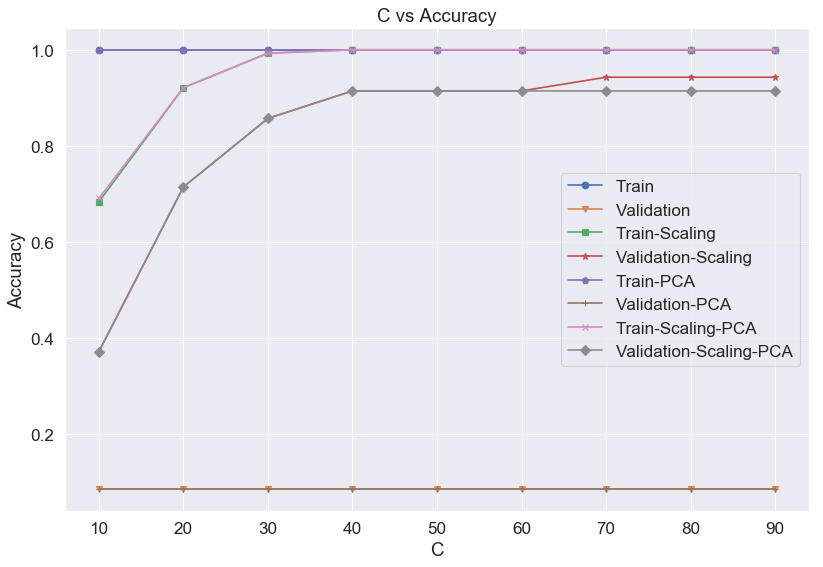

The best score with data validation:  0.08571428571428572 with C:  10
The best score with data validation with Scaling:  0.9428571428571428 with C:  70
The best score with data validation with PCA:  0.08571428571428572 with C:  10
The best score with data validation with Scaling and PCA:  0.9142857142857143 with C:  40


In [26]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,ytrain,'o-',label='Train')
plt.plot(x,yValidation,'v-',label='Validation')
plt.plot(x,ytrainScaler,'s-',label='Train-Scaling')
plt.plot(x,yValidationScaler,'*-',label='Validation-Scaling')
plt.plot(x,ytrainPCA,'p-',label='Train-PCA')
plt.plot(x,yValidationPCA,'+-',label='Validation-PCA')
plt.plot(x,ytrainPCAScaler,'x-',label='Train-Scaling-PCA')
plt.plot(x,yValidationPCAScaler,'D-',label='Validation-Scaling-PCA')



plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('C vs Accuracy')
plt.legend()
plt.savefig('SVC-Algorithm.png', dpi=100)
plt.show()  
print('The best score with data validation: ', max(yValidation),'with C: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with C: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with C: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with C: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])

# Show metrics

Accuracy: 0.9428571428571428
F1 score: 0.9333333333333335
Recall: 0.9428571428571428
Precision: 0.9285714285714286

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       0.50      1.00      0.67         1
           9       0.80      0.80      0.80         5
          10       1.00      1.00      1.00         5

    accuracy                           0.94        35
   macro avg       0.85      0.89      0.86        35
weighted avg       0.93      0.94      0.93        35


 confusion matrix:
 [[2 0 0 0 0 0 0 0 0 0 0]
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib

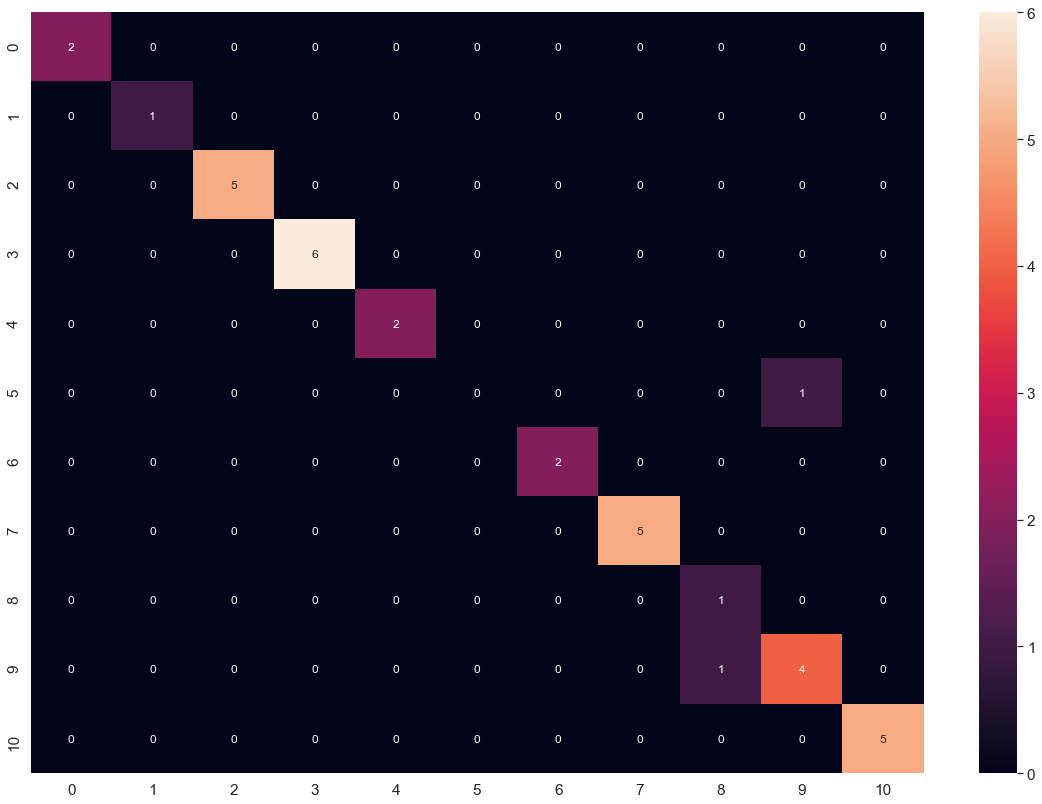

In [27]:
svc = SVC(C=x[yValidationScaler.index(max(yValidationScaler))],gamma=1e-6)
svc.fit(X_trainScaler, Y_trainScaler)
predictions = svc.predict(X_validationScaler)
metrics(Y_validationScaler,predictions)

# 2.2 LR algorithm

In [28]:
#Testing different values of C
limit=1
step=0.1
x=[0 for x in range(0,int(limit/step))]
yValidation=[0 for x in range(0,int(limit/step))]
ytrain=[0 for x in range(0,int(limit/step))]
yValidationScaler=[0 for x in range(0,int(limit/step))]
ytrainScaler=[0 for x in range(0,int(limit/step))]
yValidationPCA=[0 for x in range(0,int(limit/step))]
ytrainPCA=[0 for x in range(0,int(limit/step))]
yValidationPCAScaler=[0 for x in range(0,int(limit/step))]
ytrainPCAScaler=[0 for x in range(0,int(limit/step))]
i=step
index=0
while i<limit:
    lr = LogisticRegression(C=i)
    
    lr.fit(X_train, Y_train)
    trainScore=lr.score(X_train,Y_train)
    validationScore=lr.score(X_validation,Y_validation)
    
    lr.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=lr.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=lr.score(X_validationScaler,Y_validationScaler)
    
    lr.fit(X_trainPCA, Y_train)
    trainScorePCA=lr.score(X_trainPCA,Y_train)
    validationScorePCA=lr.score(X_validationPCA,Y_validation)
    
    lr.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=lr.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=lr.score(X_validationPCAScaler,Y_validationScaler)
    
    ytrain[index]=trainScore   
    yValidation[index]=validationScore
    
    ytrainScaler[index]=trainScoreScaler   
    yValidationScaler[index]=validationScoreScaler
    
    ytrainPCA[index]=trainScorePCA   
    yValidationPCA[index]=validationScorePCA
    
    ytrainPCAScaler[index]=trainScorePCAScaler   
    yValidationPCAScaler[index]=validationScorePCAScaler
    
    print('ite:',i)
    
    x[index]=i
    i+=step
    index+=1 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

ite: 0.1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

ite: 0.2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

ite: 0.30000000000000004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

ite: 0.4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

ite: 0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

ite: 0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

ite: 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

ite: 0.7999999999999999


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default mu

ite: 0.8999999999999999


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


ite: 0.9999999999999999


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


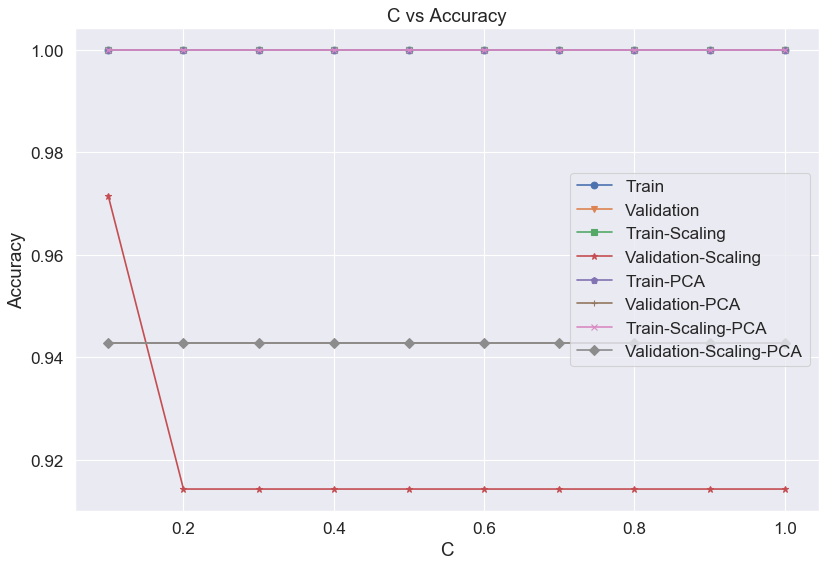

The best score with data validation:  1.0 with C:  0.1
The best score with data validation with Scaling:  0.9714285714285714 with C:  0.1
The best score with data validation with PCA:  0.9428571428571428 with C:  0.1
The best score with data validation with Scaling and PCA:  0.9428571428571428 with C:  0.1


In [29]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,ytrain,'o-',label='Train')
plt.plot(x,yValidation,'v-',label='Validation')
plt.plot(x,ytrainScaler,'s-',label='Train-Scaling')
plt.plot(x,yValidationScaler,'*-',label='Validation-Scaling')
plt.plot(x,ytrainPCA,'p-',label='Train-PCA')
plt.plot(x,yValidationPCA,'+-',label='Validation-PCA')
plt.plot(x,ytrainPCAScaler,'x-',label='Train-Scaling-PCA')
plt.plot(x,yValidationPCAScaler,'D-',label='Validation-Scaling-PCA')



plt.xlabel('C')
plt.ylabel('Accuracy')
plt.title('C vs Accuracy')
plt.legend()
plt.savefig('LR-Algorithm.png', dpi=100)
plt.show()  
print('The best score with data validation: ', max(yValidation),'with C: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with C: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with C: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with C: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])

# Show metrics

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


Accuracy: 1.0
F1 score: 1.0
Recall: 1.0
Precision: 1.0

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       1.00      1.00      1.00         5
          10       1.00      1.00      1.00         5

    accuracy                           1.00        35
   macro avg       1.00      1.00      1.00        35
weighted avg       1.00      1.00      1.00        35


 confusion matrix:
 [[2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [0 0 5 0 0 0 0 0 0 0 0]
 [0 0 0 6 0

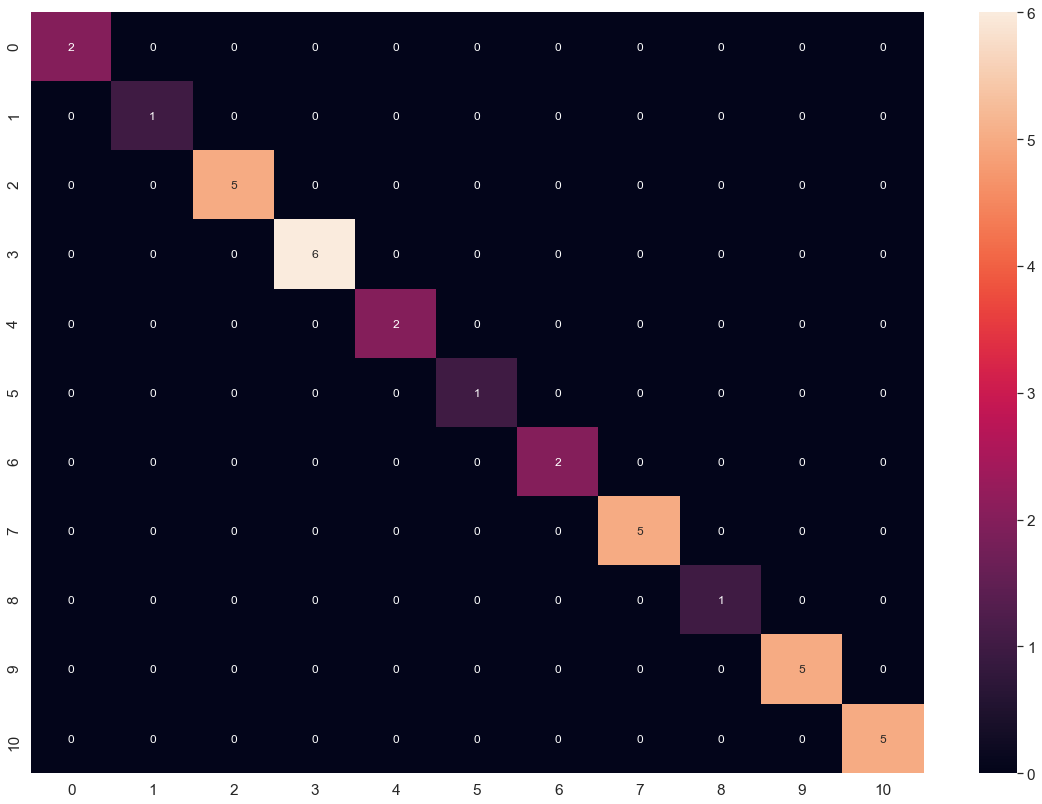

In [30]:
lr = LogisticRegression(C=x[yValidation.index(max(yValidation))])
lr.fit(X_train, Y_train)
predictions = lr.predict(X_validation)
metrics(Y_validation,predictions)

# 2.3 Ridge Regression

In [31]:
#Testing different values of alpha
limit=1
step=0.05
x=[x for x in range(0,int(limit/step)-1)]
yValidation=[0 for x in range(0,int(limit/step)-1)]
ytrain=[0 for x in range(0,int(limit/step)-1)]
yValidationScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainScaler=[0 for x in range(0,int(limit/step)-1)]
yValidationPCA=[0 for x in range(0,int(limit/step)-1)]
ytrainPCA=[0 for x in range(0,int(limit/step)-1)]
yValidationPCAScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainPCAScaler=[0 for x in range(0,int(limit/step)-1)]
i=step
index=0
while i<limit:
    ridge = Ridge(alpha=i)
    ridge.fit(X_train, Y_train)
    trainScore=ridge.score(X_train,Y_train)
    validationScore=ridge.score(X_validation,Y_validation)
    
    ridge.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=ridge.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=ridge.score(X_validationScaler,Y_validationScaler)
    
    ridge.fit(X_trainPCA, Y_train)
    trainScorePCA=ridge.score(X_trainPCA,Y_train)
    validationScorePCA=ridge.score(X_validationPCA,Y_validation)
    
    ridge.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=ridge.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=ridge.score(X_validationPCAScaler,Y_validationScaler)
    
    ytrain[index]=trainScore   
    yValidation[index]=validationScore
    
    ytrainScaler[index]=trainScoreScaler   
    yValidationScaler[index]=validationScoreScaler
    
    ytrainPCA[index]=trainScorePCA   
    yValidationPCA[index]=validationScorePCA
    
    ytrainPCAScaler[index]=trainScorePCAScaler   
    yValidationPCAScaler[index]=validationScorePCAScaler
    print('it:',i)
    x[index]=i
    i+=step
    index+=1

it: 0.05
it: 0.1
it: 0.15000000000000002
it: 0.2
it: 0.25
it: 0.3
it: 0.35
it: 0.39999999999999997
it: 0.44999999999999996
it: 0.49999999999999994
it: 0.5499999999999999
it: 0.6
it: 0.65
it: 0.7000000000000001
it: 0.7500000000000001
it: 0.8000000000000002
it: 0.8500000000000002
it: 0.9000000000000002
it: 0.9500000000000003


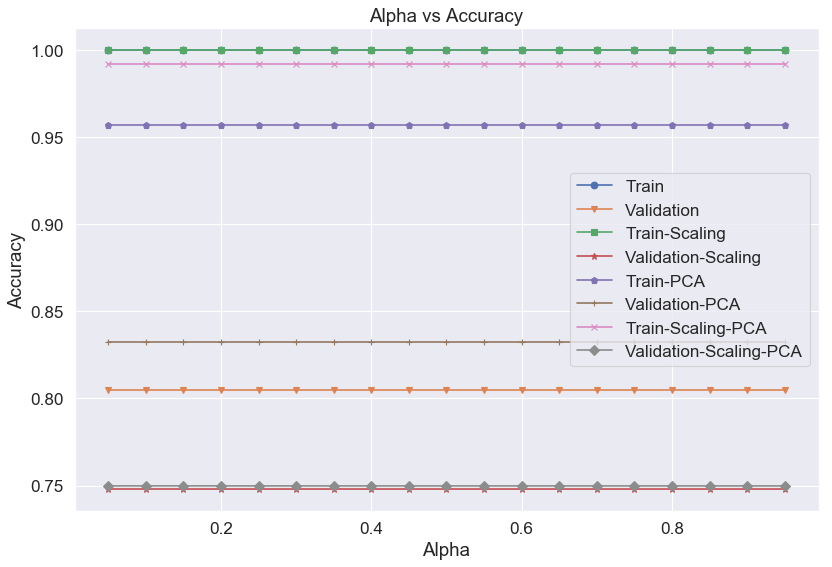

The best score with data validation:  0.8049711488934529 with C:  0.9500000000000003
The best score with data validation with Scaling:  0.7480146034699461 with C:  0.05
The best score with data validation with PCA:  0.8322431030884258 with C:  0.05
The best score with data validation with Scaling and PCA:  0.7498032213354716 with C:  0.05


In [32]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,ytrain,'o-',label='Train')
plt.plot(x,yValidation,'v-',label='Validation')
plt.plot(x,ytrainScaler,'s-',label='Train-Scaling')
plt.plot(x,yValidationScaler,'*-',label='Validation-Scaling')
plt.plot(x,ytrainPCA,'p-',label='Train-PCA')
plt.plot(x,yValidationPCA,'+-',label='Validation-PCA')
plt.plot(x,ytrainPCAScaler,'x-',label='Train-Scaling-PCA')
plt.plot(x,yValidationPCAScaler,'D-',label='Validation-Scaling-PCA')



plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Alpha vs Accuracy')
plt.legend()
plt.savefig('Ridge-Algorithm.png', dpi=100)
plt.show()  
print('The best score with data validation: ', max(yValidation),'with C: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with C: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with C: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with C: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])

# 2.4 Lasso Regression

In [33]:
#Testing different values of alpha
limit=4
step=0.1
x=[x for x in range(0,int(limit/step)-1)]
yValidation=[0 for x in range(0,int(limit/step)-1)]
ytrain=[0 for x in range(0,int(limit/step)-1)]
yValidationScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainScaler=[0 for x in range(0,int(limit/step)-1)]
yValidationPCA=[0 for x in range(0,int(limit/step)-1)]
ytrainPCA=[0 for x in range(0,int(limit/step)-1)]
yValidationPCAScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainPCAScaler=[0 for x in range(0,int(limit/step)-1)]
i=step
index=0
while i<limit:
    lasso = Lasso(alpha=i, max_iter=10000)
    lasso.fit(X_train, Y_train)
    trainScore=lasso.score(X_train,Y_train)
    validationScore=lasso.score(X_validation,Y_validation)
    
    lasso.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=lasso.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=lasso.score(X_validationScaler,Y_validationScaler)
    
    lasso.fit(X_trainPCA, Y_train)
    trainScorePCA=lasso.score(X_trainPCA,Y_train)
    validationScorePCA=lasso.score(X_validationPCA,Y_validation)
    
    lasso.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=lasso.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=lasso.score(X_validationPCAScaler,Y_validationScaler)
    
    ytrain[index]=trainScore   
    yValidation[index]=validationScore
    
    ytrainScaler[index]=trainScoreScaler   
    yValidationScaler[index]=validationScoreScaler
    
    ytrainPCA[index]=trainScorePCA   
    yValidationPCA[index]=validationScorePCA
    
    ytrainPCAScaler[index]=trainScorePCAScaler   
    yValidationPCAScaler[index]=validationScorePCAScaler
    print('it:',i)
    x[index]=i
    i+=step
    index+=1

it: 0.1


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.20955313939708664, tolerance: 0.14085179856115107
  positive)


it: 0.2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2782321295568374, tolerance: 0.14085179856115107
  positive)


it: 0.30000000000000004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.3875337224306501, tolerance: 0.14085179856115107
  positive)


it: 0.4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.44419620256236675, tolerance: 0.14085179856115107
  positive)


it: 0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.48459827482794704, tolerance: 0.14085179856115107
  positive)


it: 0.6


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.47908615581704617, tolerance: 0.14085179856115107
  positive)


it: 0.7


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.5446029991784767, tolerance: 0.14085179856115107
  positive)


it: 0.7999999999999999


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.6412788156230987, tolerance: 0.14085179856115107
  positive)


it: 0.8999999999999999


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.7458216602108679, tolerance: 0.14085179856115107
  positive)


it: 0.9999999999999999


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27839846114119066, tolerance: 0.14085179856115107
  positive)


it: 1.0999999999999999


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.29431585802332905, tolerance: 0.14085179856115107
  positive)


it: 1.2


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21660092291748673, tolerance: 0.14085179856115107
  positive)


it: 1.3


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25142419368678126, tolerance: 0.14085179856115107
  positive)


it: 1.4000000000000001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.25999837295933154, tolerance: 0.14085179856115107
  positive)


it: 1.5000000000000002


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2761699004535899, tolerance: 0.14085179856115107
  positive)


it: 1.6000000000000003


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.29545275654894193, tolerance: 0.14085179856115107
  positive)


it: 1.7000000000000004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.31376239763400554, tolerance: 0.14085179856115107
  positive)


it: 1.8000000000000005


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.30250661964512293, tolerance: 0.14085179856115107
  positive)


it: 1.9000000000000006


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.27349346935302427, tolerance: 0.14085179856115107
  positive)


it: 2.0000000000000004


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2571067488362944, tolerance: 0.14085179856115107
  positive)


it: 2.1000000000000005


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2586725115863691, tolerance: 0.14085179856115107
  positive)


it: 2.2000000000000006


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.2538593590554631, tolerance: 0.14085179856115107
  positive)


it: 2.3000000000000007


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.21551426160788076, tolerance: 0.14085179856115107
  positive)


it: 2.400000000000001


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.15077296923342381, tolerance: 0.14085179856115107
  positive)


it: 2.500000000000001
it: 2.600000000000001
it: 2.700000000000001
it: 2.800000000000001
it: 2.9000000000000012
it: 3.0000000000000013
it: 3.1000000000000014
it: 3.2000000000000015
it: 3.3000000000000016
it: 3.4000000000000017
it: 3.5000000000000018
it: 3.600000000000002
it: 3.700000000000002
it: 3.800000000000002
it: 3.900000000000002


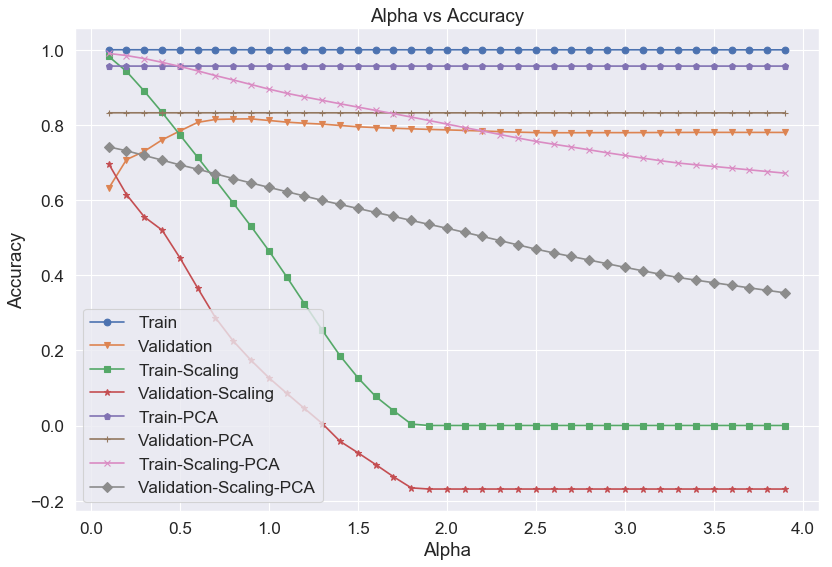

The best score with data validation:  0.816156813950886 with C:  0.8999999999999999
The best score with data validation with Scaling:  0.6965311008257113 with C:  0.1
The best score with data validation with PCA:  0.8322372144040181 with C:  0.1
The best score with data validation with Scaling and PCA:  0.7415619073435883 with C:  0.1


In [34]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,ytrain,'o-',label='Train')
plt.plot(x,yValidation,'v-',label='Validation')
plt.plot(x,ytrainScaler,'s-',label='Train-Scaling')
plt.plot(x,yValidationScaler,'*-',label='Validation-Scaling')
plt.plot(x,ytrainPCA,'p-',label='Train-PCA')
plt.plot(x,yValidationPCA,'+-',label='Validation-PCA')
plt.plot(x,ytrainPCAScaler,'x-',label='Train-Scaling-PCA')
plt.plot(x,yValidationPCAScaler,'D-',label='Validation-Scaling-PCA')



plt.xlabel('Alpha')
plt.ylabel('Accuracy')
plt.title('Alpha vs Accuracy')
plt.legend()
plt.savefig('Lasso-Algorithm.png', dpi=100)
plt.show()  
print('The best score with data validation: ', max(yValidation),'with C: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with C: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with C: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with C: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])

# 3. LDA Algorithm

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precisio

Accuracy: 0.9142857142857143
F1 score: 0.9047330447330446
Recall: 0.9142857142857143
Precision: 0.9115646258503401

 clasification report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       1.00      0.80      0.89         5
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       0.71      1.00      0.83         5
          10       1.00      1.00      1.00         5

    accuracy                           0.91        35
   macro avg       0.85      0.88      0.86        35
weighted avg       0.91      0.91      0.90        35


 confusion matrix:
 [[2 0 0 0 0 0 0 0 0 0 0]
 

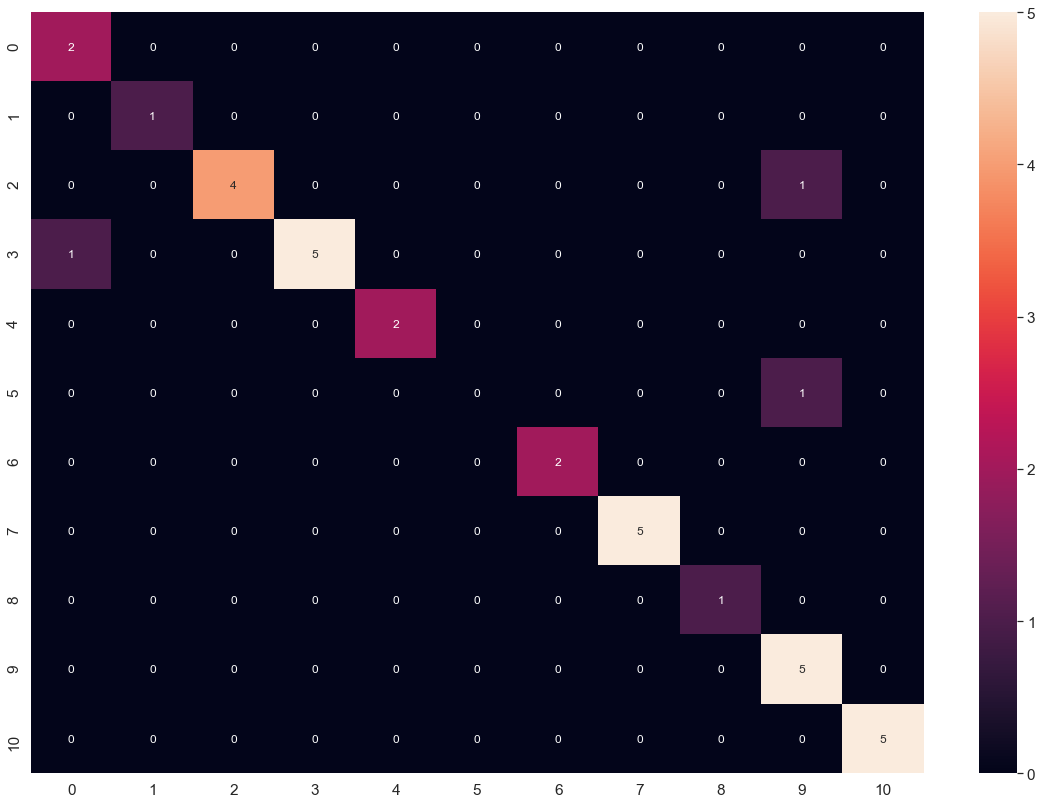

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precisio

Accuracy: 0.9142857142857143
F1 score: 0.9047330447330446
Recall: 0.9142857142857143
Precision: 0.9115646258503401

 clasification report:
               precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       1.00      0.80      0.89         5
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       0.71      1.00      0.83         5
          10       1.00      1.00      1.00         5

    accuracy                           0.91        35
   macro avg       0.85      0.88      0.86        35
weighted avg       0.91      0.91      0.90        35


 confusion matrix:
 [[2 0 0 0 0 0 0 0 0 0 0]
 

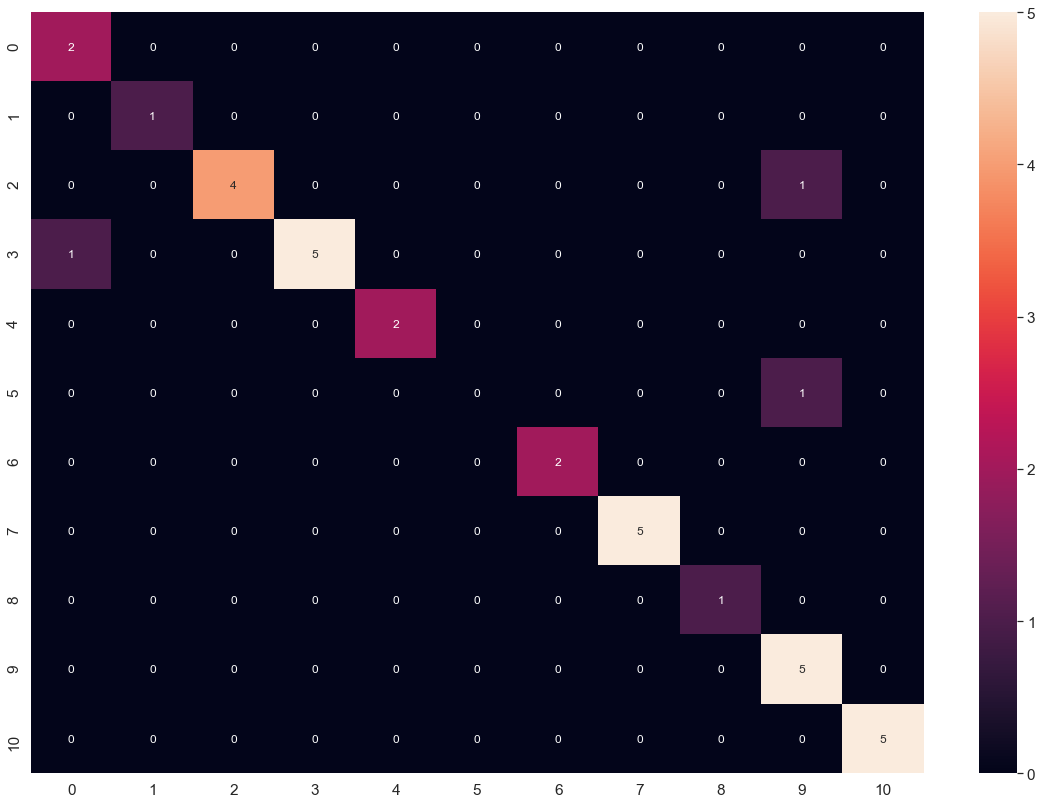

Accuracy: 0.9714285714285714
F1 score: 0.9584415584415584
Recall: 0.9714285714285714
Precision: 0.9476190476190478

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         5
           3       1.00      1.00      1.00         6
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5

    accuracy                           0.97        35
   macro avg       0.89      0.91      0.90        35
weighted avg       0.95      0.97      0.96        35


 confusion matrix:
 [[2 0 0 0 0 0 0 0 0 0 0]
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib

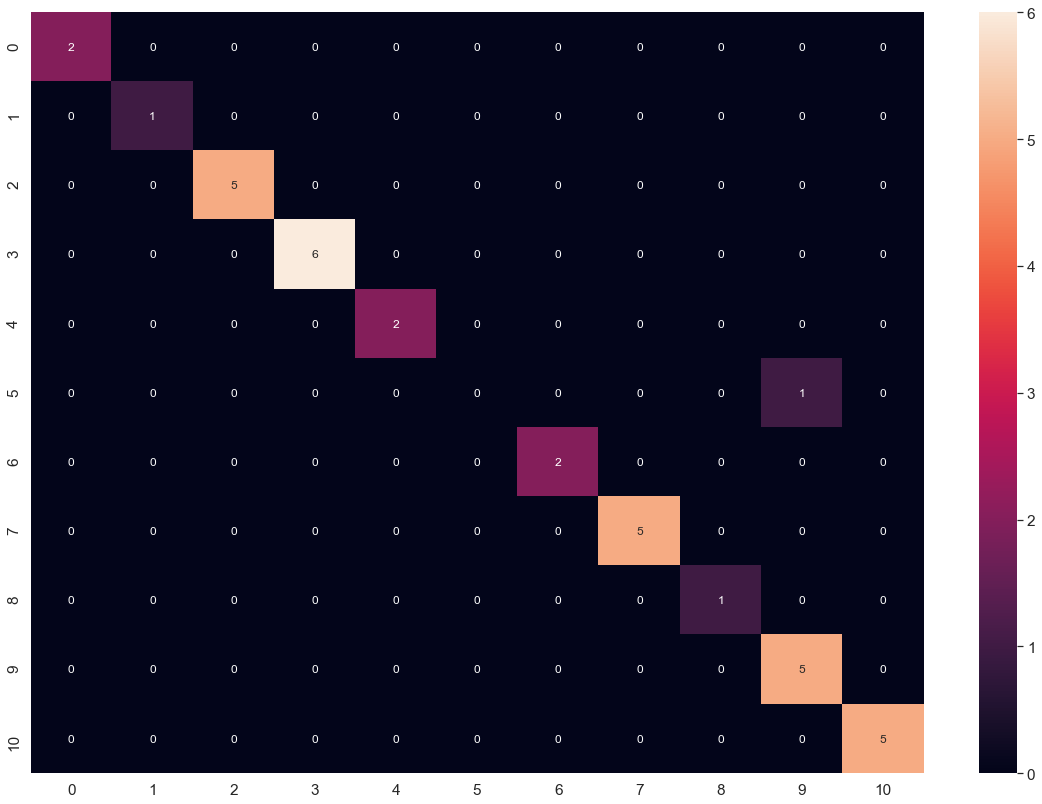

Accuracy: 0.8285714285714286
F1 score: 0.8352380952380951
Recall: 0.8285714285714286
Precision: 0.8976190476190476

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.25      1.00      0.40         1
           2       1.00      0.60      0.75         5
           3       1.00      0.83      0.91         6
           4       0.50      1.00      0.67         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       0.83      1.00      0.91         5
           8       1.00      1.00      1.00         1
           9       1.00      0.60      0.75         5
          10       1.00      1.00      1.00         5

    accuracy                           0.83        35
   macro avg       0.78      0.82      0.76        35
weighted avg       0.90      0.83      0.84        35


 confusion matrix:
 [[2 0 0 0 0 0 0 0 0 0 0]
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib

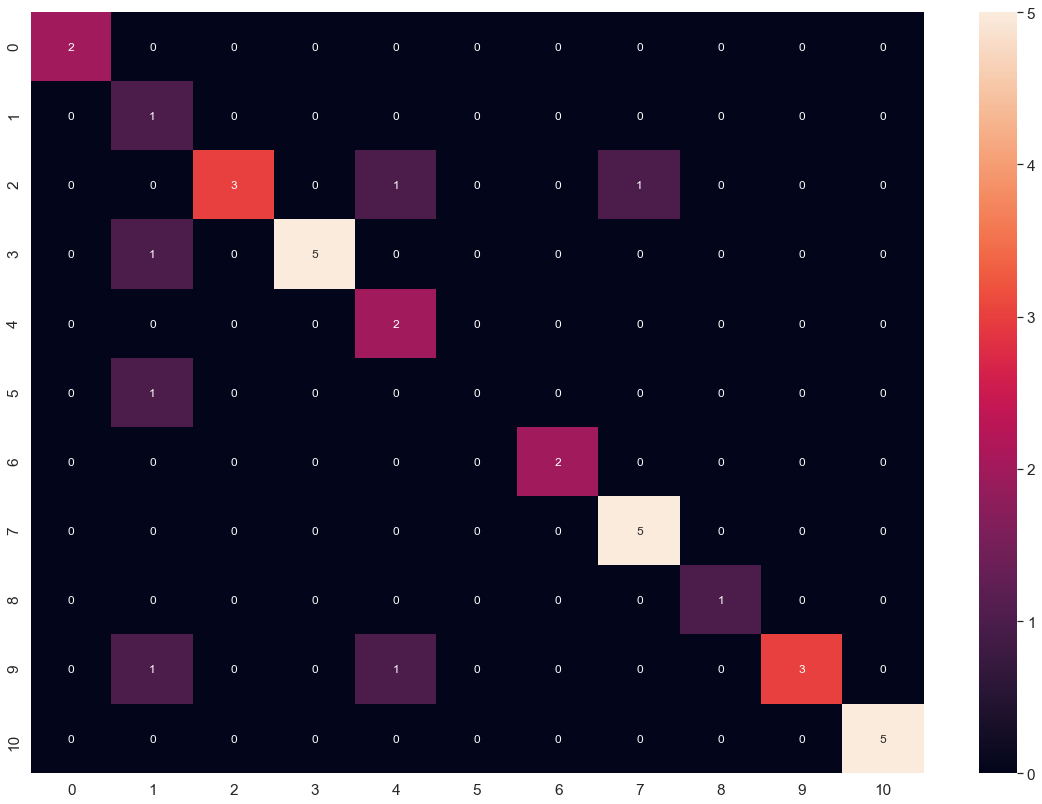

In [35]:
LDA = LinearDiscriminantAnalysis( solver = 'svd')

LDA.fit(X_train, Y_train)
predictions = LDA.predict(X_validation)
metrics(Y_validation,predictions)

LDA.fit(X_trainScaler, Y_trainScaler)
predictions = LDA.predict(X_validationScaler)
metrics(Y_validationScaler,predictions)

LDA.fit(X_trainPCA, Y_train)
predictions = LDA.predict(X_validationPCA)
metrics(Y_validation,predictions)

LDA.fit(X_trainPCAScaler, Y_trainScaler)
predictions = LDA.predict(X_validationPCAScaler)
metrics(Y_validationScaler,predictions)

# 4. NB Algorithm

Accuracy: 0.8571428571428571
F1 score: 0.8546031746031746
Recall: 0.8571428571428571
Precision: 0.861904761904762

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         5
           3       0.83      0.83      0.83         6
           4       0.33      0.50      0.40         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       0.50      1.00      0.67         1
           9       0.80      0.80      0.80         5
          10       1.00      0.80      0.89         5

    accuracy                           0.86        35
   macro avg       0.77      0.81      0.78        35
weighted avg       0.86      0.86      0.85        35


 confusion matrix:
 [[2 0 0 0 0 0 0 0 0 0 0]
 [

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib

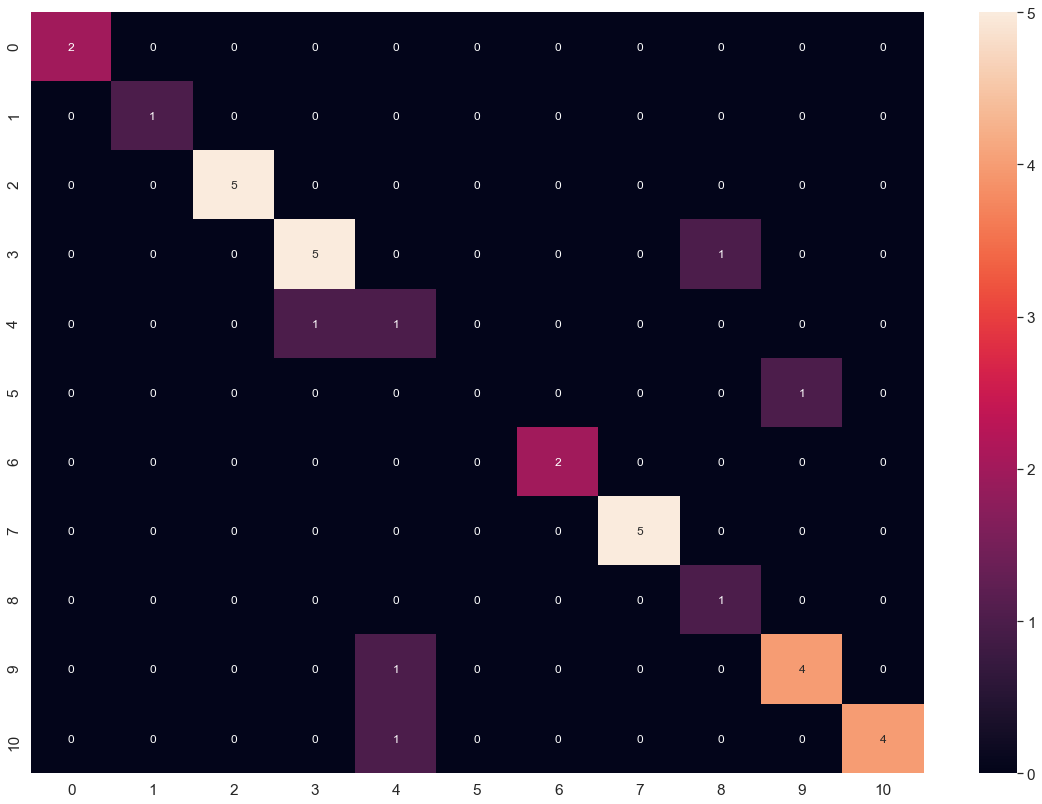

Accuracy: 0.8571428571428571
F1 score: 0.8546031746031746
Recall: 0.8571428571428571
Precision: 0.861904761904762

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         5
           3       0.83      0.83      0.83         6
           4       0.33      0.50      0.40         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       0.50      1.00      0.67         1
           9       0.80      0.80      0.80         5
          10       1.00      0.80      0.89         5

    accuracy                           0.86        35
   macro avg       0.77      0.81      0.78        35
weighted avg       0.86      0.86      0.85        35


 confusion matrix:
 [[2 0 0 0 0 0 0 0 0 0 0]
 [

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib

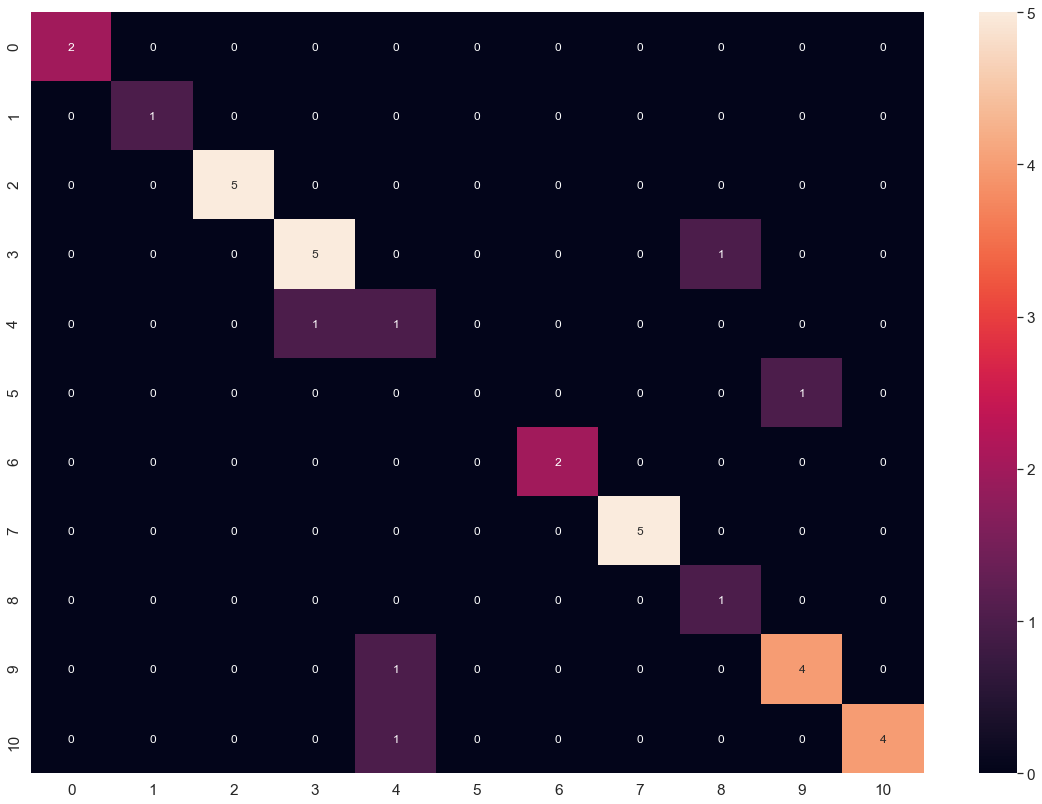

Accuracy: 0.8
F1 score: 0.7725108225108226
Recall: 0.8
Precision: 0.7877551020408163

 clasification report:
               precision    recall  f1-score   support

           0       0.50      1.00      0.67         2
           1       1.00      1.00      1.00         1
           2       0.80      0.80      0.80         5
           3       1.00      0.83      0.91         6
           4       0.50      1.00      0.67         2
           5       0.00      0.00      0.00         1
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       1.00      0.60      0.75         5
          10       0.71      1.00      0.83         5

    accuracy                           0.80        35
   macro avg       0.68      0.75      0.69        35
weighted avg       0.79      0.80      0.77        35


 confusion matrix:
 [[2 0 0 0 0 0 0 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0 0]
 [1 0 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib

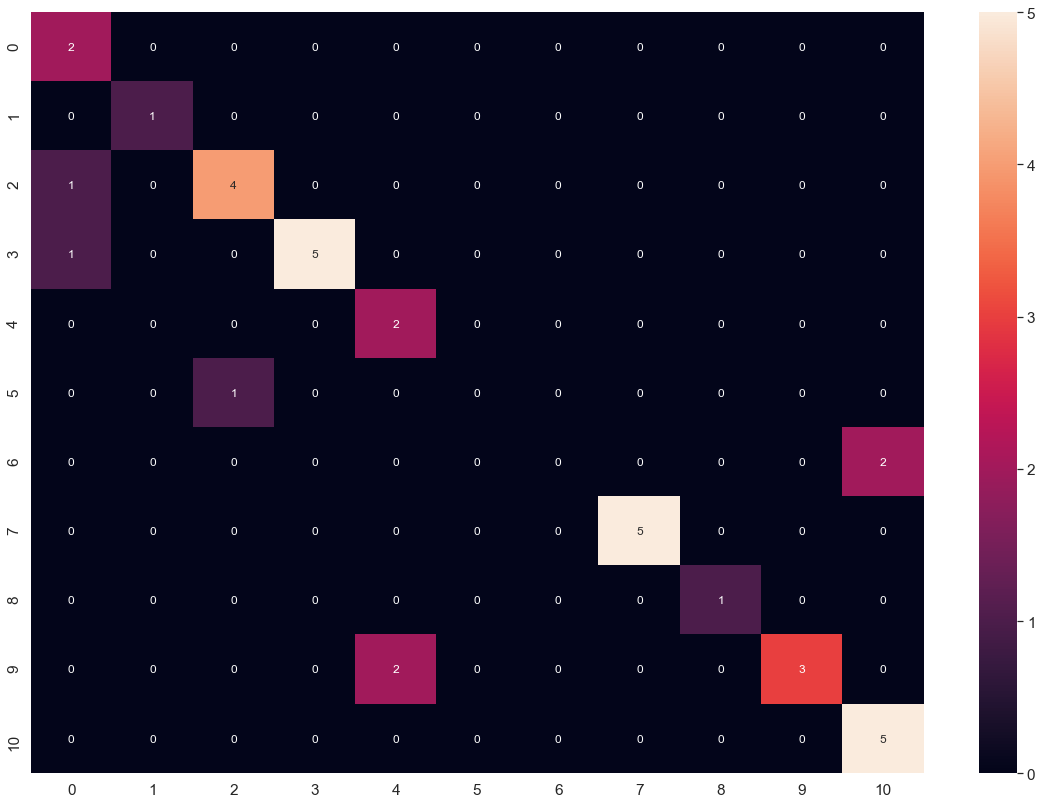

Accuracy: 0.7142857142857143
F1 score: 0.7307936507936509
Recall: 0.7142857142857143
Precision: 0.7948979591836735

 clasification report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         2
           1       1.00      1.00      1.00         1
           2       0.75      0.60      0.67         5
           3       1.00      0.67      0.80         6
           4       0.29      1.00      0.44         2
           5       0.00      0.00      0.00         1
           6       0.50      0.50      0.50         2
           7       1.00      0.80      0.89         5
           8       0.50      1.00      0.67         1
           9       0.80      0.80      0.80         5
          10       1.00      0.80      0.89         5

    accuracy                           0.71        35
   macro avg       0.67      0.70      0.65        35
weighted avg       0.79      0.71      0.73        35


 confusion matrix:
 [[1 0 0 0 0 0 1 0 0 0 0]
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib

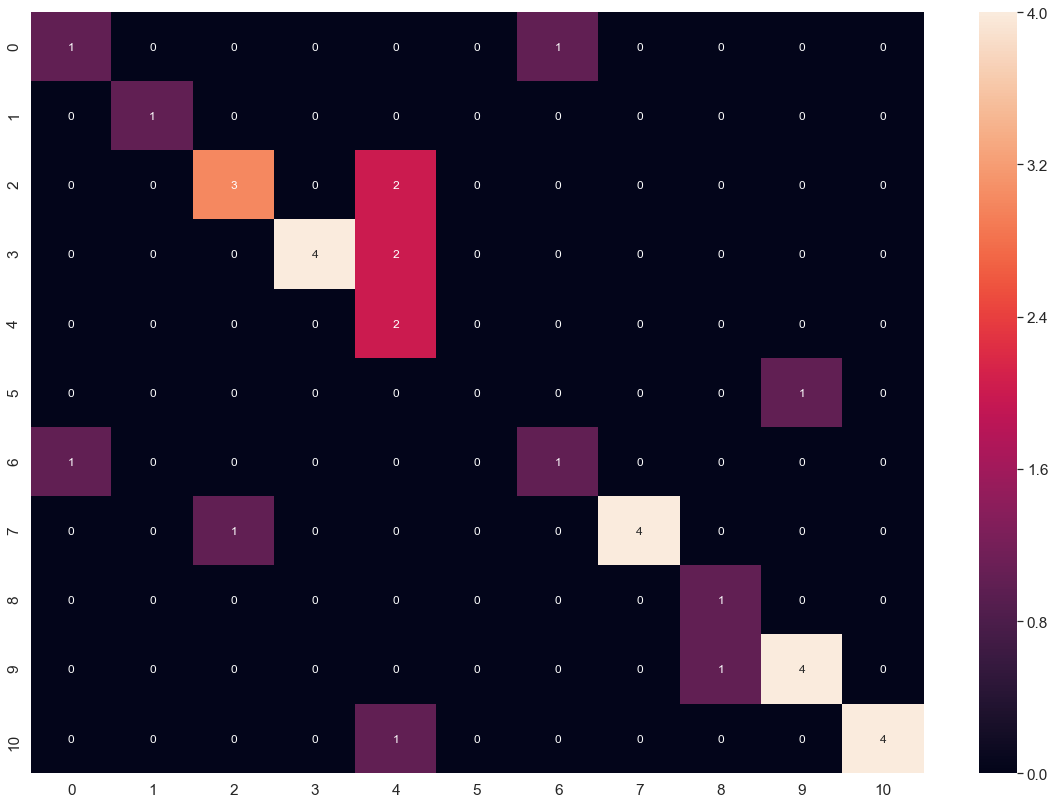

In [36]:
NB = GaussianNB()

NB.fit(X_train, Y_train)
predictions = NB.predict(X_validation)
metrics(Y_validation,predictions)

NB.fit(X_trainScaler, Y_trainScaler)
predictions = NB.predict(X_validationScaler)
metrics(Y_validationScaler,predictions)

NB.fit(X_trainPCA, Y_train)
predictions = NB.predict(X_validationPCA)
metrics(Y_validation,predictions)

NB.fit(X_trainPCAScaler, Y_trainScaler)
predictions =NB.predict(X_validationPCAScaler)
metrics(Y_validationScaler,predictions)

# 5 Perceptron Algorithm

# MLP

In [37]:
limit=1050
step=50
x=[x for x in range(0,int(limit/step)-1)]
yValidation=[0 for x in range(0,int(limit/step)-1)]
ytrain=[0 for x in range(0,int(limit/step)-1)]
yValidationScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainScaler=[0 for x in range(0,int(limit/step)-1)]
yValidationPCA=[0 for x in range(0,int(limit/step)-1)]
ytrainPCA=[0 for x in range(0,int(limit/step)-1)]
yValidationPCAScaler=[0 for x in range(0,int(limit/step)-1)]
ytrainPCAScaler=[0 for x in range(0,int(limit/step)-1)]
i=step
index=0
while i<limit:
    MLP = MLPClassifier(solver='lbfgs', alpha=.5, hidden_layer_sizes=(i))
    MLP.fit(X_train, Y_train)
    trainScore=MLP.score(X_train,Y_train)
    validationScore=MLP.score(X_validation,Y_validation)
    
    MLP.fit(X_trainScaler, Y_trainScaler)
    trainScoreScaler=MLP.score(X_trainScaler,Y_trainScaler)
    validationScoreScaler=MLP.score(X_validationScaler,Y_validationScaler)
    
    MLP.fit(X_trainPCA, Y_train)
    trainScorePCA=MLP.score(X_trainPCA,Y_train)
    validationScorePCA=MLP.score(X_validationPCA,Y_validation)
    
    MLP.fit(X_trainPCAScaler, Y_trainScaler)
    trainScorePCAScaler=MLP.score(X_trainPCAScaler,Y_trainScaler)
    validationScorePCAScaler=MLP.score(X_validationPCAScaler,Y_validationScaler)
    
    ytrain[index]=trainScore   
    yValidation[index]=validationScore
    
    ytrainScaler[index]=trainScoreScaler   
    yValidationScaler[index]=validationScoreScaler
    
    ytrainPCA[index]=trainScorePCA   
    yValidationPCA[index]=validationScorePCA
    
    ytrainPCAScaler[index]=trainScorePCAScaler   
    yValidationPCAScaler[index]=validationScorePCAScaler
    print('it:',i)
    x[index]=i
    i+=step
    index+=1

it: 50
it: 100
it: 150
it: 200
it: 250
it: 300
it: 350
it: 400
it: 450
it: 500
it: 550
it: 600
it: 650
it: 700
it: 750
it: 800
it: 850
it: 900
it: 950
it: 1000


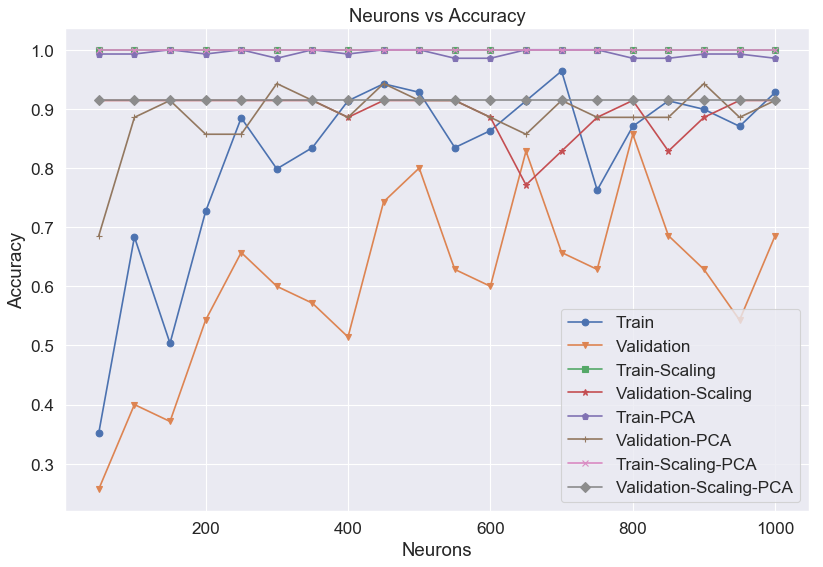

The best score with data validation:  0.8571428571428571 with Neurons:  800
The best score with data validation with Scaling:  0.9142857142857143 with Neurons:  50
The best score with data validation with PCA:  0.9428571428571428 with Neurons:  300
The best score with data validation with Scaling and PCA:  0.9142857142857143 with Neurons:  50


In [38]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,ytrain,'o-',label='Train')
plt.plot(x,yValidation,'v-',label='Validation')
plt.plot(x,ytrainScaler,'s-',label='Train-Scaling')
plt.plot(x,yValidationScaler,'*-',label='Validation-Scaling')
plt.plot(x,ytrainPCA,'p-',label='Train-PCA')
plt.plot(x,yValidationPCA,'+-',label='Validation-PCA')
plt.plot(x,ytrainPCAScaler,'x-',label='Train-Scaling-PCA')
plt.plot(x,yValidationPCAScaler,'D-',label='Validation-Scaling-PCA')



plt.xlabel('Neurons')
plt.ylabel('Accuracy')
plt.title('Neurons vs Accuracy')
plt.legend()
plt.savefig('MLP-Algorithm.png', dpi=100)
plt.show()  
print('The best score with data validation: ', max(yValidation),'with Neurons: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with Neurons: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with Neurons: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with Neurons: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])

Accuracy: 0.8285714285714286
F1 score: 0.8194516594516594
Recall: 0.8285714285714286
Precision: 0.8261904761904761

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       0.00      0.00      0.00         1
           2       0.67      0.80      0.73         5
           3       1.00      1.00      1.00         6
           4       0.67      1.00      0.80         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       0.50      1.00      0.67         1
           9       1.00      0.80      0.89         5
          10       0.75      0.60      0.67         5

    accuracy                           0.83        35
   macro avg       0.69      0.75      0.70        35
weighted avg       0.83      0.83      0.82        35


 confusion matrix:
 [[2 0 0 0 0 0 0 0 0 0 0]
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib

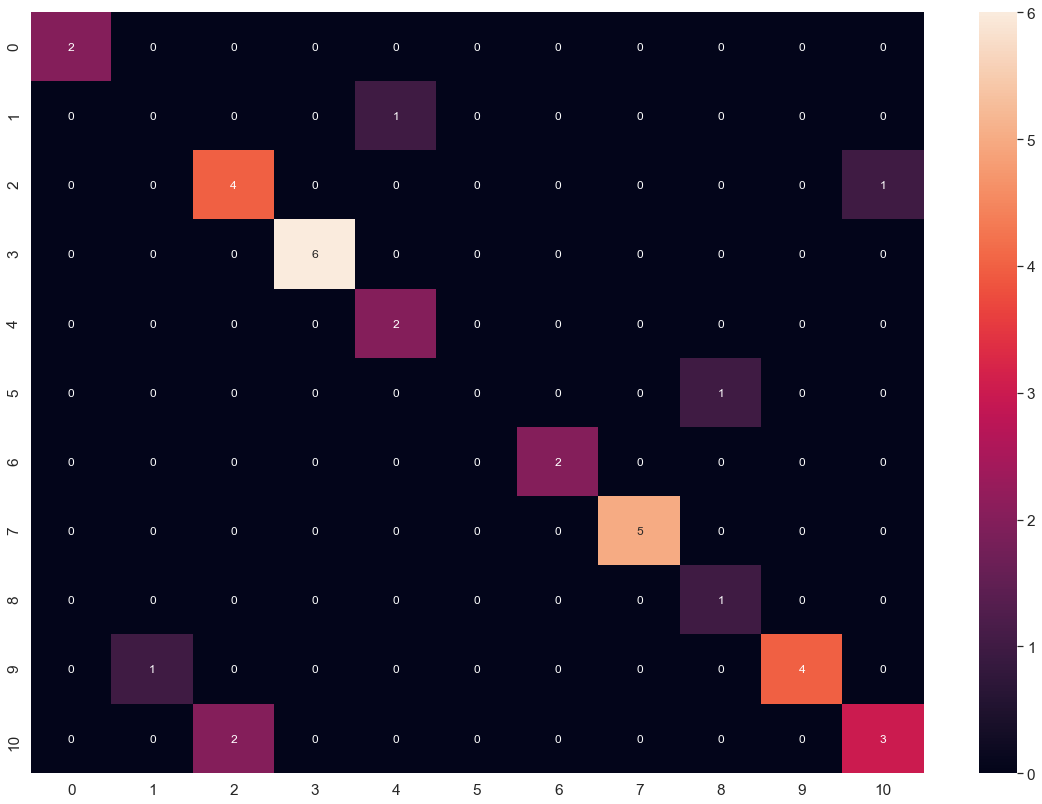

In [39]:
MLP = MLPClassifier(solver='lbfgs', alpha=.5, hidden_layer_sizes=x[yValidationPCA.index(max(yValidationPCA))])
MLP.fit(X_trainPCA, Y_train)
predictions = MLP.predict(X_validationPCA)
metrics(Y_validation,predictions)

# 6. RandomForest Algorithm

In [40]:
limit=100
n_features=80
step=10
x=[[[[w for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidation=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrain=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidationScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrainScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidationPCA=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrainPCA=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
yValidationPCAScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
ytrainPCAScaler=[[[[0 for w in range(0,n_features,step)] for z in range(0,limit,step)] for y in range(0,limit,step)] for x in range(0,limit,step)]
indexi = 0
indexj = 0
indexk = 0
indexl = 0
for i in range(1,limit,step):
    indexj = 0
    for j in range(1,limit,step):
        indexk = 0
        for k in range(10,limit+10,step):
            indexl = 0
            for l in range(10,n_features,step):
                # 
                RF = RandomForestClassifier(n_estimators=i, max_depth=j, min_samples_split=k, max_features=l, n_jobs=4)

                RF.fit(X_train, Y_train)
                trainScore = RF.score(X_train, Y_train)
                validationScore = RF.score(X_validation,Y_validation)

                RF.fit(X_trainScaler, Y_trainScaler)
                trainScoreScaler=RF.score(X_trainScaler,Y_trainScaler)
                validationScoreScaler=RF.score(X_validationScaler,Y_validationScaler)

                RF.fit(X_trainPCA, Y_train)
                trainScorePCA=RF.score(X_trainPCA,Y_train)
                validationScorePCA=RF.score(X_validationPCA,Y_validation)

                RF.fit(X_trainPCAScaler, Y_trainScaler)
                trainScorePCAScaler=RF.score(X_trainPCAScaler,Y_trainScaler)
                validationScorePCAScaler=RF.score(X_validationPCAScaler,Y_validationScaler)
                
                # print("%d,%d,%d,%d"%(indexi,indexj,indexk,indexl))
                ytrain[indexi][indexj][indexk][indexl]=trainScore   
                yValidation[indexi][indexj][indexk][indexl]=validationScore

                ytrainScaler[indexi][indexj][indexk][indexl]=trainScoreScaler   
                yValidationScaler[indexi][indexj][indexk][indexl]=validationScoreScaler

                ytrainPCA[indexi][indexj][indexk][indexl]=trainScorePCA   
                yValidationPCA[indexi][indexj][indexk][indexl]=validationScorePCA

                ytrainPCAScaler[indexi][indexj][indexk][indexl]=trainScorePCAScaler   
                yValidationPCAScaler[indexi][indexj][indexk][indexl]=validationScorePCAScaler
                indexl += 1
            indexk += 1
        indexj += 1
    indexi += 1
    print('n_estimators:',i)

n_estimators: 1
n_estimators: 11
n_estimators: 21
n_estimators: 31
n_estimators: 41
n_estimators: 51
n_estimators: 61
n_estimators: 71
n_estimators: 81
n_estimators: 91


In [41]:
indexes = [0 for x in range(16)]
bestdata = 0.0
bestscaling = 0.0
bestpca = 0.0
bestpcascaling = 0.0
for i in range(len(yValidation)):
    for j in range(len(yValidation[i])):
        for k in range(len(yValidation[i][j])):
            for l in range(len(yValidation[i][j][k])):
                if yValidation[i][j][k][l] >= bestdata:
                    bestdata = yValidation[i][j][k][l]
                    indexes[0] = i
                    indexes[1] = j
                    indexes[2] = k
                    indexes[3] = l
                if yValidationScaler[i][j][k][l] >= bestscaling:
                    bestscaling = yValidationScaler[i][j][k][l]
                    indexes[4] = i
                    indexes[5] = j
                    indexes[6] = k
                    indexes[7] = l
                if yValidationPCA[i][j][k][l] >= bestpca:
                    bestpca = yValidationPCA[i][j][k][l]
                    indexes[8] = i
                    indexes[9] = j
                    indexes[10] = k
                    indexes[11] = l
                if yValidationPCAScaler[i][j][k][l] >= bestpcascaling:
                    bestpcascaling = yValidationPCAScaler[i][j][k][l]
                    indexes[12] = i
                    indexes[13] = j
                    indexes[14] = k
                    indexes[15] = l

print('The best score with data validation: ', bestdata,'with parameters: ',indexes[0], ', ', indexes[1], ', ', indexes[2], ', ', indexes[3])
print('The best score with data validation with Scaling: ', bestscaling,'with parameters: ',indexes[4], ', ', indexes[5], ', ', indexes[6], ', ', indexes[7])
print('The best score with data validation with PCA: ', bestpca,'with parameters: ',indexes[8], ', ', indexes[9], ', ', indexes[10], ', ', indexes[11])
print('The best score with data validation with Scaling and PCA: ', bestpcascaling,'with parameters: ',indexes[12], ', ', indexes[13], ', ', indexes[14], ', ', indexes[15])

The best score with data validation:  0.9714285714285714 with parameters:  9 ,  5 ,  0 ,  6
The best score with data validation with Scaling:  0.9714285714285714 with parameters:  6 ,  9 ,  0 ,  5
The best score with data validation with PCA:  0.9428571428571428 with parameters:  9 ,  4 ,  0 ,  6
The best score with data validation with Scaling and PCA:  0.8571428571428571 with parameters:  9 ,  3 ,  0 ,  2


Accuracy: 0.8571428571428571
F1 score: 0.8233211233211232
Recall: 0.8571428571428571
Precision: 0.8061224489795918

 clasification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         2
           1       1.00      1.00      1.00         1
           2       0.71      1.00      0.83         5
           3       0.86      1.00      0.92         6
           4       0.50      0.50      0.50         2
           5       0.50      1.00      0.67         1
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         5
           8       0.00      0.00      0.00         1
           9       1.00      0.80      0.89         5
          10       1.00      1.00      1.00         5

    accuracy                           0.86        35
   macro avg       0.69      0.75      0.71        35
weighted avg       0.81      0.86      0.82        35


 confusion matrix:
 [[2 0 0 0 0 0 0 0 0 0 0]
 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib

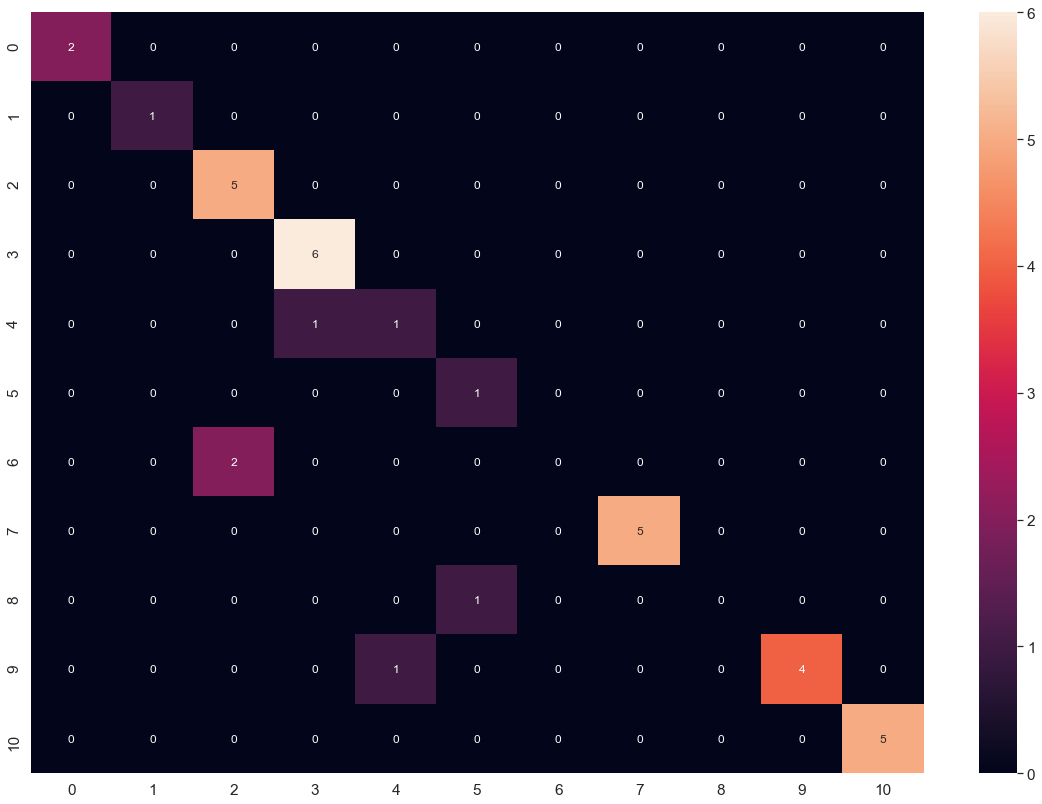

In [42]:
RF = RandomForestClassifier(n_estimators=81,  max_depth=91, min_samples_split=10, max_features=50
, n_jobs=4)
RF.fit(X_train, Y_train)
predictions = RF.predict(X_validation)
metrics(Y_validation,predictions)

# 7. Desicion Tree Algorithm

In [43]:
limit=100
n_features=80
step=10
x=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidation=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrain=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidationScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrainScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidationPCA=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrainPCA=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
yValidationPCAScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
ytrainPCAScaler=[[[0 for z in range(1,n_features,step)] for y in range(1,limit,step)] for x in range(1,limit,step)]
indexi = 0
indexj = 0
indexk = 0
for i in range(1,limit,step):
    indexj = 0
    for j in range(10, limit+10,step):
        indexk = 0
        for k in range(10, n_features,step):
            DT = DecisionTreeClassifier(max_depth=i, min_samples_split=j, max_features=k)

            DT.fit(X_train, Y_train)
            trainScore = DT.score(X_train, Y_train)
            validationScore = DT.score(X_validation,Y_validation)

            DT.fit(X_trainScaler, Y_trainScaler)
            trainScoreScaler=DT.score(X_trainScaler,Y_trainScaler)
            validationScoreScaler=DT.score(X_validationScaler,Y_validationScaler)

            DT.fit(X_trainPCA, Y_train)
            trainScorePCA=DT.score(X_trainPCA,Y_train)
            validationScorePCA=DT.score(X_validationPCA,Y_validation)

            DT.fit(X_trainPCAScaler, Y_trainScaler)
            trainScorePCAScaler=DT.score(X_trainPCAScaler,Y_trainScaler)
            validationScorePCAScaler=DT.score(X_validationPCAScaler,Y_validationScaler)

            ytrain[indexi][indexj][indexk]=trainScore   
            yValidation[indexi][indexj][indexk]=validationScore

            ytrainScaler[indexi][indexj][indexk]=trainScoreScaler   
            yValidationScaler[indexi][indexj][indexk]=validationScoreScaler

            ytrainPCA[indexi][indexj][indexk]=trainScorePCA   
            yValidationPCA[indexi][indexj][indexk]=validationScorePCA

            ytrainPCAScaler[indexi][indexj][indexk]=trainScorePCAScaler   
            yValidationPCAScaler[indexi][indexj][indexk]=validationScorePCAScaler
            indexk += 1
        indexj += 1
    indexi += 1
    print('Depth: ',i)

Depth:  1
Depth:  11
Depth:  21
Depth:  31
Depth:  41
Depth:  51
Depth:  61
Depth:  71
Depth:  81
Depth:  91


In [44]:
indexes = [0 for x in range(12)]
bestdata = 0.0
bestscaling = 0.0
bestpca = 0.0
bestpcascaling = 0.0
for i in range(len(yValidation)):
    for j in range(len(yValidation[i])):
        for k in range(len(yValidation[i][j])):
            if yValidation[i][j][k] >= bestdata:
                bestdata = yValidation[i][j][k]
                indexes[0] = i
                indexes[1] = j
                indexes[2] = k
            if yValidationScaler[i][j][k] >= bestscaling:
                bestscaling = yValidationScaler[i][j][k]
                indexes[3] = i
                indexes[4] = j
                indexes[5] = k
            if yValidationPCA[i][j][k] >= bestpca:
                bestpca = yValidationPCA[i][j][k]
                indexes[6] = i
                indexes[7] = j
                indexes[8] = k
            if yValidationPCAScaler[i][j][k] >= bestpcascaling:
                bestpcascaling = yValidationPCAScaler[i][j][k]
                indexes[9] = i
                indexes[10] = j
                indexes[11] = k
                    
print('The best score with data validation: ', bestdata,'with parameters: ',indexes[0], ', ', indexes[1], ', ', indexes[2])
print('The best score with data validation with Scaling: ', bestscaling,'with parameters: ',indexes[3], ', ', indexes[4], ', ', indexes[5])
print('The best score with data validation with PCA: ', bestpca,'with parameters: ',indexes[6], ', ', indexes[7], ', ', indexes[8])
print('The best score with data validation with Scaling and PCA: ', bestpcascaling,'with parameters: ',indexes[9], ', ', indexes[10], ', ', indexes[11])

The best score with data validation:  0.6857142857142857 with parameters:  1 ,  1 ,  4
The best score with data validation with Scaling:  0.6285714285714286 with parameters:  3 ,  2 ,  4
The best score with data validation with PCA:  0.7714285714285715 with parameters:  9 ,  1 ,  6
The best score with data validation with Scaling and PCA:  0.7142857142857143 with parameters:  6 ,  2 ,  3


Accuracy: 0.5142857142857142
F1 score: 0.5013151927437641
Recall: 0.5142857142857142
Precision: 0.627891156462585

 clasification report:
               precision    recall  f1-score   support

           0       0.25      1.00      0.40         2
           1       0.00      0.00      0.00         1
           2       0.43      0.60      0.50         5
           3       1.00      0.33      0.50         6
           4       0.25      0.50      0.33         2
           5       0.33      1.00      0.50         1
           6       0.00      0.00      0.00         2
           7       1.00      1.00      1.00         5
           8       0.00      0.00      0.00         1
           9       1.00      0.40      0.57         5
          10       0.50      0.40      0.44         5

    accuracy                           0.51        35
   macro avg       0.43      0.48      0.39        35
weighted avg       0.63      0.51      0.50        35


 confusion matrix:
 [[2 0 0 0 0 0 0 0 0 0 0]
 [

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib

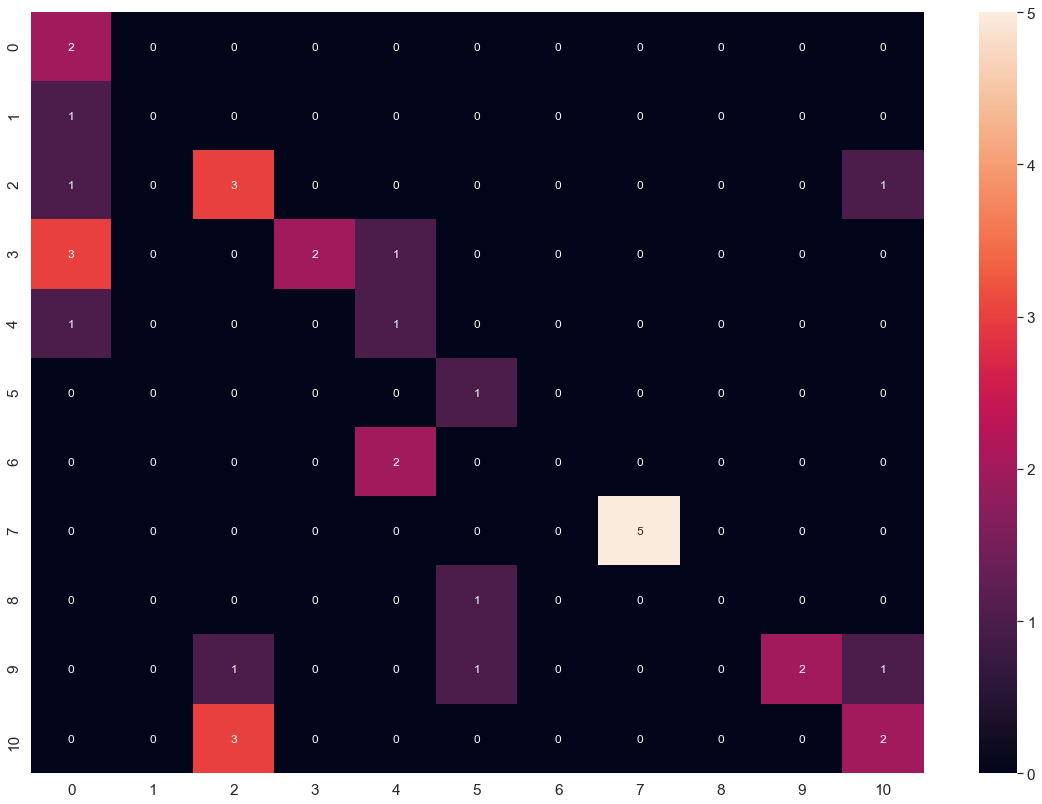

In [45]:
DT = DecisionTreeClassifier(max_depth=81, min_samples_split=10, max_features=30)
DT.fit(X_trainPCA, Y_train)
predictions = DT.predict(X_validationPCA)
metrics(Y_validation,predictions)

# 8. KMeans Algorithm

# KMeans

In [82]:
limit=17
step=1
x=[x for x in range(0,int(limit/step)-1)]
yValidation=[0 for x in range(0,int(limit/step)-1)]
yValidationScaler=[0 for x in range(0,int(limit/step)-1)]
yValidationPCA=[0 for x in range(0,int(limit/step)-1)]
yValidationPCAScaler=[0 for x in range(0,int(limit/step)-1)]
i=step
index=0
while i<limit:
    KM = KMeans(n_clusters=i, random_state=0)
    clusters =KM.fit_predict(X_train)
    labels = np.zeros_like(clusters)
    for j in range(i):
        mask = (clusters == j)
        labels[mask] = mode(Y_train[mask])[0]
    validationScore=accuracy_score(Y_train, labels)

    KM = KMeans(n_clusters=i, random_state=0)
    clusters =KM.fit_predict(X_trainScaler)
    labels = np.zeros_like(clusters)
    for j in range(i):
        mask = (clusters == j)
        labels[mask] = mode(Y_trainScaler[mask])[0]
    validationScoreScaler=accuracy_score(Y_trainScaler, labels)
    
    KM = KMeans(n_clusters=i, random_state=0)
    clusters =KM.fit_predict(X_trainPCA)
    labels = np.zeros_like(clusters)
    for j in range(i):
        mask = (clusters == j)
        labels[mask] = mode(Y_train[mask])[0]
    validationScorePCA=accuracy_score(Y_train, labels)
    
    KM = KMeans(n_clusters=i, random_state=0)
    clusters =KM.fit_predict(X_trainPCAScaler)
    labels = np.zeros_like(clusters)
    for j in range(i):
        mask = (clusters == j)
        labels[mask] = mode(Y_trainScaler[mask])[0]
    validationScorePCAScaler=accuracy_score(Y_trainScaler, labels)
     
    yValidation[index]=validationScore
    
    yValidationScaler[index]=validationScoreScaler
    
    yValidationPCA[index]=validationScorePCA
    
    yValidationPCAScaler[index]=validationScorePCAScaler
    print('it:',i)
    x[index]=i
    i+=step
    index+=1    


it: 1
it: 2
it: 3
it: 4
it: 5
it: 6
it: 7
it: 8
it: 9
it: 10
it: 11
it: 12
it: 13
it: 14
it: 15
it: 16


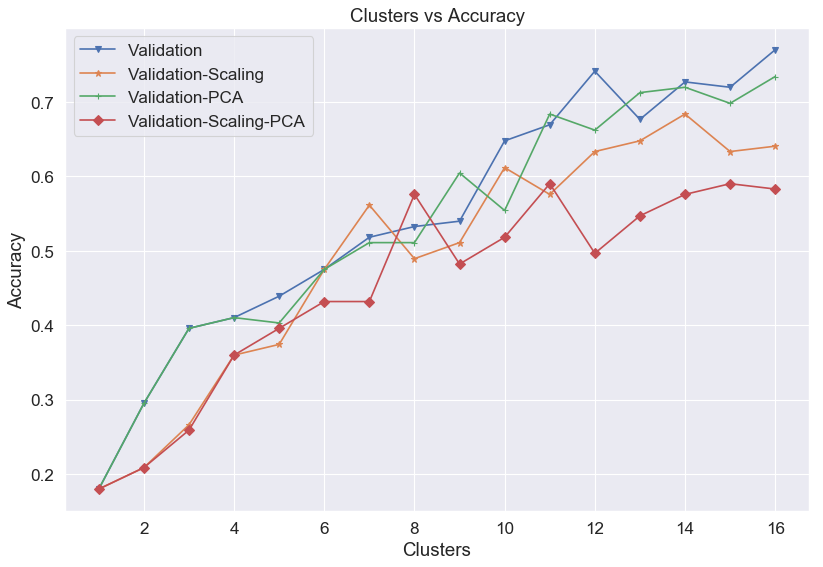

The best score with data validation:  0.7697841726618705 with Clusters:  16
The best score with data validation with Scaling:  0.6834532374100719 with Clusters:  14
The best score with data validation with PCA:  0.7338129496402878 with Clusters:  16
The best score with data validation with Scaling and PCA:  0.5899280575539568 with Clusters:  11


In [83]:
plt.figure(figsize=(12, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x,yValidation,'v-',label='Validation')
plt.plot(x,yValidationScaler,'*-',label='Validation-Scaling')
plt.plot(x,yValidationPCA,'+-',label='Validation-PCA')
plt.plot(x,yValidationPCAScaler,'D-',label='Validation-Scaling-PCA')



plt.xlabel('Clusters')
plt.ylabel('Accuracy')
plt.title('Clusters vs Accuracy')
plt.legend()
plt.savefig('Clusters-Algorithm.png', dpi=100)
plt.show()  
print('The best score with data validation: ', max(yValidation),'with Clusters: ',x[yValidation.index(max(yValidation))])
print('The best score with data validation with Scaling: ', max(yValidationScaler),'with Clusters: ',x[yValidationScaler.index(max(yValidationScaler))])
print('The best score with data validation with PCA: ', max(yValidationPCA),'with Clusters: ',x[yValidationPCA.index(max(yValidationPCA))])
print('The best score with data validation with Scaling and PCA: ', max(yValidationPCAScaler),'with Clusters: ',x[yValidationPCAScaler.index(max(yValidationPCAScaler))])

# Show metrics

Accuracy: 0.6762589928057554
F1 score: 0.6101126764093951
Recall: 0.6762589928057554
Precision: 0.6361810788523332

 clasification report:
               precision    recall  f1-score   support

           0       0.74      0.68      0.71        25
           1       0.00      0.00      0.00         7
           2       0.45      0.90      0.60        21
           3       0.68      1.00      0.81        17
           4       0.00      0.00      0.00        10
           5       0.91      1.00      0.95        10
           6       1.00      0.40      0.57         5
           7       1.00      0.95      0.98        21
           8       0.00      0.00      0.00         5
           9       1.00      0.11      0.20         9
          10       0.53      0.89      0.67         9

    accuracy                           0.68       139
   macro avg       0.57      0.54      0.50       139
weighted avg       0.64      0.68      0.61       139


 confusion matrix:
 [[17  0  8  0  0  0  0  0 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib

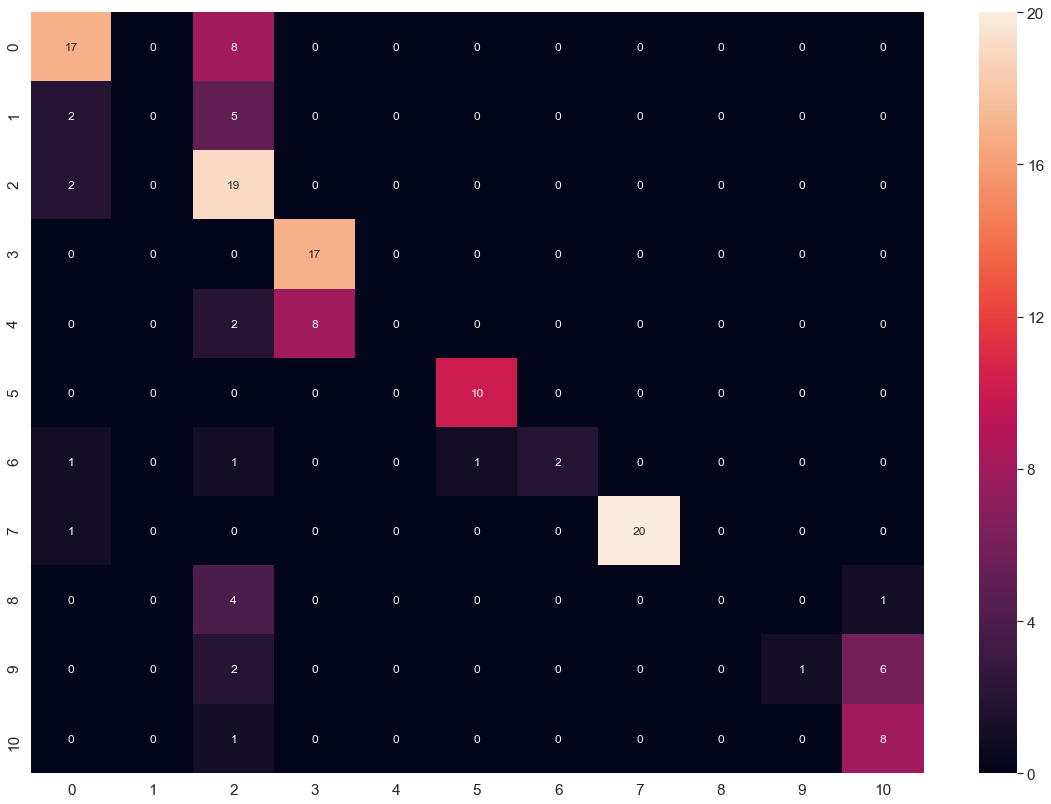

In [48]:
KM = KMeans(n_clusters=11, random_state=0)
clusters =KM.fit_predict(X_trainPCA)
labels = np.zeros_like(clusters)
for j in range(10):
    mask = (clusters == j)
    labels[mask] = mode(Y_train[mask])[0]
metrics(Y_train, labels)

In [49]:
Y_train

array([ 5,  1,  0,  0,  0,  9,  0,  0,  3,  2, 10,  0, 10, 10,  7,  1,  3,
        2,  3,  4,  0,  4,  0,  6,  3,  7,  2,  7,  2,  6,  6,  2,  8,  4,
        5,  7,  7,  7, 10,  0,  7,  0,  7,  8,  8,  4,  6,  2,  7,  3,  7,
        8,  2,  9,  5,  9,  2,  4,  3,  4, 10,  5,  1,  5,  2,  1,  0,  0,
        7,  2,  1,  1,  4,  5,  7,  9,  2,  2,  4,  0,  7,  3,  8,  2,  0,
       10,  5,  3,  3,  3,  3,  7,  2,  7,  3,  0,  2,  2,  5,  3,  1,  0,
        0,  0, 10,  0,  7,  9,  0,  9,  2,  7,  3,  0,  3,  7,  5,  0,  4,
        2,  7,  5,  0,  7,  9,  3,  0, 10,  4,  9,  9,  0,  2,  2, 10,  3,
        7,  6,  2], dtype=int64)

In [50]:
clusters

array([ 8,  4,  0,  0,  0,  9,  0,  4,  5,  4,  1,  0,  9,  9,  3,  4,  5,
       10,  5,  5,  6,  5,  0,  1,  5,  3,  4,  3,  4,  8,  2,  4,  4,  5,
        8,  3,  3,  3,  9,  6,  3,  0,  3,  9,  4,  1, 10,  4,  3,  5,  6,
        4,  1,  9,  8,  4,  4,  5,  5,  5,  9,  8,  4,  8,  1,  6,  4,  4,
        3,  4,  4,  1,  5,  8,  3,  9,  4,  1,  1,  4,  3,  5,  4,  4,  4,
        9,  8,  5,  5,  5,  5,  3,  4,  3,  5,  6,  4,  1,  8,  5,  0,  0,
        0,  4,  9,  4,  3,  9,  0,  9,  4,  3,  5,  0,  5,  3,  8,  0,  5,
        6,  3,  8,  4,  3,  9,  5,  6,  9,  5,  4,  7,  6,  4,  4,  9,  5,
        3,  2,  4])

# Cross validation

In [51]:
seed = 42
scoring = 'accuracy'

models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC()))
models.append(('MLP', MLPClassifier()))
models.append(('KM', KMeans()))
models.append(('RF', RandomForestClassifier()))
models.append(('DT', DecisionTreeClassifier()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    #segmentar la base de datos de entrenamiento en 10 partes
    kfold = model_selection.KFold(n_splits=10, random_state=seed)
    #probar los grupos en cada modelp
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    #almacena resultados
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# We can also create a plot of the model evaluation results and compare the spread and the mean accuracy of each model. There is a population of accuracy measures for each algorithm because each algorithm was evaluated 10 times (10 fold cross validation).


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

LR: 0.906044 (0.079336)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
C:\ProgramData\Anacond

LDA: 0.834066 (0.116214)
KNN: 0.782967 (0.127118)
NB: 0.841209 (0.127810)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarni

SVM: 0.108242 (0.066529)
MLP: 0.777473 (0.224271)
KM: 0.129670 (0.100211)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

RF: 0.718132 (0.164488)
DT: 0.675824 (0.184913)


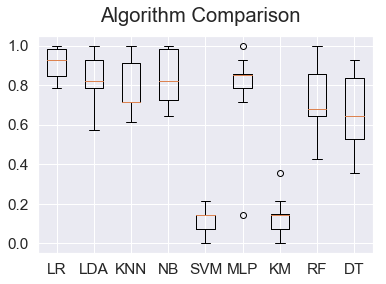

In [52]:
# Compare Algorithms Accuracy
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

# Cross Validation

In [53]:
seed=7
results = []
names = []
scoring = 'accuracy'

KNN = KNeighborsClassifier(n_neighbors=1)
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(KNN, X_train,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('KNN')
msg = "%s: %f (%f)" % ('KNN', cv_results.mean(), cv_results.std())
print(msg)

KNN: 0.820330 (0.101939)


In [54]:
seed=7
results = []
names = []
scoring = 'accuracy'

svc = SVC(C=70, gamma=1e-6)
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(svc, X_trainScaler,Y_trainScaler, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('svc')
msg = "%s: %f (%f)" % ('svc', cv_results.mean(), cv_results.std())
print(msg)

svc: 0.819780 (0.136984)


In [55]:
seed=7
results = []
names = []
scoring = 'accuracy'

lr = LogisticRegression(C=0.1)
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(lr, X_train,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('lr')
msg = "%s: %f (%f)" % ('lr', cv_results.mean(), cv_results.std())
print(msg)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default so

lr: 0.906044 (0.079336)


In [56]:
seed=7
results = []
names = []
scoring = 'accuracy'

lda = LinearDiscriminantAnalysis()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(lda, X_trainPCA,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('lda')
msg = "%s: %f (%f)" % ('lda', cv_results.mean(), cv_results.std())
print(msg)

lda: 0.797253 (0.104553)


In [57]:
seed=7
results = []
names = []
scoring = 'accuracy'

nb = GaussianNB()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(nb, X_train,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('nb')
msg = "%s: %f (%f)" % ('nb', cv_results.mean(), cv_results.std())
print(msg)

nb: 0.841209 (0.127810)


In [58]:
seed=7
results = []
names = []
scoring = 'accuracy'

rf = RandomForestClassifier()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(rf, X_trainPCA,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('rf')
msg = "%s: %f (%f)" % ('rf', cv_results.mean(), cv_results.std())
print(msg)

rf: 0.631868 (0.141434)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: F

In [59]:
seed=7
results = []
names = []
scoring = 'accuracy'

dt = DecisionTreeClassifier()
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(dt, X_trainPCA,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('dt')
msg = "%s: %f (%f)" % ('dt', cv_results.mean(), cv_results.std())
print(msg)

dt: 0.575275 (0.126136)


In [60]:
seed=7
results = []
names = []
scoring = 'accuracy'

mlp = MLPClassifier(solver='lbfgs', alpha=.5, hidden_layer_sizes=(950))
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(mlp, X_trainPCA,Y_train, cv=kfold, scoring=scoring, verbose=1)
results.append(cv_results)
names.append('mlp')
msg = "%s: %f (%f)" % ('mlp', cv_results.mean(), cv_results.std())
print(msg)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


mlp: 0.834066 (0.136410)


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    1.0s finished


In [61]:
seed=7
results = []
names = []
scoring = 'accuracy'

KM = KMeans(n_clusters=11, random_state=0)
kfold = model_selection.KFold(n_splits=10, random_state=seed)
cv_results = model_selection.cross_val_score(KM, X_trainPCA,Y_train, cv=kfold, scoring=scoring)
results.append(cv_results)
names.append('KM')
msg = "%s: %f (%f)" % ('KM', cv_results.mean(), cv_results.std())
print(msg)

KM: 0.050000 (0.055787)


# Deep Leaning using KERAS

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12533)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                626700    
_________________________________________________________________
dense_2 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_3 (Dense)              (None, 50)                2550      
_________________________________________________________________
dense_4 (Dense)              (None, 11)                561       
Total params: 632,361
Trainable params: 632,361
Non-trainable params: 0
_________________________________________________________________
None
Instructions for updating:
Use tf.cast instead.
Epoch 1/50


Epoch 33/50
139/139 [==============================] - 0s 100us/step - loss: 4.9602e-07 - acc: 1.0000 - mean_squared_error: 4.9602e-07 - mean_absolute_error: 9.3288e-05 - mean_absolute_percentage_error: 46644.8867
Epoch 34/50
139/139 [==============================] - 0s 93us/step - loss: 4.0627e-07 - acc: 1.0000 - mean_squared_error: 4.0627e-07 - mean_absolute_error: 8.6535e-05 - mean_absolute_percentage_error: 43267.5586
Epoch 35/50
139/139 [==============================] - 0s 100us/step - loss: 3.3587e-07 - acc: 1.0000 - mean_squared_error: 3.3587e-07 - mean_absolute_error: 8.0690e-05 - mean_absolute_percentage_error: 40345.5781
Epoch 36/50
139/139 [==============================] - 0s 100us/step - loss: 2.8074e-07 - acc: 1.0000 - mean_squared_error: 2.8074e-07 - mean_absolute_error: 7.5641e-05 - mean_absolute_percentage_error: 37820.5898
Epoch 37/50
139/139 [==============================] - 0s 100us/step - loss: 2.3764e-07 - acc: 1.0000 - mean_squared_error: 2.3764e-07 - mean_abs

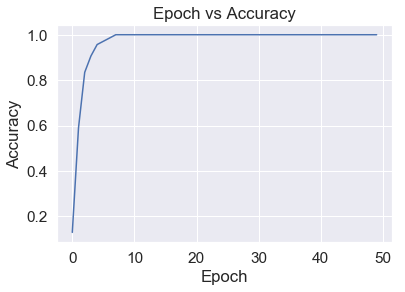

Baseline Error: 14.29%


In [62]:
encoded_YTrain = Y_trainScaler
encoded_YValidation = Y_validationScaler
encode_XTrain=X_trainScaler
encode_Xvalidation=X_validationScaler

# Multilayer Perceptron
one_hot_labels_train = keras.utils.to_categorical(encoded_YTrain, num_classes=11)
one_hot_labels_validation = keras.utils.to_categorical(encoded_YValidation, num_classes=11)
visible = Input(shape=(encode_XTrain.shape[1],))
hidden1 = Dense(50, activation='relu')(visible)
#Dropout(0.1)
hidden2 = Dense(50, activation='relu')(hidden1)
#Dropout(0.1)
hidden3 = Dense(50, activation='relu')(hidden2)
#Dropout(0.1)
output = Dense(11, activation='softmax')(hidden3)
model = Model(inputs=visible, outputs=output)
# Compile model
model.compile(loss='mse', optimizer='adam', metrics=['acc', 'mse','mae','mape'])
# summarize layers
print(model.summary())
# Fit the model
history=model.fit(encode_XTrain, one_hot_labels_train, epochs=50, batch_size=139)

# plot metrics
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.show()
scores = model.evaluate(encode_Xvalidation, one_hot_labels_validation, verbose=0)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

In [63]:
snn_pred = model.predict(encode_Xvalidation, batch_size=139, verbose=1)  
snn_predicted = np.argmax(snn_pred, axis=1)
snn_pred_lab = np.argmax(snn_pred, axis=1)
snn_real_lab = np.argmax(one_hot_labels_validation, axis=1)
print(snn_pred_lab.shape)
print(snn_real_lab.shape)
acc = np.sum(snn_pred_lab==snn_real_lab)/snn_real_lab.shape[0]
print(acc)

35/35 [==============================] - 0s 1ms/step
(35,)
(35,)
0.8571428571428571


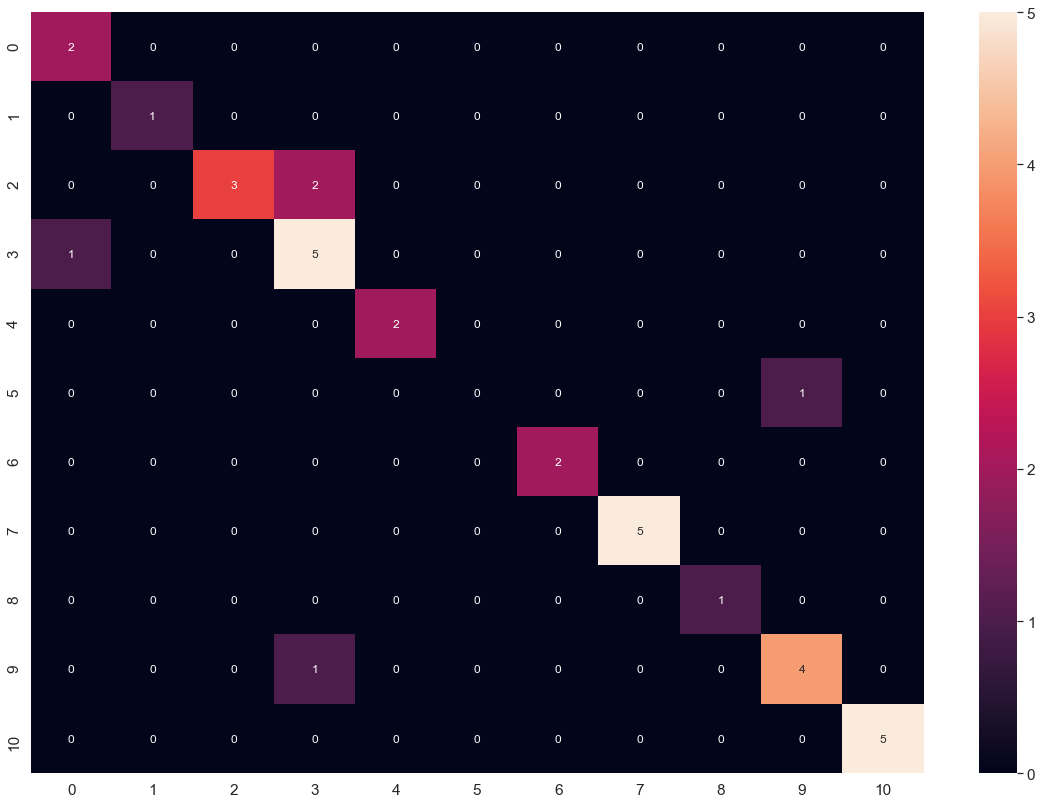

In [64]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(one_hot_labels_validation, axis=1), snn_predicted)

# Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(11), range(11))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show()  

In [65]:
snn_report = classification_report(np.argmax(one_hot_labels_validation, axis=1), snn_predicted)  
print(snn_report)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       1.00      0.60      0.75         5
           3       0.62      0.83      0.71         6
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       0.80      0.80      0.80         5
          10       1.00      1.00      1.00         5

    accuracy                           0.86        35
   macro avg       0.83      0.84      0.82        35
weighted avg       0.86      0.86      0.85        35



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Using Keras CNN

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 111, 32)           128       
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 109, 32)           3104      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 109, 32)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 107, 32)           3104      
_________________________________________________________________
flatten_1 (Flatten)          (None, 3424)              0         
_________________________________________________________________
dense_5 (Dense)              (None, 100)               342500    
_________________________________________________________________
dense_6 (Dense)              (None, 11)                1111      
Total para

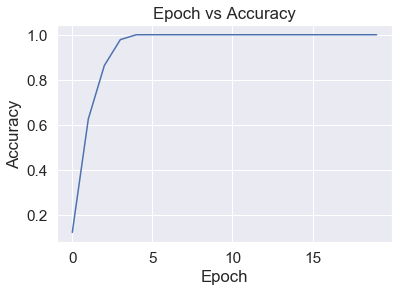

In [66]:


encoder = LabelEncoder()
encoder.fit(Y_trainScaler)
encoded_YTrain = encoder.transform(Y_trainScaler)
encoded_YValidation = encoder.transform(Y_validationScaler)
encode_XTrain=X_trainPCAScaler.reshape(X_trainPCAScaler.shape[0],X_trainPCAScaler.shape[1],1)
encode_Xvalidation=X_validationPCAScaler.reshape(X_validationPCAScaler.shape[0],X_validationPCAScaler.shape[1],1)
# convert integers to dummy variables (i.e. one hot encoded)
categorical_YTrain = np_utils.to_categorical(encoded_YTrain)
categorical_YValidation = np_utils.to_categorical(encoded_YValidation)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=(3), activation='relu', input_shape=(encode_XTrain.shape[1],1)))
#model.add(Dropout(0.5))
model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
model.add(MaxPooling1D(1))
model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
#model.add(Conv1D(32, 1, activation='relu'))
#model.add(MaxPooling1D(3))
model.add(Flatten())
#model.add(GlobalAveragePooling1D())
#model.add(Dense(100, activation='softsign'))
#model.add(Dropout(0.5))
model.add(Dense(100, activation='softsign'))

model.add(Dense(11,activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# summarize layers
print(model.summary())



history=model.fit(encode_XTrain,categorical_YTrain, epochs=20, batch_size=64)

# plot metrics
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.show()
#

In [67]:
scores = model.evaluate(encode_Xvalidation,categorical_YValidation , verbose=1)
print("Baseline Error: %.2f%%" % (100-scores[1]*100))

35/35 [==============================] - 0s 3ms/step
Baseline Error: 5.71%


In [68]:
scores

[0.25909298317773, 0.9428571445601327]

In [69]:
snn_pred = model.predict(encode_Xvalidation, batch_size=30, verbose=1)  
snn_predicted = np.argmax(snn_pred, axis=1)
snn_pred_lab = np.argmax(snn_pred, axis=1)
snn_real_lab = np.argmax(categorical_YValidation, axis=1)
print(snn_pred_lab.shape)
print(snn_real_lab.shape)
acc = np.sum(snn_pred_lab==snn_real_lab)/snn_real_lab.shape[0]
print(acc)

35/35 [==============================] - 0s 3ms/step
(35,)
(35,)
0.9428571428571428


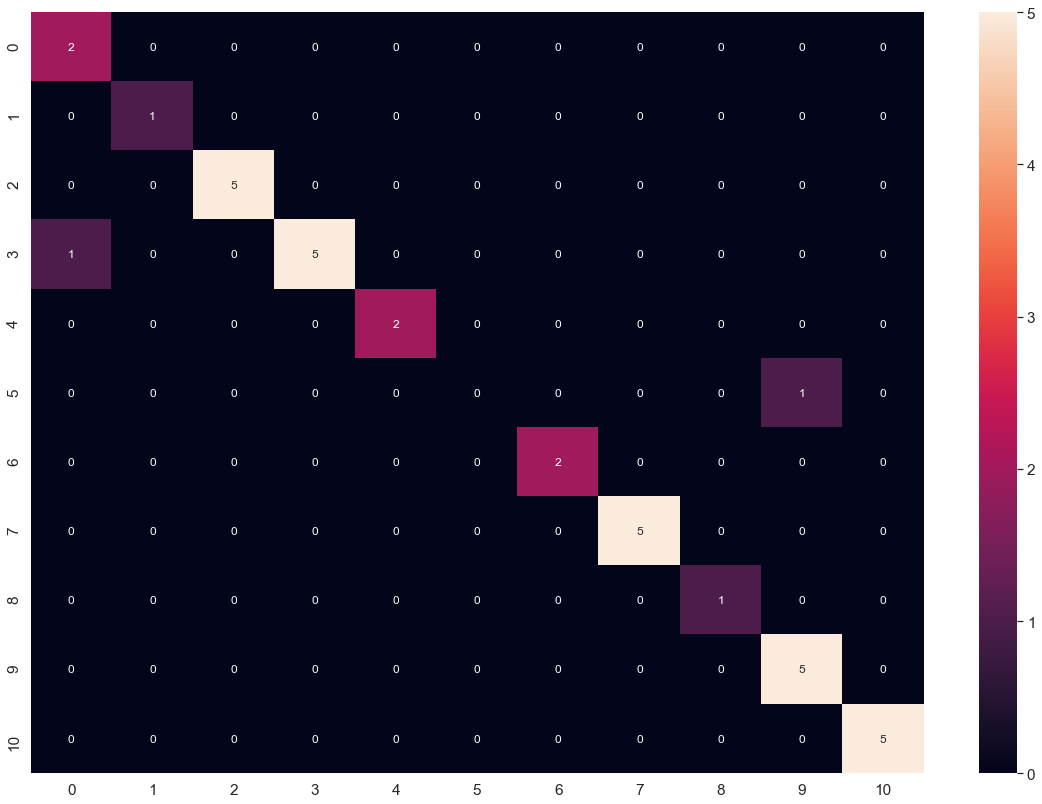

In [70]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(keras.utils.to_categorical(encoded_YValidation, num_classes=11), axis=1), snn_predicted)

# Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(11), range(11))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show() 

In [71]:
snn_report = classification_report(np.argmax(keras.utils.to_categorical(encoded_YValidation, num_classes=11), axis=1), snn_predicted)  
print(snn_report)

              precision    recall  f1-score   support

           0       0.67      1.00      0.80         2
           1       1.00      1.00      1.00         1
           2       1.00      1.00      1.00         5
           3       1.00      0.83      0.91         6
           4       1.00      1.00      1.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         2
           7       1.00      1.00      1.00         5
           8       1.00      1.00      1.00         1
           9       0.83      1.00      0.91         5
          10       1.00      1.00      1.00         5

    accuracy                           0.94        35
   macro avg       0.86      0.89      0.87        35
weighted avg       0.93      0.94      0.93        35



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Tuning FNN 

In [72]:
encoder = LabelEncoder()
encoder.fit(Y_trainScaler)
encoded_YTrain = encoder.transform(Y_trainScaler)
encoded_YValidation = encoder.transform(Y_validationScaler)
encode_XTrain=X_trainPCAScaler
encode_Xvalidation=X_validationPCAScaler
# convert integers to dummy variables (i.e. one hot encoded)
categorical_YTrain = np_utils.to_categorical(encoded_YTrain)
categorical_YValidation = np_utils.to_categorical(encoded_YValidation)



# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=encode_XTrain.shape[1], activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(11, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

In [73]:
# How to Tune Batch Size and Number of Epochs

model = KerasClassifier(build_fn=create_model, verbose=1)
# define the grid search parameters
batch_size = [10, 20,30, 40,50, 60,70, 80,90, 100]
epochs = [10, 50, 100, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Epoch 1/10
92/92 [==============================] - 0s 3ms/step - loss: 2.3052 - acc: 0.3152
Epoch 2/10
92/92 [==============================] - 0s 358us/step - loss: 1.6693 - acc: 0.6304
Epoch 3/10
92/92 [==============================] - 0s 347us/step - loss: 1.1397 - acc: 0.8152
Epoch 4/10
92/92 [==============================] - 0s 368us/step - loss: 0.4501 - acc: 0.9565
Epoch 5/10
92/92 [==============================] - 0s 347us/step - loss: 0.1063 - acc: 1.0000
Epoch 6/10
92/92 [==============================] - 0s 347us/step - loss: 0.0459 - acc: 1.0000
Epoch 7/10
92/92 [==============================] - 0s 368us/step - loss: 0.0158 - acc: 1.0000
Epoch 8/10
92/92 [==============================] - 0s 347us/step - loss: 0.0291 - acc: 0.9783
Epoch 9/10
92/92 [==============================] - 0s 336us/step - loss: 0.0045 - acc: 1.0000
Epoch 10/10
47/47 [==============================] - 0s 1ms/step
Epoch 1/10
93/93 [==============================] - 0s 4ms/step - loss: 2.3538 - a

93/93 [==============================] - 0s 354us/step - loss: 2.1401 - acc: 0.1505
Epoch 37/50
93/93 [==============================] - 0s 365us/step - loss: 2.1401 - acc: 0.1505
Epoch 38/50
93/93 [==============================] - 0s 343us/step - loss: 2.1401 - acc: 0.1505
Epoch 39/50
93/93 [==============================] - 0s 354us/step - loss: 2.1401 - acc: 0.1505
Epoch 40/50
93/93 [==============================] - 0s 365us/step - loss: 2.1401 - acc: 0.1505
Epoch 41/50
93/93 [==============================] - 0s 354us/step - loss: 2.1401 - acc: 0.1505
Epoch 42/50
93/93 [==============================] - 0s 365us/step - loss: 2.1401 - acc: 0.1505
Epoch 43/50
93/93 [==============================] - 0s 354us/step - loss: 2.1401 - acc: 0.1505
Epoch 44/50
93/93 [==============================] - 0s 354us/step - loss: 2.1401 - acc: 0.1505
Epoch 45/50
93/93 [==============================] - 0s 365us/step - loss: 2.1401 - acc: 0.1505
Epoch 46/50
93/93 [==============================] -

93/93 [==============================] - 0s 365us/step - loss: 2.0687e-04 - acc: 1.0000
Epoch 50/100
93/93 [==============================] - 0s 386us/step - loss: 2.0308e-04 - acc: 1.0000
Epoch 51/100
93/93 [==============================] - 0s 408us/step - loss: 1.9549e-04 - acc: 1.0000
Epoch 52/100
93/93 [==============================] - 0s 397us/step - loss: 1.8577e-04 - acc: 1.0000
Epoch 53/100
93/93 [==============================] - 0s 397us/step - loss: 1.8080e-04 - acc: 1.0000
Epoch 54/100
93/93 [==============================] - 0s 397us/step - loss: 1.7482e-04 - acc: 1.0000
Epoch 55/100
93/93 [==============================] - 0s 375us/step - loss: 1.7256e-04 - acc: 1.0000
Epoch 56/100
93/93 [==============================] - 0s 386us/step - loss: 1.6688e-04 - acc: 1.0000
Epoch 57/100
93/93 [==============================] - 0s 376us/step - loss: 1.6035e-04 - acc: 1.0000
Epoch 58/100
93/93 [==============================] - 0s 376us/step - loss: 1.5644e-04 - acc: 1.0000
Epo

92/92 [==============================] - 0s 358us/step - loss: 0.0021 - acc: 1.0000
Epoch 12/200
92/92 [==============================] - 0s 379us/step - loss: 0.0019 - acc: 1.0000
Epoch 13/200
92/92 [==============================] - 0s 380us/step - loss: 0.0017 - acc: 1.0000
Epoch 14/200
92/92 [==============================] - 0s 379us/step - loss: 0.0015 - acc: 1.0000
Epoch 15/200
92/92 [==============================] - 0s 358us/step - loss: 0.0014 - acc: 1.0000
Epoch 16/200
92/92 [==============================] - 0s 401us/step - loss: 0.0013 - acc: 1.0000
Epoch 17/200
92/92 [==============================] - 0s 390us/step - loss: 0.0012 - acc: 1.0000
Epoch 18/200
92/92 [==============================] - 0s 379us/step - loss: 0.0011 - acc: 1.0000
Epoch 19/200
92/92 [==============================] - 0s 358us/step - loss: 0.0010 - acc: 1.0000
Epoch 20/200
92/92 [==============================] - 0s 379us/step - loss: 9.5310e-04 - acc: 1.0000
Epoch 21/200
92/92 [===================

92/92 [==============================] - 0s 358us/step - loss: 2.1373 - acc: 0.1630
Epoch 176/200
92/92 [==============================] - 0s 379us/step - loss: 2.1373 - acc: 0.1630
Epoch 177/200
92/92 [==============================] - 0s 380us/step - loss: 2.1373 - acc: 0.1630
Epoch 178/200
92/92 [==============================] - 0s 379us/step - loss: 2.1373 - acc: 0.1630
Epoch 179/200
92/92 [==============================] - 0s 358us/step - loss: 2.1373 - acc: 0.1630
Epoch 180/200
92/92 [==============================] - 0s 390us/step - loss: 2.1373 - acc: 0.1630
Epoch 181/200
92/92 [==============================] - 0s 390us/step - loss: 2.1373 - acc: 0.1630
Epoch 182/200
92/92 [==============================] - 0s 390us/step - loss: 2.1373 - acc: 0.1630
Epoch 183/200
92/92 [==============================] - 0s 401us/step - loss: 2.1373 - acc: 0.1630
Epoch 184/200
92/92 [==============================] - 0s 401us/step - loss: 2.1373 - acc: 0.1630
Epoch 185/200
92/92 [=============

93/93 [==============================] - 0s 386us/step - loss: 3.5924e-05 - acc: 1.0000
Epoch 138/200
93/93 [==============================] - 0s 397us/step - loss: 3.5283e-05 - acc: 1.0000
Epoch 139/200
93/93 [==============================] - 0s 375us/step - loss: 3.4703e-05 - acc: 1.0000
Epoch 140/200
93/93 [==============================] - 0s 375us/step - loss: 3.4664e-05 - acc: 1.0000
Epoch 141/200
93/93 [==============================] - 0s 386us/step - loss: 3.3180e-05 - acc: 1.0000
Epoch 142/200
93/93 [==============================] - 0s 375us/step - loss: 3.4129e-05 - acc: 1.0000
Epoch 143/200
93/93 [==============================] - 0s 365us/step - loss: 3.3511e-05 - acc: 1.0000
Epoch 144/200
93/93 [==============================] - 0s 408us/step - loss: 3.2991e-05 - acc: 1.0000
Epoch 145/200
93/93 [==============================] - 0s 397us/step - loss: 3.1363e-05 - acc: 1.0000
Epoch 146/200
93/93 [==============================] - 0s 397us/step - loss: 3.2338e-05 - acc: 1

93/93 [==============================] - 0s 397us/step - loss: 2.1401 - acc: 0.1505
Epoch 102/200
93/93 [==============================] - 0s 386us/step - loss: 2.1401 - acc: 0.1505
Epoch 103/200
93/93 [==============================] - 0s 375us/step - loss: 2.1401 - acc: 0.1505
Epoch 104/200
93/93 [==============================] - 0s 365us/step - loss: 2.1401 - acc: 0.1505
Epoch 105/200
93/93 [==============================] - 0s 375us/step - loss: 2.1401 - acc: 0.1505
Epoch 106/200
93/93 [==============================] - 0s 365us/step - loss: 2.1401 - acc: 0.1505
Epoch 107/200
93/93 [==============================] - 0s 386us/step - loss: 2.1401 - acc: 0.1505
Epoch 108/200
93/93 [==============================] - 0s 376us/step - loss: 2.1401 - acc: 0.1505
Epoch 109/200
93/93 [==============================] - 0s 365us/step - loss: 2.1401 - acc: 0.1505
Epoch 110/200
93/93 [==============================] - 0s 397us/step - loss: 2.1401 - acc: 0.1505
Epoch 111/200
93/93 [=============

92/92 [==============================] - 0s 238us/step - loss: 6.2939e-04 - acc: 1.0000
Epoch 37/50
92/92 [==============================] - 0s 206us/step - loss: 6.0845e-04 - acc: 1.0000
Epoch 38/50
92/92 [==============================] - 0s 206us/step - loss: 5.8885e-04 - acc: 1.0000
Epoch 39/50
92/92 [==============================] - 0s 211us/step - loss: 5.7059e-04 - acc: 1.0000
Epoch 40/50
92/92 [==============================] - 0s 228us/step - loss: 5.4880e-04 - acc: 1.0000
Epoch 41/50
92/92 [==============================] - 0s 206us/step - loss: 5.3179e-04 - acc: 1.0000
Epoch 42/50
92/92 [==============================] - 0s 206us/step - loss: 5.1426e-04 - acc: 1.0000
Epoch 43/50
92/92 [==============================] - 0s 217us/step - loss: 4.9576e-04 - acc: 1.0000
Epoch 44/50
92/92 [==============================] - 0s 217us/step - loss: 4.8532e-04 - acc: 1.0000
Epoch 45/50
92/92 [==============================] - 0s 201us/step - loss: 4.7226e-04 - acc: 1.0000
Epoch 46/50


92/92 [==============================] - 0s 238us/step - loss: 2.7746e-04 - acc: 1.0000
Epoch 50/100
92/92 [==============================] - 0s 228us/step - loss: 2.6878e-04 - acc: 1.0000
Epoch 51/100
92/92 [==============================] - 0s 228us/step - loss: 2.6160e-04 - acc: 1.0000
Epoch 52/100
92/92 [==============================] - 0s 228us/step - loss: 2.5562e-04 - acc: 1.0000
Epoch 53/100
92/92 [==============================] - 0s 228us/step - loss: 2.4967e-04 - acc: 1.0000
Epoch 54/100
92/92 [==============================] - 0s 217us/step - loss: 2.4302e-04 - acc: 1.0000
Epoch 55/100
92/92 [==============================] - 0s 217us/step - loss: 2.3800e-04 - acc: 1.0000
Epoch 56/100
92/92 [==============================] - 0s 227us/step - loss: 2.3360e-04 - acc: 1.0000
Epoch 57/100
92/92 [==============================] - 0s 228us/step - loss: 2.2916e-04 - acc: 1.0000
Epoch 58/100
92/92 [==============================] - 0s 217us/step - loss: 2.2068e-04 - acc: 1.0000
Epo

93/93 [==============================] - 0s 236us/step - loss: 5.4060e-04 - acc: 1.0000
Epoch 31/100
93/93 [==============================] - 0s 226us/step - loss: 5.1698e-04 - acc: 1.0000
Epoch 32/100
93/93 [==============================] - 0s 247us/step - loss: 5.0601e-04 - acc: 1.0000
Epoch 33/100
93/93 [==============================] - 0s 204us/step - loss: 4.8583e-04 - acc: 1.0000
Epoch 34/100
93/93 [==============================] - 0s 225us/step - loss: 4.6655e-04 - acc: 1.0000
Epoch 35/100
93/93 [==============================] - 0s 215us/step - loss: 4.5860e-04 - acc: 1.0000
Epoch 36/100
93/93 [==============================] - 0s 236us/step - loss: 4.5678e-04 - acc: 1.0000
Epoch 37/100
93/93 [==============================] - 0s 225us/step - loss: 4.3386e-04 - acc: 1.0000
Epoch 38/100
93/93 [==============================] - 0s 214us/step - loss: 4.1391e-04 - acc: 1.0000
Epoch 39/100
93/93 [==============================] - 0s 226us/step - loss: 4.0327e-04 - acc: 1.0000
Epo

93/93 [==============================] - 0s 236us/step - loss: 1.4320e-04 - acc: 1.0000
Epoch 93/100
93/93 [==============================] - 0s 236us/step - loss: 1.4081e-04 - acc: 1.0000
Epoch 94/100
93/93 [==============================] - 0s 236us/step - loss: 1.3795e-04 - acc: 1.0000
Epoch 95/100
93/93 [==============================] - 0s 214us/step - loss: 1.3670e-04 - acc: 1.0000
Epoch 96/100
93/93 [==============================] - 0s 225us/step - loss: 1.3321e-04 - acc: 1.0000
Epoch 97/100
93/93 [==============================] - 0s 236us/step - loss: 1.3025e-04 - acc: 1.0000
Epoch 98/100
93/93 [==============================] - 0s 225us/step - loss: 1.2845e-04 - acc: 1.0000
Epoch 99/100
93/93 [==============================] - 0s 214us/step - loss: 1.2783e-04 - acc: 1.0000
Epoch 100/100
46/46 [==============================] - 0s 8ms/step
Epoch 1/200
92/92 [==============================] - 1s 11ms/step - loss: 2.4442 - acc: 0.0870
Epoch 2/200
92/92 [========================

92/92 [==============================] - 0s 228us/step - loss: 6.3700e-05 - acc: 1.0000
Epoch 154/200
92/92 [==============================] - 0s 228us/step - loss: 6.2374e-05 - acc: 1.0000
Epoch 155/200
92/92 [==============================] - 0s 228us/step - loss: 6.1648e-05 - acc: 1.0000
Epoch 156/200
92/92 [==============================] - 0s 217us/step - loss: 5.9868e-05 - acc: 1.0000
Epoch 157/200
92/92 [==============================] - 0s 217us/step - loss: 5.9044e-05 - acc: 1.0000
Epoch 158/200
92/92 [==============================] - 0s 217us/step - loss: 6.0676e-05 - acc: 1.0000
Epoch 159/200
92/92 [==============================] - 0s 217us/step - loss: 5.7109e-05 - acc: 1.0000
Epoch 160/200
92/92 [==============================] - 0s 238us/step - loss: 5.7637e-05 - acc: 1.0000
Epoch 161/200
92/92 [==============================] - 0s 228us/step - loss: 5.6137e-05 - acc: 1.0000
Epoch 162/200
92/92 [==============================] - 0s 206us/step - loss: 5.6467e-05 - acc: 1

93/93 [==============================] - 0s 247us/step - loss: 4.4872e-04 - acc: 1.0000
Epoch 35/200
93/93 [==============================] - 0s 215us/step - loss: 4.3083e-04 - acc: 1.0000
Epoch 36/200
93/93 [==============================] - 0s 247us/step - loss: 4.1671e-04 - acc: 1.0000
Epoch 37/200
93/93 [==============================] - 0s 236us/step - loss: 4.0645e-04 - acc: 1.0000
Epoch 38/200
93/93 [==============================] - 0s 268us/step - loss: 3.9119e-04 - acc: 1.0000
Epoch 39/200
93/93 [==============================] - 0s 257us/step - loss: 3.8251e-04 - acc: 1.0000
Epoch 40/200
93/93 [==============================] - 0s 236us/step - loss: 3.7316e-04 - acc: 1.0000
Epoch 41/200
93/93 [==============================] - 0s 247us/step - loss: 3.5953e-04 - acc: 1.0000
Epoch 42/200
93/93 [==============================] - 0s 268us/step - loss: 3.4921e-04 - acc: 1.0000
Epoch 43/200
93/93 [==============================] - 0s 247us/step - loss: 3.3971e-04 - acc: 1.0000
Epo

93/93 [==============================] - 0s 236us/step - loss: 8.1621e-05 - acc: 1.0000
Epoch 116/200
93/93 [==============================] - 0s 215us/step - loss: 8.2375e-05 - acc: 1.0000
Epoch 117/200
93/93 [==============================] - 0s 214us/step - loss: 7.9829e-05 - acc: 1.0000
Epoch 118/200
93/93 [==============================] - 0s 236us/step - loss: 7.9214e-05 - acc: 1.0000
Epoch 119/200
93/93 [==============================] - 0s 236us/step - loss: 7.7753e-05 - acc: 1.0000
Epoch 120/200
93/93 [==============================] - 0s 225us/step - loss: 7.6032e-05 - acc: 1.0000
Epoch 121/200
93/93 [==============================] - 0s 236us/step - loss: 7.4997e-05 - acc: 1.0000
Epoch 122/200
93/93 [==============================] - 0s 225us/step - loss: 7.4494e-05 - acc: 1.0000
Epoch 123/200
93/93 [==============================] - 0s 236us/step - loss: 7.3802e-05 - acc: 1.0000
Epoch 124/200
93/93 [==============================] - 0s 225us/step - loss: 7.3104e-05 - acc: 1

93/93 [==============================] - 0s 236us/step - loss: 2.3721 - acc: 0.1505
Epoch 79/200
93/93 [==============================] - 0s 236us/step - loss: 2.3721 - acc: 0.1505
Epoch 80/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.1505
Epoch 81/200
93/93 [==============================] - 0s 257us/step - loss: 2.3721 - acc: 0.1505
Epoch 82/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.1505
Epoch 83/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.1505
Epoch 84/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.1505
Epoch 85/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.1505
Epoch 86/200
93/93 [==============================] - 0s 213us/step - loss: 2.3721 - acc: 0.1505
Epoch 87/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.1505
Epoch 88/200
93/93 [=======================

Epoch 162/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.1505
Epoch 163/200
93/93 [==============================] - 0s 236us/step - loss: 2.3721 - acc: 0.1505
Epoch 164/200
93/93 [==============================] - 0s 226us/step - loss: 2.3721 - acc: 0.1505
Epoch 165/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.1505
Epoch 166/200
93/93 [==============================] - 0s 236us/step - loss: 2.3721 - acc: 0.1505
Epoch 167/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.1505
Epoch 168/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.1505
Epoch 169/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.1505
Epoch 170/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.1505
Epoch 171/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.1505
Epoch 172/200
93/93 

93/93 [==============================] - 0s 193us/step - loss: 6.4461e-04 - acc: 1.0000
Epoch 48/50
93/93 [==============================] - 0s 214us/step - loss: 6.2826e-04 - acc: 1.0000
Epoch 49/50
93/93 [==============================] - 0s 204us/step - loss: 6.1326e-04 - acc: 1.0000
Epoch 50/50
46/46 [==============================] - 0s 10ms/step
Epoch 1/50
93/93 [==============================] - 1s 14ms/step - loss: 2.5242 - acc: 0.0753
Epoch 2/50
93/93 [==============================] - 0s 214us/step - loss: 2.0499 - acc: 0.3978
Epoch 3/50
93/93 [==============================] - 0s 193us/step - loss: 1.8576 - acc: 0.4516
Epoch 4/50
93/93 [==============================] - 0s 182us/step - loss: 1.6220 - acc: 0.5484
Epoch 5/50
93/93 [==============================] - 0s 182us/step - loss: 1.3498 - acc: 0.5376
Epoch 6/50
93/93 [==============================] - 0s 193us/step - loss: 1.0345 - acc: 0.6667
Epoch 7/50
93/93 [==============================] - 0s 193us/step - loss: 0.6

92/92 [==============================] - 0s 206us/step - loss: 0.0011 - acc: 1.0000
Epoch 32/100
92/92 [==============================] - 0s 184us/step - loss: 0.0011 - acc: 1.0000
Epoch 33/100
92/92 [==============================] - 0s 185us/step - loss: 0.0011 - acc: 1.0000
Epoch 34/100
92/92 [==============================] - 0s 195us/step - loss: 0.0010 - acc: 1.0000
Epoch 35/100
92/92 [==============================] - 0s 195us/step - loss: 0.0010 - acc: 1.0000
Epoch 36/100
92/92 [==============================] - 0s 196us/step - loss: 9.5771e-04 - acc: 1.0000
Epoch 37/100
92/92 [==============================] - 0s 196us/step - loss: 9.2606e-04 - acc: 1.0000
Epoch 38/100
92/92 [==============================] - 0s 206us/step - loss: 8.8972e-04 - acc: 1.0000
Epoch 39/100
92/92 [==============================] - 0s 195us/step - loss: 8.6619e-04 - acc: 1.0000
Epoch 40/100
92/92 [==============================] - 0s 206us/step - loss: 8.2989e-04 - acc: 1.0000
Epoch 41/100
92/92 [===

93/93 [==============================] - 0s 204us/step - loss: 2.2948 - acc: 0.2258
Epoch 96/100
93/93 [==============================] - 0s 193us/step - loss: 2.2948 - acc: 0.2258
Epoch 97/100
93/93 [==============================] - 0s 193us/step - loss: 2.2948 - acc: 0.2258
Epoch 98/100
93/93 [==============================] - 0s 204us/step - loss: 2.2948 - acc: 0.2258
Epoch 99/100
93/93 [==============================] - 0s 193us/step - loss: 2.2948 - acc: 0.2258
Epoch 100/100
46/46 [==============================] - 1s 17ms/step
Epoch 1/100
93/93 [==============================] - 1s 15ms/step - loss: 2.4724 - acc: 0.1183
Epoch 2/100
93/93 [==============================] - 0s 172us/step - loss: 1.9901 - acc: 0.4194
Epoch 3/100
93/93 [==============================] - 0s 182us/step - loss: 1.7553 - acc: 0.4624
Epoch 4/100
93/93 [==============================] - 0s 193us/step - loss: 1.5142 - acc: 0.4839
Epoch 5/100
93/93 [==============================] - 0s 182us/step - loss: 1.

92/92 [==============================] - 0s 195us/step - loss: 3.8265e-04 - acc: 1.0000
Epoch 61/200
92/92 [==============================] - 0s 195us/step - loss: 3.7257e-04 - acc: 1.0000
Epoch 62/200
92/92 [==============================] - 0s 195us/step - loss: 3.6340e-04 - acc: 1.0000
Epoch 63/200
92/92 [==============================] - 0s 196us/step - loss: 3.5497e-04 - acc: 1.0000
Epoch 64/200
92/92 [==============================] - 0s 195us/step - loss: 3.4590e-04 - acc: 1.0000
Epoch 65/200
92/92 [==============================] - 0s 195us/step - loss: 3.3930e-04 - acc: 1.0000
Epoch 66/200
92/92 [==============================] - 0s 195us/step - loss: 3.3027e-04 - acc: 1.0000
Epoch 67/200
92/92 [==============================] - 0s 195us/step - loss: 3.2351e-04 - acc: 1.0000
Epoch 68/200
92/92 [==============================] - 0s 195us/step - loss: 3.1333e-04 - acc: 1.0000
Epoch 69/200
92/92 [==============================] - 0s 200us/step - loss: 3.0600e-04 - acc: 1.0000
Epo

93/93 [==============================] - 0s 182us/step - loss: 0.0020 - acc: 1.0000
Epoch 22/200
93/93 [==============================] - 0s 193us/step - loss: 0.0018 - acc: 1.0000
Epoch 23/200
93/93 [==============================] - 0s 204us/step - loss: 0.0017 - acc: 1.0000
Epoch 24/200
93/93 [==============================] - 0s 193us/step - loss: 0.0016 - acc: 1.0000
Epoch 25/200
93/93 [==============================] - 0s 204us/step - loss: 0.0015 - acc: 1.0000
Epoch 26/200
93/93 [==============================] - 0s 204us/step - loss: 0.0014 - acc: 1.0000
Epoch 27/200
93/93 [==============================] - 0s 215us/step - loss: 0.0013 - acc: 1.0000
Epoch 28/200
93/93 [==============================] - 0s 204us/step - loss: 0.0013 - acc: 1.0000
Epoch 29/200
93/93 [==============================] - 0s 204us/step - loss: 0.0012 - acc: 1.0000
Epoch 30/200
93/93 [==============================] - 0s 204us/step - loss: 0.0012 - acc: 1.0000
Epoch 31/200
93/93 [=======================

93/93 [==============================] - 0s 189us/step - loss: 2.2948 - acc: 0.2258
Epoch 185/200
93/93 [==============================] - 0s 193us/step - loss: 2.2948 - acc: 0.2258
Epoch 186/200
93/93 [==============================] - 0s 204us/step - loss: 2.2948 - acc: 0.2258
Epoch 187/200
93/93 [==============================] - 0s 193us/step - loss: 2.2948 - acc: 0.2258
Epoch 188/200
93/93 [==============================] - 0s 193us/step - loss: 2.2948 - acc: 0.2258
Epoch 189/200
93/93 [==============================] - 0s 204us/step - loss: 2.2948 - acc: 0.2258
Epoch 190/200
93/93 [==============================] - 0s 214us/step - loss: 2.2948 - acc: 0.2258
Epoch 191/200
93/93 [==============================] - 0s 204us/step - loss: 2.2948 - acc: 0.2258
Epoch 192/200
93/93 [==============================] - 0s 225us/step - loss: 2.2948 - acc: 0.2258
Epoch 193/200
93/93 [==============================] - 0s 247us/step - loss: 2.2948 - acc: 0.2258
Epoch 194/200
93/93 [=============

93/93 [==============================] - 0s 204us/step - loss: 8.3203e-05 - acc: 1.0000
Epoch 147/200
93/93 [==============================] - 0s 183us/step - loss: 8.2887e-05 - acc: 1.0000
Epoch 148/200
93/93 [==============================] - 0s 193us/step - loss: 8.2102e-05 - acc: 1.0000
Epoch 149/200
93/93 [==============================] - 0s 204us/step - loss: 8.1781e-05 - acc: 1.0000
Epoch 150/200
93/93 [==============================] - 0s 204us/step - loss: 8.2379e-05 - acc: 1.0000
Epoch 151/200
93/93 [==============================] - 0s 193us/step - loss: 8.2195e-05 - acc: 1.0000
Epoch 152/200
93/93 [==============================] - 0s 193us/step - loss: 7.8156e-05 - acc: 1.0000
Epoch 153/200
93/93 [==============================] - 0s 193us/step - loss: 7.8396e-05 - acc: 1.0000
Epoch 154/200
93/93 [==============================] - 0s 193us/step - loss: 7.7650e-05 - acc: 1.0000
Epoch 155/200
93/93 [==============================] - 0s 193us/step - loss: 7.7166e-05 - acc: 1

93/93 [==============================] - 0s 172us/step - loss: 2.3721 - acc: 0.2258
Epoch 30/50
93/93 [==============================] - 0s 182us/step - loss: 2.3721 - acc: 0.2258
Epoch 31/50
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.2258
Epoch 32/50
93/93 [==============================] - 0s 161us/step - loss: 2.3721 - acc: 0.2258
Epoch 33/50
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.2258
Epoch 34/50
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.2258
Epoch 35/50
93/93 [==============================] - 0s 193us/step - loss: 2.3721 - acc: 0.2258
Epoch 36/50
93/93 [==============================] - 0s 172us/step - loss: 2.3721 - acc: 0.2258
Epoch 37/50
93/93 [==============================] - 0s 204us/step - loss: 2.3721 - acc: 0.2258
Epoch 38/50
93/93 [==============================] - 0s 193us/step - loss: 2.3721 - acc: 0.2258
Epoch 39/50
93/93 [==============================] -

92/92 [==============================] - 0s 163us/step - loss: 2.3979 - acc: 0.1630
Epoch 98/100
92/92 [==============================] - 0s 184us/step - loss: 2.3979 - acc: 0.1630
Epoch 99/100
92/92 [==============================] - 0s 174us/step - loss: 2.3979 - acc: 0.1630
Epoch 100/100
47/47 [==============================] - 1s 16ms/step
Epoch 1/100
93/93 [==============================] - 2s 20ms/step - loss: 2.4849 - acc: 0.0538
Epoch 2/100
93/93 [==============================] - 0s 139us/step - loss: 2.1100 - acc: 0.2043
Epoch 3/100
93/93 [==============================] - 0s 150us/step - loss: 1.9732 - acc: 0.3871
Epoch 4/100
93/93 [==============================] - 0s 139us/step - loss: 1.8144 - acc: 0.5161
Epoch 5/100
93/93 [==============================] - 0s 150us/step - loss: 1.6096 - acc: 0.5699
Epoch 6/100
93/93 [==============================] - 0s 150us/step - loss: 1.3462 - acc: 0.6129
Epoch 7/100
93/93 [==============================] - 0s 153us/step - loss: 0.98

93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 61/100
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 62/100
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 63/100
93/93 [==============================] - 0s 144us/step - loss: 2.3721 - acc: 0.1505
Epoch 64/100
93/93 [==============================] - 0s 155us/step - loss: 2.3721 - acc: 0.1505
Epoch 65/100
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 66/100
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 67/100
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 68/100
93/93 [==============================] - 0s 140us/step - loss: 2.3721 - acc: 0.1505
Epoch 69/100
93/93 [==============================] - 0s 140us/step - loss: 2.3721 - acc: 0.1505
Epoch 70/100
93/93 [=======================

92/92 [==============================] - 0s 152us/step - loss: 1.2320e-04 - acc: 1.0000
Epoch 125/200
92/92 [==============================] - 0s 152us/step - loss: 1.2149e-04 - acc: 1.0000
Epoch 126/200
92/92 [==============================] - 0s 152us/step - loss: 1.2090e-04 - acc: 1.0000
Epoch 127/200
92/92 [==============================] - 0s 152us/step - loss: 1.2070e-04 - acc: 1.0000
Epoch 128/200
92/92 [==============================] - 0s 152us/step - loss: 1.1852e-04 - acc: 1.0000
Epoch 129/200
92/92 [==============================] - 0s 163us/step - loss: 1.1759e-04 - acc: 1.0000
Epoch 130/200
92/92 [==============================] - 0s 163us/step - loss: 1.1583e-04 - acc: 1.0000
Epoch 131/200
92/92 [==============================] - 0s 163us/step - loss: 1.1534e-04 - acc: 1.0000
Epoch 132/200
92/92 [==============================] - 0s 152us/step - loss: 1.1351e-04 - acc: 1.0000
Epoch 133/200
92/92 [==============================] - 0s 152us/step - loss: 1.1146e-04 - acc: 1

93/93 [==============================] - 0s 161us/step - loss: 1.6457 - acc: 0.6452
Epoch 5/200
93/93 [==============================] - 0s 150us/step - loss: 1.3930 - acc: 0.6559
Epoch 6/200
93/93 [==============================] - 0s 138us/step - loss: 1.1065 - acc: 0.7097
Epoch 7/200
93/93 [==============================] - 0s 161us/step - loss: 0.7990 - acc: 0.7742
Epoch 8/200
93/93 [==============================] - 0s 150us/step - loss: 0.5020 - acc: 0.8817
Epoch 9/200
93/93 [==============================] - 0s 182us/step - loss: 0.2780 - acc: 0.9892
Epoch 10/200
93/93 [==============================] - 0s 193us/step - loss: 0.1509 - acc: 1.0000
Epoch 11/200
93/93 [==============================] - 0s 172us/step - loss: 0.0747 - acc: 1.0000
Epoch 12/200
93/93 [==============================] - 0s 172us/step - loss: 0.0372 - acc: 1.0000
Epoch 13/200
93/93 [==============================] - 0s 193us/step - loss: 0.0211 - acc: 1.0000
Epoch 14/200
93/93 [============================

93/93 [==============================] - 0s 204us/step - loss: 2.3721 - acc: 0.2258
Epoch 171/200
93/93 [==============================] - 0s 193us/step - loss: 2.3721 - acc: 0.2258
Epoch 172/200
93/93 [==============================] - 0s 225us/step - loss: 2.3721 - acc: 0.2258
Epoch 173/200
93/93 [==============================] - 0s 182us/step - loss: 2.3721 - acc: 0.2258
Epoch 174/200
93/93 [==============================] - 0s 172us/step - loss: 2.3721 - acc: 0.2258
Epoch 175/200
93/93 [==============================] - 0s 193us/step - loss: 2.3721 - acc: 0.2258
Epoch 176/200
93/93 [==============================] - 0s 172us/step - loss: 2.3721 - acc: 0.2258
Epoch 177/200
93/93 [==============================] - 0s 182us/step - loss: 2.3721 - acc: 0.2258
Epoch 178/200
93/93 [==============================] - 0s 172us/step - loss: 2.3721 - acc: 0.2258
Epoch 179/200
93/93 [==============================] - 0s 182us/step - loss: 2.3721 - acc: 0.2258
Epoch 180/200
93/93 [=============

93/93 [==============================] - 0s 161us/step - loss: 2.3721 - acc: 0.1505
Epoch 138/200
93/93 [==============================] - 0s 204us/step - loss: 2.3721 - acc: 0.1505
Epoch 139/200
93/93 [==============================] - 0s 182us/step - loss: 2.3721 - acc: 0.1505
Epoch 140/200
93/93 [==============================] - 0s 193us/step - loss: 2.3721 - acc: 0.1505
Epoch 141/200
93/93 [==============================] - 0s 172us/step - loss: 2.3721 - acc: 0.1505
Epoch 142/200
93/93 [==============================] - 0s 172us/step - loss: 2.3721 - acc: 0.1505
Epoch 143/200
93/93 [==============================] - 0s 161us/step - loss: 2.3721 - acc: 0.1505
Epoch 144/200
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 145/200
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 146/200
93/93 [==============================] - 0s 161us/step - loss: 2.3721 - acc: 0.1505
Epoch 147/200
93/93 [=============

93/93 [==============================] - 0s 118us/step - loss: 2.3463 - acc: 0.2258
Epoch 24/50
93/93 [==============================] - 0s 118us/step - loss: 2.3463 - acc: 0.2258
Epoch 25/50
93/93 [==============================] - 0s 118us/step - loss: 2.3463 - acc: 0.2258
Epoch 26/50
93/93 [==============================] - 0s 118us/step - loss: 2.3463 - acc: 0.2258
Epoch 27/50
93/93 [==============================] - 0s 107us/step - loss: 2.3463 - acc: 0.2258
Epoch 28/50
93/93 [==============================] - 0s 107us/step - loss: 2.3463 - acc: 0.2258
Epoch 29/50
93/93 [==============================] - 0s 107us/step - loss: 2.3463 - acc: 0.2258
Epoch 30/50
93/93 [==============================] - 0s 108us/step - loss: 2.3463 - acc: 0.2258
Epoch 31/50
93/93 [==============================] - 0s 118us/step - loss: 2.3463 - acc: 0.2258
Epoch 32/50
93/93 [==============================] - 0s 118us/step - loss: 2.3463 - acc: 0.2258
Epoch 33/50
93/93 [==============================] -

92/92 [==============================] - 0s 141us/step - loss: 1.4168e-04 - acc: 1.0000
Epoch 90/100
92/92 [==============================] - 0s 130us/step - loss: 1.4232e-04 - acc: 1.0000
Epoch 91/100
92/92 [==============================] - 0s 141us/step - loss: 1.4358e-04 - acc: 1.0000
Epoch 92/100
92/92 [==============================] - 0s 120us/step - loss: 1.4030e-04 - acc: 1.0000
Epoch 93/100
92/92 [==============================] - 0s 130us/step - loss: 1.3684e-04 - acc: 1.0000
Epoch 94/100
92/92 [==============================] - 0s 108us/step - loss: 1.3499e-04 - acc: 1.0000
Epoch 95/100
92/92 [==============================] - 0s 130us/step - loss: 1.3614e-04 - acc: 1.0000
Epoch 96/100
92/92 [==============================] - 0s 119us/step - loss: 1.3027e-04 - acc: 1.0000
Epoch 97/100
92/92 [==============================] - 0s 109us/step - loss: 1.2985e-04 - acc: 1.0000
Epoch 98/100
92/92 [==============================] - 0s 130us/step - loss: 1.3046e-04 - acc: 1.0000
Epo

93/93 [==============================] - 0s 118us/step - loss: 2.3463 - acc: 0.1505
Epoch 56/100
93/93 [==============================] - 0s 107us/step - loss: 2.3463 - acc: 0.1505
Epoch 57/100
93/93 [==============================] - 0s 107us/step - loss: 2.3463 - acc: 0.1505
Epoch 58/100
93/93 [==============================] - 0s 118us/step - loss: 2.3463 - acc: 0.1505
Epoch 59/100
93/93 [==============================] - 0s 91us/step - loss: 2.3463 - acc: 0.1505
Epoch 60/100
93/93 [==============================] - 0s 107us/step - loss: 2.3463 - acc: 0.1505
Epoch 61/100
93/93 [==============================] - 0s 107us/step - loss: 2.3463 - acc: 0.1505
Epoch 62/100
93/93 [==============================] - 0s 107us/step - loss: 2.3463 - acc: 0.1505
Epoch 63/100
93/93 [==============================] - 0s 97us/step - loss: 2.3463 - acc: 0.1505
Epoch 64/100
93/93 [==============================] - 0s 97us/step - loss: 2.3463 - acc: 0.1505
Epoch 65/100
93/93 [==========================

92/92 [==============================] - 0s 119us/step - loss: 9.2080e-05 - acc: 1.0000
Epoch 120/200
92/92 [==============================] - 0s 108us/step - loss: 1.1499e-04 - acc: 1.0000
Epoch 121/200
92/92 [==============================] - 0s 108us/step - loss: 8.8297e-05 - acc: 1.0000
Epoch 122/200
92/92 [==============================] - 0s 119us/step - loss: 8.9402e-05 - acc: 1.0000
Epoch 123/200
92/92 [==============================] - 0s 119us/step - loss: 8.6357e-05 - acc: 1.0000
Epoch 124/200
92/92 [==============================] - 0s 119us/step - loss: 8.5469e-05 - acc: 1.0000
Epoch 125/200
92/92 [==============================] - 0s 119us/step - loss: 8.9208e-05 - acc: 1.0000
Epoch 126/200
92/92 [==============================] - 0s 119us/step - loss: 8.3968e-05 - acc: 1.0000
Epoch 127/200
92/92 [==============================] - 0s 120us/step - loss: 8.6976e-05 - acc: 1.0000
Epoch 128/200
92/92 [==============================] - 0s 108us/step - loss: 8.4367e-05 - acc: 1

Epoch 81/200
93/93 [==============================] - 0s 118us/step - loss: 2.1325e-04 - acc: 1.0000
Epoch 82/200
93/93 [==============================] - 0s 129us/step - loss: 2.0920e-04 - acc: 1.0000
Epoch 83/200
93/93 [==============================] - 0s 129us/step - loss: 2.0692e-04 - acc: 1.0000
Epoch 84/200
93/93 [==============================] - 0s 129us/step - loss: 2.0571e-04 - acc: 1.0000
Epoch 85/200
93/93 [==============================] - 0s 150us/step - loss: 2.0143e-04 - acc: 1.0000
Epoch 86/200
93/93 [==============================] - 0s 118us/step - loss: 2.0037e-04 - acc: 1.0000
Epoch 87/200
93/93 [==============================] - 0s 139us/step - loss: 2.0183e-04 - acc: 1.0000
Epoch 88/200
93/93 [==============================] - 0s 150us/step - loss: 1.9656e-04 - acc: 1.0000
Epoch 89/200
93/93 [==============================] - 0s 139us/step - loss: 1.9686e-04 - acc: 1.0000
Epoch 90/200
93/93 [==============================] - 0s 161us/step - loss: 1.9351e-04 - ac

93/93 [==============================] - 0s 129us/step - loss: 2.3463 - acc: 0.1505
Epoch 44/200
93/93 [==============================] - 0s 129us/step - loss: 2.3463 - acc: 0.1505
Epoch 45/200
93/93 [==============================] - 0s 129us/step - loss: 2.3463 - acc: 0.1505
Epoch 46/200
93/93 [==============================] - 0s 161us/step - loss: 2.3463 - acc: 0.1505
Epoch 47/200
93/93 [==============================] - 0s 193us/step - loss: 2.3463 - acc: 0.1505
Epoch 48/200
93/93 [==============================] - 0s 225us/step - loss: 2.3463 - acc: 0.1505
Epoch 49/200
93/93 [==============================] - 0s 236us/step - loss: 2.3463 - acc: 0.1505
Epoch 50/200
93/93 [==============================] - 0s 214us/step - loss: 2.3463 - acc: 0.1505
Epoch 51/200
93/93 [==============================] - 0s 236us/step - loss: 2.3463 - acc: 0.1505
Epoch 52/200
93/93 [==============================] - 0s 225us/step - loss: 2.3463 - acc: 0.1505
Epoch 53/200
93/93 [=======================

47/47 [==============================] - 1s 24ms/step
Epoch 1/10
93/93 [==============================] - 3s 30ms/step - loss: 2.5171 - acc: 0.1183
Epoch 2/10
93/93 [==============================] - 0s 139us/step - loss: 2.0494 - acc: 0.3333
Epoch 3/10
93/93 [==============================] - 0s 139us/step - loss: 1.8552 - acc: 0.4194
Epoch 4/10
93/93 [==============================] - 0s 150us/step - loss: 1.6872 - acc: 0.4086
Epoch 5/10
93/93 [==============================] - 0s 118us/step - loss: 1.5008 - acc: 0.4301
Epoch 6/10
93/93 [==============================] - 0s 150us/step - loss: 1.2990 - acc: 0.4409
Epoch 7/10
93/93 [==============================] - 0s 129us/step - loss: 1.0879 - acc: 0.4624
Epoch 8/10
93/93 [==============================] - 0s 150us/step - loss: 0.8845 - acc: 0.5484
Epoch 9/10
93/93 [==============================] - 0s 129us/step - loss: 0.6612 - acc: 0.7957
Epoch 10/10
46/46 [==============================] - 1s 27ms/step
Epoch 1/10
93/93 [========

93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 48/50
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 49/50
93/93 [==============================] - 0s 129us/step - loss: 2.3721 - acc: 0.1505
Epoch 50/50
46/46 [==============================] - 1s 23ms/step
Epoch 1/100
92/92 [==============================] - 3s 30ms/step - loss: 2.3657 - acc: 0.0870
Epoch 2/100
92/92 [==============================] - 0s 141us/step - loss: 2.0866 - acc: 0.3913
Epoch 3/100
92/92 [==============================] - 0s 141us/step - loss: 1.9245 - acc: 0.5870
Epoch 4/100
92/92 [==============================] - 0s 119us/step - loss: 1.7639 - acc: 0.6630
Epoch 5/100
92/92 [==============================] - 0s 119us/step - loss: 1.5754 - acc: 0.7283
Epoch 6/100
92/92 [==============================] - 0s 108us/step - loss: 1.3602 - acc: 0.8043
Epoch 7/100
92/92 [==============================] - 0s 119us/step - loss: 1.1076 -

Epoch 79/100
92/92 [==============================] - 0s 152us/step - loss: 1.4797e-04 - acc: 1.0000
Epoch 80/100
92/92 [==============================] - 0s 141us/step - loss: 1.4932e-04 - acc: 1.0000
Epoch 81/100
92/92 [==============================] - 0s 130us/step - loss: 1.4495e-04 - acc: 1.0000
Epoch 82/100
92/92 [==============================] - 0s 152us/step - loss: 1.3631e-04 - acc: 1.0000
Epoch 83/100
92/92 [==============================] - 0s 141us/step - loss: 1.4269e-04 - acc: 1.0000
Epoch 84/100
92/92 [==============================] - 0s 130us/step - loss: 1.3570e-04 - acc: 1.0000
Epoch 85/100
92/92 [==============================] - 0s 120us/step - loss: 1.3598e-04 - acc: 1.0000
Epoch 86/100
92/92 [==============================] - 0s 141us/step - loss: 1.3379e-04 - acc: 1.0000
Epoch 87/100
92/92 [==============================] - 0s 130us/step - loss: 1.3219e-04 - acc: 1.0000
Epoch 88/100
92/92 [==============================] - 0s 141us/step - loss: 1.3131e-04 - ac

93/93 [==============================] - 0s 118us/step - loss: 2.3721 - acc: 0.2258
Epoch 63/100
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.2258
Epoch 64/100
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.2258
Epoch 65/100
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.2258
Epoch 66/100
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.2258
Epoch 67/100
93/93 [==============================] - 0s 118us/step - loss: 2.3721 - acc: 0.2258
Epoch 68/100
93/93 [==============================] - 0s 118us/step - loss: 2.3721 - acc: 0.2258
Epoch 69/100
93/93 [==============================] - 0s 118us/step - loss: 2.3721 - acc: 0.2258
Epoch 70/100
93/93 [==============================] - 0s 118us/step - loss: 2.3721 - acc: 0.2258
Epoch 71/100
93/93 [==============================] - 0s 129us/step - loss: 2.3721 - acc: 0.2258
Epoch 72/100
93/93 [=======================

93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 46/100
93/93 [==============================] - ETA: 0s - loss: 2.3979 - acc: 0.150 - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 47/100
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 48/100
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 49/100
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 50/100
93/93 [==============================] - 0s 140us/step - loss: 2.3721 - acc: 0.1505
Epoch 51/100
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 52/100
93/93 [==============================] - 0s 140us/step - loss: 2.3721 - acc: 0.1505
Epoch 53/100
93/93 [==============================] - 0s 129us/step - loss: 2.3721 - acc: 0.1505
Epoch 54/100
93/93 [==============================] - 0s 129us/step - loss: 2.3721 - acc: 0.1505
Epoch

92/92 [==============================] - 0s 119us/step - loss: 1.3613e-04 - acc: 1.0000
Epoch 110/200
92/92 [==============================] - 0s 141us/step - loss: 1.3402e-04 - acc: 1.0000
Epoch 111/200
92/92 [==============================] - 0s 119us/step - loss: 1.3240e-04 - acc: 1.0000
Epoch 112/200
92/92 [==============================] - 0s 141us/step - loss: 1.3435e-04 - acc: 1.0000
Epoch 113/200
92/92 [==============================] - 0s 130us/step - loss: 1.3219e-04 - acc: 1.0000
Epoch 114/200
92/92 [==============================] - 0s 141us/step - loss: 1.2406e-04 - acc: 1.0000
Epoch 115/200
92/92 [==============================] - 0s 141us/step - loss: 1.2938e-04 - acc: 1.0000
Epoch 116/200
92/92 [==============================] - 0s 130us/step - loss: 1.2531e-04 - acc: 1.0000
Epoch 117/200
92/92 [==============================] - 0s 141us/step - loss: 1.2321e-04 - acc: 1.0000
Epoch 118/200
92/92 [==============================] - 0s 130us/step - loss: 1.2191e-04 - acc: 1

93/93 [==============================] - 0s 129us/step - loss: 1.9277e-04 - acc: 1.0000
Epoch 71/200
93/93 [==============================] - 0s 129us/step - loss: 1.8526e-04 - acc: 1.0000
Epoch 72/200
93/93 [==============================] - 0s 118us/step - loss: 1.8321e-04 - acc: 1.0000
Epoch 73/200
93/93 [==============================] - 0s 118us/step - loss: 1.8626e-04 - acc: 1.0000
Epoch 74/200
93/93 [==============================] - 0s 129us/step - loss: 1.7753e-04 - acc: 1.0000
Epoch 75/200
93/93 [==============================] - 0s 129us/step - loss: 1.7799e-04 - acc: 1.0000
Epoch 76/200
93/93 [==============================] - 0s 118us/step - loss: 1.6883e-04 - acc: 1.0000
Epoch 77/200
93/93 [==============================] - 0s 129us/step - loss: 1.7985e-04 - acc: 1.0000
Epoch 78/200
93/93 [==============================] - 0s 129us/step - loss: 1.7704e-04 - acc: 1.0000
Epoch 79/200
93/93 [==============================] - 0s 129us/step - loss: 1.5785e-04 - acc: 1.0000
Epo

93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 32/200
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 33/200
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 34/200
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 35/200
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 36/200
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 37/200
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 38/200
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 39/200
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 40/200
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 41/200
93/93 [=======================

93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 199/200
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 200/200
46/46 [==============================] - 1s 27ms/step
Epoch 1/10
92/92 [==============================] - 3s 36ms/step - loss: 2.6034 - acc: 0.1304
Epoch 2/10
92/92 [==============================] - 0s 130us/step - loss: 2.1502 - acc: 0.3913
Epoch 3/10
92/92 [==============================] - 0s 130us/step - loss: 1.9722 - acc: 0.5870
Epoch 4/10
92/92 [==============================] - 0s 141us/step - loss: 1.8295 - acc: 0.6739
Epoch 5/10
92/92 [==============================] - 0s 141us/step - loss: 1.6614 - acc: 0.6957
Epoch 6/10
92/92 [==============================] - 0s 141us/step - loss: 1.4580 - acc: 0.6739
Epoch 7/10
92/92 [==============================] - 0s 141us/step - loss: 1.2305 - acc: 0.7391
Epoch 8/10
92/92 [==============================] - 0s 141us/step - loss: 0.9840 - acc

93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.1505
Epoch 35/50
93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.1505
Epoch 36/50
93/93 [==============================] - 0s 129us/step - loss: 2.3463 - acc: 0.1505
Epoch 37/50
93/93 [==============================] - 0s 118us/step - loss: 2.3463 - acc: 0.1505
Epoch 38/50
93/93 [==============================] - 0s 140us/step - loss: 2.3463 - acc: 0.1505
Epoch 39/50
93/93 [==============================] - 0s 129us/step - loss: 2.3463 - acc: 0.1505
Epoch 40/50
93/93 [==============================] - 0s 129us/step - loss: 2.3463 - acc: 0.1505
Epoch 41/50
93/93 [==============================] - 0s 118us/step - loss: 2.3463 - acc: 0.1505
Epoch 42/50
93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.1505
Epoch 43/50
93/93 [==============================] - 0s 140us/step - loss: 2.3463 - acc: 0.1505
Epoch 44/50
93/93 [==============================] -

93/93 [==============================] - 0s 150us/step - loss: 2.3463 - acc: 0.2258
Epoch 49/100
93/93 [==============================] - 0s 161us/step - loss: 2.3463 - acc: 0.2258
Epoch 50/100
93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.2258
Epoch 51/100
93/93 [==============================] - 0s 140us/step - loss: 2.3463 - acc: 0.2258
Epoch 52/100
93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.2258
Epoch 53/100
93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.2258
Epoch 54/100
93/93 [==============================] - 0s 182us/step - loss: 2.3463 - acc: 0.2258
Epoch 55/100
93/93 [==============================] - 0s 214us/step - loss: 2.3463 - acc: 0.2258
Epoch 56/100
93/93 [==============================] - 0s 247us/step - loss: 2.3463 - acc: 0.2258
Epoch 57/100
93/93 [==============================] - 0s 236us/step - loss: 2.3463 - acc: 0.2258
Epoch 58/100
93/93 [=======================

93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.1505
Epoch 33/100
93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.1505
Epoch 34/100
93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.1505
Epoch 35/100
93/93 [==============================] - 0s 129us/step - loss: 2.3463 - acc: 0.1505
Epoch 36/100
93/93 [==============================] - 0s 150us/step - loss: 2.3463 - acc: 0.1505
Epoch 37/100
93/93 [==============================] - 0s 140us/step - loss: 2.3463 - acc: 0.1505
Epoch 38/100
93/93 [==============================] - 0s 150us/step - loss: 2.3463 - acc: 0.1505
Epoch 39/100
93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.1505
Epoch 40/100
93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.1505
Epoch 41/100
93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.1505
Epoch 42/100
93/93 [=======================

92/92 [==============================] - 0s 159us/step - loss: 0.0772 - acc: 1.0000
Epoch 17/200
92/92 [==============================] - 0s 130us/step - loss: 0.0478 - acc: 1.0000
Epoch 18/200
92/92 [==============================] - 0s 130us/step - loss: 0.0296 - acc: 1.0000
Epoch 19/200
92/92 [==============================] - 0s 141us/step - loss: 0.0180 - acc: 1.0000
Epoch 20/200
92/92 [==============================] - 0s 141us/step - loss: 0.0113 - acc: 1.0000
Epoch 21/200
92/92 [==============================] - 0s 130us/step - loss: 0.0077 - acc: 1.0000
Epoch 22/200
92/92 [==============================] - 0s 141us/step - loss: 0.0055 - acc: 1.0000
Epoch 23/200
92/92 [==============================] - 0s 152us/step - loss: 0.0041 - acc: 1.0000
Epoch 24/200
92/92 [==============================] - 0s 152us/step - loss: 0.0032 - acc: 1.0000
Epoch 25/200
92/92 [==============================] - 0s 130us/step - loss: 0.0026 - acc: 1.0000
Epoch 26/200
92/92 [=======================

92/92 [==============================] - 0s 130us/step - loss: 1.0400e-04 - acc: 1.0000
Epoch 178/200
92/92 [==============================] - 0s 130us/step - loss: 1.0449e-04 - acc: 1.0000
Epoch 179/200
92/92 [==============================] - 0s 130us/step - loss: 1.0408e-04 - acc: 1.0000
Epoch 180/200
92/92 [==============================] - 0s 119us/step - loss: 1.0204e-04 - acc: 1.0000
Epoch 181/200
92/92 [==============================] - 0s 130us/step - loss: 1.0212e-04 - acc: 1.0000
Epoch 182/200
92/92 [==============================] - 0s 119us/step - loss: 1.0424e-04 - acc: 1.0000
Epoch 183/200
92/92 [==============================] - 0s 130us/step - loss: 1.0205e-04 - acc: 1.0000
Epoch 184/200
92/92 [==============================] - 0s 130us/step - loss: 1.0027e-04 - acc: 1.0000
Epoch 185/200
92/92 [==============================] - 0s 119us/step - loss: 9.8910e-05 - acc: 1.0000
Epoch 186/200
92/92 [==============================] - 0s 119us/step - loss: 9.7724e-05 - acc: 1

93/93 [==============================] - 0s 156us/step - loss: 2.3463 - acc: 0.2258
Epoch 144/200
93/93 [==============================] - 0s 140us/step - loss: 2.3463 - acc: 0.2258
Epoch 145/200
93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.2258
Epoch 146/200
93/93 [==============================] - 0s 150us/step - loss: 2.3463 - acc: 0.2258
Epoch 147/200
93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.2258
Epoch 148/200
93/93 [==============================] - 0s 150us/step - loss: 2.3463 - acc: 0.2258
Epoch 149/200
93/93 [==============================] - 0s 150us/step - loss: 2.3463 - acc: 0.2258
Epoch 150/200
93/93 [==============================] - 0s 140us/step - loss: 2.3463 - acc: 0.2258
Epoch 151/200
93/93 [==============================] - 0s 150us/step - loss: 2.3463 - acc: 0.2258
Epoch 152/200
93/93 [==============================] - 0s 139us/step - loss: 2.3463 - acc: 0.2258
Epoch 153/200
93/93 [=============

93/93 [==============================] - 0s 139us/step - loss: 1.1860e-04 - acc: 1.0000
Epoch 108/200
93/93 [==============================] - 0s 161us/step - loss: 1.1986e-04 - acc: 1.0000
Epoch 109/200
93/93 [==============================] - 0s 150us/step - loss: 1.1481e-04 - acc: 1.0000
Epoch 110/200
93/93 [==============================] - 0s 150us/step - loss: 1.1396e-04 - acc: 1.0000
Epoch 111/200
93/93 [==============================] - 0s 129us/step - loss: 1.1738e-04 - acc: 1.0000
Epoch 112/200
93/93 [==============================] - 0s 150us/step - loss: 1.1332e-04 - acc: 1.0000
Epoch 113/200
93/93 [==============================] - 0s 139us/step - loss: 1.1750e-04 - acc: 1.0000
Epoch 114/200
93/93 [==============================] - 0s 140us/step - loss: 1.1127e-04 - acc: 1.0000
Epoch 115/200
93/93 [==============================] - 0s 139us/step - loss: 1.1109e-04 - acc: 1.0000
Epoch 116/200
93/93 [==============================] - 0s 140us/step - loss: 1.0907e-04 - acc: 1

92/92 [==============================] - 0s 130us/step - loss: 0.0011 - acc: 1.0000
Epoch 40/50
92/92 [==============================] - 0s 141us/step - loss: 0.0010 - acc: 1.0000
Epoch 41/50
92/92 [==============================] - 0s 130us/step - loss: 9.9832e-04 - acc: 1.0000
Epoch 42/50
92/92 [==============================] - 0s 141us/step - loss: 9.6020e-04 - acc: 1.0000
Epoch 43/50
92/92 [==============================] - ETA: 0s - loss: 8.8435e-04 - acc: 1.000 - 0s 141us/step - loss: 9.2716e-04 - acc: 1.0000
Epoch 44/50
92/92 [==============================] - 0s 130us/step - loss: 8.9625e-04 - acc: 1.0000
Epoch 45/50
92/92 [==============================] - 0s 130us/step - loss: 8.6032e-04 - acc: 1.0000
Epoch 46/50
92/92 [==============================] - 0s 130us/step - loss: 8.2250e-04 - acc: 1.0000
Epoch 47/50
92/92 [==============================] - 0s 130us/step - loss: 8.0266e-04 - acc: 1.0000
Epoch 48/50
92/92 [==============================] - 0s 130us/step - loss: 7.6

Epoch 56/100
92/92 [==============================] - 0s 130us/step - loss: 6.8093e-04 - acc: 1.0000
Epoch 57/100
92/92 [==============================] - 0s 130us/step - loss: 6.6467e-04 - acc: 1.0000
Epoch 58/100
92/92 [==============================] - 0s 151us/step - loss: 6.5268e-04 - acc: 1.0000
Epoch 59/100
92/92 [==============================] - 0s 130us/step - loss: 6.3975e-04 - acc: 1.0000
Epoch 60/100
92/92 [==============================] - 0s 130us/step - loss: 6.2507e-04 - acc: 1.0000
Epoch 61/100
92/92 [==============================] - 0s 130us/step - loss: 6.1585e-04 - acc: 1.0000
Epoch 62/100
92/92 [==============================] - 0s 130us/step - loss: 6.0442e-04 - acc: 1.0000
Epoch 63/100
92/92 [==============================] - 0s 151us/step - loss: 5.9400e-04 - acc: 1.0000
Epoch 64/100
92/92 [==============================] - 0s 130us/step - loss: 5.8316e-04 - acc: 1.0000
Epoch 65/100
92/92 [==============================] - 0s 141us/step - loss: 5.7416e-04 - ac

93/93 [==============================] - 0s 193us/step - loss: 8.8122e-04 - acc: 1.0000
Epoch 39/100
93/93 [==============================] - 0s 182us/step - loss: 8.4350e-04 - acc: 1.0000
Epoch 40/100
93/93 [==============================] - 0s 188us/step - loss: 7.9801e-04 - acc: 1.0000
Epoch 41/100
93/93 [==============================] - 0s 185us/step - loss: 7.7518e-04 - acc: 1.0000
Epoch 42/100
93/93 [==============================] - 0s 182us/step - loss: 7.4253e-04 - acc: 1.0000
Epoch 43/100
93/93 [==============================] - 0s 193us/step - loss: 7.1896e-04 - acc: 1.0000
Epoch 44/100
93/93 [==============================] - 0s 204us/step - loss: 6.8863e-04 - acc: 1.0000
Epoch 45/100
93/93 [==============================] - 0s 193us/step - loss: 6.7834e-04 - acc: 1.0000
Epoch 46/100
93/93 [==============================] - 0s 204us/step - loss: 6.5645e-04 - acc: 1.0000
Epoch 47/100
93/93 [==============================] - 0s 214us/step - loss: 6.3207e-04 - acc: 1.0000
Epo

92/92 [==============================] - 0s 173us/step - loss: 1.9254 - acc: 0.5326
Epoch 4/200
92/92 [==============================] - 0s 184us/step - loss: 1.7834 - acc: 0.6413
Epoch 5/200
92/92 [==============================] - 0s 173us/step - loss: 1.6264 - acc: 0.7283
Epoch 6/200
92/92 [==============================] - 0s 163us/step - loss: 1.4591 - acc: 0.7717
Epoch 7/200
92/92 [==============================] - 0s 173us/step - loss: 1.2911 - acc: 0.7174
Epoch 8/200
92/92 [==============================] - 0s 217us/step - loss: 1.1149 - acc: 0.7391
Epoch 9/200
92/92 [==============================] - 0s 173us/step - loss: 0.8960 - acc: 0.8043
Epoch 10/200
92/92 [==============================] - 0s 184us/step - loss: 0.6488 - acc: 0.9022
Epoch 11/200
92/92 [==============================] - 0s 173us/step - loss: 0.4378 - acc: 0.9783
Epoch 12/200
92/92 [==============================] - 0s 173us/step - loss: 0.3191 - acc: 0.9565
Epoch 13/200
92/92 [=============================

92/92 [==============================] - 0s 173us/step - loss: 1.5581e-04 - acc: 1.0000
Epoch 166/200
92/92 [==============================] - 0s 184us/step - loss: 1.5484e-04 - acc: 1.0000
Epoch 167/200
92/92 [==============================] - 0s 163us/step - loss: 1.5026e-04 - acc: 1.0000
Epoch 168/200
92/92 [==============================] - 0s 141us/step - loss: 1.5063e-04 - acc: 1.0000
Epoch 169/200
92/92 [==============================] - 0s 141us/step - loss: 1.4827e-04 - acc: 1.0000
Epoch 170/200
92/92 [==============================] - 0s 173us/step - loss: 1.4833e-04 - acc: 1.0000
Epoch 171/200
92/92 [==============================] - 0s 184us/step - loss: 1.4727e-04 - acc: 1.0000
Epoch 172/200
92/92 [==============================] - 0s 150us/step - loss: 1.4571e-04 - acc: 1.0000
Epoch 173/200
92/92 [==============================] - 0s 141us/step - loss: 1.4570e-04 - acc: 1.0000
Epoch 174/200
92/92 [==============================] - 0s 152us/step - loss: 1.4309e-04 - acc: 1

Epoch 127/200
93/93 [==============================] - 0s 183us/step - loss: 2.3159e-04 - acc: 1.0000
Epoch 128/200
93/93 [==============================] - 0s 161us/step - loss: 2.3382e-04 - acc: 1.0000
Epoch 129/200
93/93 [==============================] - 0s 136us/step - loss: 2.2876e-04 - acc: 1.0000
Epoch 130/200
93/93 [==============================] - 0s 139us/step - loss: 2.2968e-04 - acc: 1.0000
Epoch 131/200
93/93 [==============================] - 0s 139us/step - loss: 2.2555e-04 - acc: 1.0000
Epoch 132/200
93/93 [==============================] - 0s 139us/step - loss: 2.2137e-04 - acc: 1.0000
Epoch 133/200
93/93 [==============================] - 0s 139us/step - loss: 2.1958e-04 - acc: 1.0000
Epoch 134/200
93/93 [==============================] - 0s 161us/step - loss: 2.1765e-04 - acc: 1.0000
Epoch 135/200
93/93 [==============================] - 0s 182us/step - loss: 2.1537e-04 - acc: 1.0000
Epoch 136/200
93/93 [==============================] - 0s 139us/step - loss: 2.149

93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 92/200
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 93/200
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 94/200
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 95/200
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 96/200
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 97/200
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 98/200
93/93 [==============================] - 0s 139us/step - loss: 2.3721 - acc: 0.1505
Epoch 99/200
93/93 [==============================] - 0s 150us/step - loss: 2.3721 - acc: 0.1505
Epoch 100/200
93/93 [==============================] - 0s 172us/step - loss: 2.3721 - acc: 0.1505
Epoch 101/200
93/93 [=====================

92/92 [==============================] - 0s 173us/step - loss: 0.0304 - acc: 1.0000
Epoch 28/50
92/92 [==============================] - 0s 163us/step - loss: 0.0280 - acc: 1.0000
Epoch 29/50
92/92 [==============================] - ETA: 0s - loss: 0.0239 - acc: 1.000 - 0s 163us/step - loss: 0.0235 - acc: 1.0000
Epoch 30/50
92/92 [==============================] - 0s 163us/step - loss: 0.0186 - acc: 1.0000
Epoch 31/50
92/92 [==============================] - 0s 152us/step - loss: 0.0142 - acc: 1.0000
Epoch 32/50
92/92 [==============================] - 0s 152us/step - loss: 0.0106 - acc: 1.0000
Epoch 33/50
92/92 [==============================] - 0s 141us/step - loss: 0.0084 - acc: 1.0000
Epoch 34/50
92/92 [==============================] - 0s 152us/step - loss: 0.0075 - acc: 1.0000
Epoch 35/50
92/92 [==============================] - 0s 163us/step - loss: 0.0075 - acc: 1.0000
Epoch 36/50
92/92 [==============================] - 0s 152us/step - loss: 0.0078 - acc: 1.0000
Epoch 37/50
92

92/92 [==============================] - 0s 173us/step - loss: 0.0044 - acc: 1.0000
Epoch 46/100
92/92 [==============================] - 0s 184us/step - loss: 0.0042 - acc: 1.0000
Epoch 47/100
92/92 [==============================] - 0s 260us/step - loss: 0.0040 - acc: 1.0000
Epoch 48/100
92/92 [==============================] - 0s 217us/step - loss: 0.0038 - acc: 1.0000
Epoch 49/100
92/92 [==============================] - 0s 228us/step - loss: 0.0037 - acc: 1.0000
Epoch 50/100
92/92 [==============================] - 0s 206us/step - loss: 0.0035 - acc: 1.0000
Epoch 51/100
92/92 [==============================] - 0s 184us/step - loss: 0.0031 - acc: 1.0000
Epoch 52/100
92/92 [==============================] - 0s 217us/step - loss: 0.0029 - acc: 1.0000
Epoch 53/100
92/92 [==============================] - 0s 184us/step - loss: 0.0030 - acc: 1.0000
Epoch 54/100
92/92 [==============================] - 0s 195us/step - loss: 0.0031 - acc: 1.0000
Epoch 55/100
92/92 [=======================

93/93 [==============================] - 0s 161us/step - loss: 1.1141 - acc: 0.7742
Epoch 12/100
93/93 [==============================] - 0s 150us/step - loss: 0.9214 - acc: 0.8387
Epoch 13/100
93/93 [==============================] - 0s 150us/step - loss: 0.7607 - acc: 0.8602
Epoch 14/100
93/93 [==============================] - 0s 150us/step - loss: 0.6222 - acc: 0.8710
Epoch 15/100
93/93 [==============================] - 0s 150us/step - loss: 0.4829 - acc: 0.9247
Epoch 16/100
93/93 [==============================] - 0s 150us/step - loss: 0.3625 - acc: 0.9355
Epoch 17/100
93/93 [==============================] - 0s 150us/step - loss: 0.2612 - acc: 0.9785
Epoch 18/100
93/93 [==============================] - 0s 161us/step - loss: 0.2016 - acc: 0.9785
Epoch 19/100
93/93 [==============================] - 0s 139us/step - loss: 0.1646 - acc: 0.9892
Epoch 20/100
93/93 [==============================] - 0s 150us/step - loss: 0.1347 - acc: 0.9892
Epoch 21/100
93/93 [=======================

92/92 [==============================] - 0s 151us/step - loss: 0.0012 - acc: 1.0000
Epoch 79/200
92/92 [==============================] - 0s 141us/step - loss: 0.0012 - acc: 1.0000
Epoch 80/200
92/92 [==============================] - 0s 152us/step - loss: 0.0011 - acc: 1.0000
Epoch 81/200
92/92 [==============================] - 0s 152us/step - loss: 0.0011 - acc: 1.0000
Epoch 82/200
92/92 [==============================] - 0s 151us/step - loss: 0.0011 - acc: 1.0000
Epoch 83/200
92/92 [==============================] - 0s 152us/step - loss: 0.0011 - acc: 1.0000
Epoch 84/200
92/92 [==============================] - 0s 152us/step - loss: 0.0011 - acc: 1.0000
Epoch 85/200
92/92 [==============================] - 0s 152us/step - loss: 0.0011 - acc: 1.0000
Epoch 86/200
92/92 [==============================] - 0s 152us/step - loss: 0.0010 - acc: 1.0000
Epoch 87/200
92/92 [==============================] - 0s 141us/step - loss: 0.0010 - acc: 1.0000
Epoch 88/200
92/92 [=======================

Epoch 40/200
93/93 [==============================] - 0s 182us/step - loss: 0.0050 - acc: 1.0000
Epoch 41/200
93/93 [==============================] - 0s 188us/step - loss: 0.0048 - acc: 1.0000
Epoch 42/200
93/93 [==============================] - 0s 182us/step - loss: 0.0046 - acc: 1.0000
Epoch 43/200
93/93 [==============================] - 0s 171us/step - loss: 0.0044 - acc: 1.0000
Epoch 44/200
93/93 [==============================] - 0s 204us/step - loss: 0.0042 - acc: 1.0000
Epoch 45/200
93/93 [==============================] - 0s 188us/step - loss: 0.0041 - acc: 1.0000
Epoch 46/200
93/93 [==============================] - 0s 172us/step - loss: 0.0039 - acc: 1.0000
Epoch 47/200
93/93 [==============================] - 0s 182us/step - loss: 0.0037 - acc: 1.0000
Epoch 48/200
93/93 [==============================] - 0s 182us/step - loss: 0.0035 - acc: 1.0000
Epoch 49/200
93/93 [==============================] - 0s 182us/step - loss: 0.0033 - acc: 1.0000
Epoch 50/200
93/93 [==========

93/93 [==============================] - 0s 182us/step - loss: 6.5972e-04 - acc: 1.0000
Epoch 124/200
93/93 [==============================] - 0s 193us/step - loss: 6.4984e-04 - acc: 1.0000
Epoch 125/200
93/93 [==============================] - 0s 193us/step - loss: 6.3624e-04 - acc: 1.0000
Epoch 126/200
93/93 [==============================] - 0s 172us/step - loss: 6.3123e-04 - acc: 1.0000
Epoch 127/200
93/93 [==============================] - 0s 182us/step - loss: 6.1828e-04 - acc: 1.0000
Epoch 128/200
93/93 [==============================] - 0s 161us/step - loss: 6.1370e-04 - acc: 1.0000
Epoch 129/200
93/93 [==============================] - 0s 193us/step - loss: 6.0699e-04 - acc: 1.0000
Epoch 130/200
93/93 [==============================] - 0s 182us/step - loss: 6.0000e-04 - acc: 1.0000
Epoch 131/200
93/93 [==============================] - 0s 182us/step - loss: 5.8998e-04 - acc: 1.0000
Epoch 132/200
93/93 [==============================] - 0s 204us/step - loss: 5.8230e-04 - acc: 1

93/93 [==============================] - 0s 150us/step - loss: 2.0903 - acc: 0.3548
Epoch 4/200
93/93 [==============================] - 0s 193us/step - loss: 1.9939 - acc: 0.4194
Epoch 5/200
93/93 [==============================] - 0s 161us/step - loss: 1.8997 - acc: 0.4624
Epoch 6/200
93/93 [==============================] - 0s 161us/step - loss: 1.8074 - acc: 0.4516
Epoch 7/200
93/93 [==============================] - 0s 171us/step - loss: 1.7096 - acc: 0.4624
Epoch 8/200
93/93 [==============================] - 0s 161us/step - loss: 1.5982 - acc: 0.5054
Epoch 9/200
93/93 [==============================] - 0s 182us/step - loss: 1.4635 - acc: 0.5376
Epoch 10/200
93/93 [==============================] - 0s 236us/step - loss: 1.3197 - acc: 0.5914
Epoch 11/200
93/93 [==============================] - 0s 193us/step - loss: 1.1824 - acc: 0.6667
Epoch 12/200
93/93 [==============================] - 0s 182us/step - loss: 1.0427 - acc: 0.7634
Epoch 13/200
93/93 [=============================

93/93 [==============================] - 0s 182us/step - loss: 2.3463 - acc: 0.1505
Epoch 171/200
93/93 [==============================] - 0s 182us/step - loss: 2.3463 - acc: 0.1505
Epoch 172/200
93/93 [==============================] - 0s 161us/step - loss: 2.3463 - acc: 0.1505
Epoch 173/200
93/93 [==============================] - 0s 161us/step - loss: 2.3463 - acc: 0.1505
Epoch 174/200
93/93 [==============================] - 0s 161us/step - loss: 2.3463 - acc: 0.1505
Epoch 175/200
93/93 [==============================] - 0s 182us/step - loss: 2.3463 - acc: 0.1505
Epoch 176/200
93/93 [==============================] - 0s 172us/step - loss: 2.3463 - acc: 0.1505
Epoch 177/200
93/93 [==============================] - 0s 161us/step - loss: 2.3463 - acc: 0.1505
Epoch 178/200
93/93 [==============================] - 0s 161us/step - loss: 2.3463 - acc: 0.1505
Epoch 179/200
93/93 [==============================] - 0s 161us/step - loss: 2.3463 - acc: 0.1505
Epoch 180/200
93/93 [=============

Epoch 24/50
92/92 [==============================] - 0s 87us/step - loss: 0.0190 - acc: 1.0000
Epoch 25/50
92/92 [==============================] - 0s 87us/step - loss: 0.0134 - acc: 1.0000
Epoch 26/50
92/92 [==============================] - 0s 87us/step - loss: 0.0098 - acc: 1.0000
Epoch 27/50
92/92 [==============================] - 0s 87us/step - loss: 0.0073 - acc: 1.0000
Epoch 28/50
92/92 [==============================] - 0s 76us/step - loss: 0.0056 - acc: 1.0000
Epoch 29/50
92/92 [==============================] - 0s 87us/step - loss: 0.0044 - acc: 1.0000
Epoch 30/50
92/92 [==============================] - 0s 87us/step - loss: 0.0036 - acc: 1.0000
Epoch 31/50
92/92 [==============================] - 0s 98us/step - loss: 0.0029 - acc: 1.0000
Epoch 32/50
92/92 [==============================] - 0s 87us/step - loss: 0.0024 - acc: 1.0000
Epoch 33/50
92/92 [==============================] - 0s 87us/step - loss: 0.0020 - acc: 1.0000
Epoch 34/50
92/92 [==============================]

Epoch 9/50
93/93 [==============================] - 0s 75us/step - loss: 1.2978 - acc: 0.6559
Epoch 10/50
93/93 [==============================] - 0s 75us/step - loss: 1.1712 - acc: 0.6882
Epoch 11/50
93/93 [==============================] - 0s 86us/step - loss: 1.0362 - acc: 0.7419
Epoch 12/50
93/93 [==============================] - 0s 86us/step - loss: 0.8921 - acc: 0.8387
Epoch 13/50
93/93 [==============================] - 0s 86us/step - loss: 0.7427 - acc: 0.8710
Epoch 14/50
93/93 [==============================] - 0s 86us/step - loss: 0.5962 - acc: 0.9032
Epoch 15/50
93/93 [==============================] - 0s 75us/step - loss: 0.4632 - acc: 0.9570
Epoch 16/50
93/93 [==============================] - 0s 85us/step - loss: 0.3478 - acc: 0.9892
Epoch 17/50
93/93 [==============================] - 0s 86us/step - loss: 0.2440 - acc: 0.9892
Epoch 18/50
93/93 [==============================] - 0s 86us/step - loss: 0.1641 - acc: 0.9892
Epoch 19/50
93/93 [==============================] 

Epoch 45/100
92/92 [==============================] - 0s 87us/step - loss: 6.3639e-04 - acc: 1.0000
Epoch 46/100
92/92 [==============================] - 0s 108us/step - loss: 5.6889e-04 - acc: 1.0000
Epoch 47/100
92/92 [==============================] - 0s 87us/step - loss: 5.1424e-04 - acc: 1.0000
Epoch 48/100
92/92 [==============================] - 0s 87us/step - loss: 4.5675e-04 - acc: 1.0000
Epoch 49/100
92/92 [==============================] - 0s 87us/step - loss: 4.1408e-04 - acc: 1.0000
Epoch 50/100
92/92 [==============================] - 0s 98us/step - loss: 3.8590e-04 - acc: 1.0000
Epoch 51/100
92/92 [==============================] - 0s 86us/step - loss: 3.3839e-04 - acc: 1.0000
Epoch 52/100
92/92 [==============================] - 0s 98us/step - loss: 3.1717e-04 - acc: 1.0000
Epoch 53/100
92/92 [==============================] - 0s 87us/step - loss: 2.8415e-04 - acc: 1.0000
Epoch 54/100
92/92 [==============================] - 0s 87us/step - loss: 2.7385e-04 - acc: 1.0000

Epoch 28/100
93/93 [==============================] - 0s 75us/step - loss: 0.0076 - acc: 1.0000
Epoch 29/100
93/93 [==============================] - 0s 85us/step - loss: 0.0056 - acc: 1.0000
Epoch 30/100
93/93 [==============================] - 0s 86us/step - loss: 0.0042 - acc: 1.0000
Epoch 31/100
93/93 [==============================] - 0s 86us/step - loss: 0.0033 - acc: 1.0000
Epoch 32/100
93/93 [==============================] - 0s 86us/step - loss: 0.0026 - acc: 1.0000
Epoch 33/100
93/93 [==============================] - 0s 86us/step - loss: 0.0021 - acc: 0.9892
Epoch 34/100
93/93 [==============================] - 0s 85us/step - loss: 2.3721 - acc: 0.2258
Epoch 35/100
93/93 [==============================] - 0s 75us/step - loss: 2.3721 - acc: 0.2258
Epoch 36/100
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.2258
Epoch 37/100
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.2258
Epoch 38/100
93/93 [====================

Epoch 13/100
93/93 [==============================] - 0s 86us/step - loss: 0.8143 - acc: 0.8817
Epoch 14/100
93/93 [==============================] - 0s 86us/step - loss: 0.6714 - acc: 0.9355
Epoch 15/100
93/93 [==============================] - 0s 86us/step - loss: 0.5272 - acc: 0.9570
Epoch 16/100
93/93 [==============================] - 0s 86us/step - loss: 0.3890 - acc: 0.9892
Epoch 17/100
93/93 [==============================] - 0s 86us/step - loss: 0.2708 - acc: 0.9892
Epoch 18/100
93/93 [==============================] - 0s 86us/step - loss: 0.1820 - acc: 0.9892
Epoch 19/100
93/93 [==============================] - 0s 86us/step - loss: 0.1194 - acc: 0.9892
Epoch 20/100
93/93 [==============================] - 0s 97us/step - loss: 0.0794 - acc: 1.0000
Epoch 21/100
93/93 [==============================] - 0s 86us/step - loss: 0.0552 - acc: 1.0000
Epoch 22/100
93/93 [==============================] - 0s 86us/step - loss: 0.0428 - acc: 1.0000
Epoch 23/100
93/93 [====================

Epoch 99/100
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.1505
Epoch 100/100
46/46 [==============================] - 2s 50ms/step
Epoch 1/200
92/92 [==============================] - 6s 67ms/step - loss: 2.3746 - acc: 0.1304
Epoch 2/200
92/92 [==============================] - 0s 76us/step - loss: 2.1893 - acc: 0.1957
Epoch 3/200
92/92 [==============================] - 0s 87us/step - loss: 2.0664 - acc: 0.3152
Epoch 4/200
92/92 [==============================] - 0s 98us/step - loss: 1.9638 - acc: 0.4565
Epoch 5/200
92/92 [==============================] - 0s 86us/step - loss: 1.8661 - acc: 0.5543
Epoch 6/200
92/92 [==============================] - 0s 97us/step - loss: 1.7685 - acc: 0.6087
Epoch 7/200
92/92 [==============================] - 0s 98us/step - loss: 1.6669 - acc: 0.6304
Epoch 8/200
92/92 [==============================] - 0s 86us/step - loss: 1.5585 - acc: 0.6630
Epoch 9/200
92/92 [==============================] - 0s 76us/step - loss: 1.

Epoch 84/200
92/92 [==============================] - 0s 87us/step - loss: 2.3979 - acc: 0.1630
Epoch 85/200
92/92 [==============================] - 0s 98us/step - loss: 2.3979 - acc: 0.1630
Epoch 86/200
92/92 [==============================] - 0s 87us/step - loss: 2.3979 - acc: 0.1630
Epoch 87/200
92/92 [==============================] - 0s 98us/step - loss: 2.3979 - acc: 0.1630
Epoch 88/200
92/92 [==============================] - 0s 108us/step - loss: 2.3979 - acc: 0.1630
Epoch 89/200
92/92 [==============================] - 0s 97us/step - loss: 2.3979 - acc: 0.1630
Epoch 90/200
92/92 [==============================] - 0s 98us/step - loss: 2.3979 - acc: 0.1630
Epoch 91/200
92/92 [==============================] - 0s 98us/step - loss: 2.3979 - acc: 0.1630
Epoch 92/200
92/92 [==============================] - 0s 98us/step - loss: 2.3979 - acc: 0.1630
Epoch 93/200
92/92 [==============================] - 0s 87us/step - loss: 2.3979 - acc: 0.1630
Epoch 94/200
92/92 [===================

Epoch 169/200
92/92 [==============================] - 0s 97us/step - loss: 2.3979 - acc: 0.1630
Epoch 170/200
92/92 [==============================] - 0s 97us/step - loss: 2.3979 - acc: 0.1630
Epoch 171/200
92/92 [==============================] - 0s 87us/step - loss: 2.3979 - acc: 0.1630
Epoch 172/200
92/92 [==============================] - 0s 98us/step - loss: 2.3979 - acc: 0.1630
Epoch 173/200
92/92 [==============================] - 0s 87us/step - loss: 2.3979 - acc: 0.1630
Epoch 174/200
92/92 [==============================] - 0s 86us/step - loss: 2.3979 - acc: 0.1630
Epoch 175/200
92/92 [==============================] - 0s 86us/step - loss: 2.3979 - acc: 0.1630
Epoch 176/200
92/92 [==============================] - 0s 97us/step - loss: 2.3979 - acc: 0.1630
Epoch 177/200
92/92 [==============================] - 0s 87us/step - loss: 2.3979 - acc: 0.1630
Epoch 178/200
92/92 [==============================] - 0s 87us/step - loss: 2.3979 - acc: 0.1630
Epoch 179/200
92/92 [=========

Epoch 54/200
93/93 [==============================] - 0s 107us/step - loss: 2.3721 - acc: 0.2258
Epoch 55/200
93/93 [==============================] - 0s 107us/step - loss: 2.3721 - acc: 0.2258
Epoch 56/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.2258
Epoch 57/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.2258
Epoch 58/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.2258
Epoch 59/200
93/93 [==============================] - 0s 107us/step - loss: 2.3721 - acc: 0.2258
Epoch 60/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.2258
Epoch 61/200
93/93 [==============================] - 0s 107us/step - loss: 2.3721 - acc: 0.2258
Epoch 62/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.2258
Epoch 63/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.2258
Epoch 64/200
93/93 [================

Epoch 139/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.2258
Epoch 140/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.2258
Epoch 141/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.2258
Epoch 142/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.2258
Epoch 143/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.2258
Epoch 144/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.2258
Epoch 145/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.2258
Epoch 146/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.2258
Epoch 147/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.2258
Epoch 148/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.2258
Epoch 149/200
93/93 [=========

Epoch 24/200
93/93 [==============================] - 0s 97us/step - loss: 0.0320 - acc: 0.9892
Epoch 25/200
93/93 [==============================] - 0s 96us/step - loss: 2.3721 - acc: 0.1505
Epoch 26/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.1505
Epoch 27/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.1505
Epoch 28/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.1505
Epoch 29/200
93/93 [==============================] - 0s 96us/step - loss: 2.3721 - acc: 0.1505
Epoch 30/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.1505
Epoch 31/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.1505
Epoch 32/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.1505
Epoch 33/200
93/93 [==============================] - 0s 96us/step - loss: 2.3721 - acc: 0.1505
Epoch 34/200
93/93 [====================

Epoch 110/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.1505
Epoch 111/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.1505
Epoch 112/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.1505
Epoch 113/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.1505
Epoch 114/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.1505
Epoch 115/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.1505
Epoch 116/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.1505
Epoch 117/200
93/93 [==============================] - 0s 96us/step - loss: 2.3721 - acc: 0.1505
Epoch 118/200
93/93 [==============================] - 0s 86us/step - loss: 2.3721 - acc: 0.1505
Epoch 119/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.1505
Epoch 120/200
93/93 [=========

Epoch 195/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.1505
Epoch 196/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.1505
Epoch 197/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.1505
Epoch 198/200
93/93 [==============================] - 0s 97us/step - loss: 2.3721 - acc: 0.1505
Epoch 199/200
93/93 [==============================] - 0s 107us/step - loss: 2.3721 - acc: 0.1505
Epoch 200/200
46/46 [==============================] - 2s 52ms/step


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/100
139/139 [==============================] - 6s 44ms/step - loss: 2.2495 - acc: 0.2158
Epoch 2/100
139/139 [==============================] - 0s 380us/step - loss: 1.8065 - acc: 0.4892
Epoch 3/100
139/139 [==============================] - 0s 373us/step - loss: 1.3449 - acc: 0.5683
Epoch 4/100
139/139 [==============================] - 0s 373us/step - loss: 0.7908 - acc: 0.7482
Epoch 5/100
139/139 [==============================] - 0s 373us/step - loss: 0.2964 - acc: 0.9712
Epoch 6/100
139/139 [==============================] - 0s 373us/step - loss: 0.0878 - acc: 1.0000
Epoch 7/100
139/139 [==============================] - 0s 380us/step - loss: 0.0327 - acc: 1.0000
Epoch 8/100
139/139 [==============================] - 0s 373us/step - loss: 0.0130 - acc: 1.0000
Epoch 9/100
139/139 [==============================] - 0s 373us/step - loss: 0.0064 - acc: 1.0000
Epoch 10/100
139/139 [==============================] - 0s 373us/step - loss: 0.0045 - acc: 1.0000
Epoch 11/100
139/139

In [74]:
# How to Tune the Training Optimization Algorithm

# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=encode_XTrain.shape[1], activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(11, activation='sigmoid'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=1)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


Epoch 1/100
92/92 [==============================] - 6s 66ms/step - loss: 2.3918 - acc: 0.1739
Epoch 2/100
92/92 [==============================] - 0s 358us/step - loss: 2.1619 - acc: 0.2935
Epoch 3/100
92/92 [==============================] - 0s 369us/step - loss: 2.0211 - acc: 0.4457
Epoch 4/100
92/92 [==============================] - 0s 379us/step - loss: 1.8956 - acc: 0.4130
Epoch 5/100
92/92 [==============================] - 0s 374us/step - loss: 1.7678 - acc: 0.4783
Epoch 6/100
92/92 [==============================] - 0s 390us/step - loss: 1.6388 - acc: 0.5652
Epoch 7/100
92/92 [==============================] - 0s 401us/step - loss: 1.4915 - acc: 0.6196
Epoch 8/100
92/92 [==============================] - 0s 369us/step - loss: 1.3056 - acc: 0.7174
Epoch 9/100
92/92 [==============================] - 0s 390us/step - loss: 1.1020 - acc: 0.7717
Epoch 10/100
92/92 [==============================] - 0s 379us/step - loss: 0.8736 - acc: 0.8913
Epoch 11/100
92/92 [====================

93/93 [==============================] - 0s 365us/step - loss: 0.0100 - acc: 1.0000
Epoch 69/100
93/93 [==============================] - 0s 386us/step - loss: 0.0098 - acc: 1.0000
Epoch 70/100
93/93 [==============================] - 0s 375us/step - loss: 0.0096 - acc: 1.0000
Epoch 71/100
93/93 [==============================] - 0s 386us/step - loss: 0.0094 - acc: 1.0000
Epoch 72/100
93/93 [==============================] - 0s 386us/step - loss: 0.0092 - acc: 1.0000
Epoch 73/100
93/93 [==============================] - 0s 381us/step - loss: 0.0090 - acc: 1.0000
Epoch 74/100
93/93 [==============================] - 0s 399us/step - loss: 0.0088 - acc: 1.0000
Epoch 75/100
93/93 [==============================] - 0s 375us/step - loss: 0.0086 - acc: 1.0000
Epoch 76/100
93/93 [==============================] - 0s 386us/step - loss: 0.0084 - acc: 1.0000
Epoch 77/100
93/93 [==============================] - 0s 397us/step - loss: 0.0083 - acc: 1.0000
Epoch 78/100
93/93 [=======================

93/93 [==============================] - 0s 375us/step - loss: 0.0164 - acc: 1.0000
Epoch 53/100
93/93 [==============================] - 0s 375us/step - loss: 0.0159 - acc: 1.0000
Epoch 54/100
93/93 [==============================] - 0s 375us/step - loss: 0.0154 - acc: 1.0000
Epoch 55/100
93/93 [==============================] - 0s 375us/step - loss: 0.0149 - acc: 1.0000
Epoch 56/100
93/93 [==============================] - 0s 375us/step - loss: 0.0145 - acc: 1.0000
Epoch 57/100
93/93 [==============================] - 0s 365us/step - loss: 0.0141 - acc: 1.0000
Epoch 58/100
93/93 [==============================] - 0s 386us/step - loss: 0.0138 - acc: 1.0000
Epoch 59/100
93/93 [==============================] - 0s 386us/step - loss: 0.0134 - acc: 1.0000
Epoch 60/100
93/93 [==============================] - 0s 386us/step - loss: 0.0130 - acc: 1.0000
Epoch 61/100
93/93 [==============================] - 0s 364us/step - loss: 0.0126 - acc: 1.0000
Epoch 62/100
93/93 [=======================

93/93 [==============================] - 0s 407us/step - loss: 0.0011 - acc: 1.0000
Epoch 17/100
93/93 [==============================] - 0s 408us/step - loss: 7.9789e-04 - acc: 1.0000
Epoch 18/100
93/93 [==============================] - 0s 408us/step - loss: 5.7162e-04 - acc: 1.0000
Epoch 19/100
93/93 [==============================] - 0s 408us/step - loss: 4.2483e-04 - acc: 1.0000
Epoch 20/100
93/93 [==============================] - 0s 397us/step - loss: 3.0887e-04 - acc: 1.0000
Epoch 21/100
93/93 [==============================] - 0s 397us/step - loss: 2.2686e-04 - acc: 1.0000
Epoch 22/100
93/93 [==============================] - 0s 397us/step - loss: 1.6854e-04 - acc: 1.0000
Epoch 23/100
93/93 [==============================] - 0s 397us/step - loss: 1.2107e-04 - acc: 1.0000
Epoch 24/100
93/93 [==============================] - 0s 415us/step - loss: 9.0807e-05 - acc: 1.0000
Epoch 25/100
93/93 [==============================] - 0s 397us/step - loss: 6.6204e-05 - acc: 1.0000
Epoch 2

93/93 [==============================] - 0s 407us/step - loss: 2.3721 - acc: 0.1505
Epoch 83/100
93/93 [==============================] - 0s 407us/step - loss: 2.3721 - acc: 0.1505
Epoch 84/100
93/93 [==============================] - 0s 408us/step - loss: 2.3721 - acc: 0.1505
Epoch 85/100
93/93 [==============================] - 0s 407us/step - loss: 2.3721 - acc: 0.1505
Epoch 86/100
93/93 [==============================] - 0s 407us/step - loss: 2.3721 - acc: 0.1505
Epoch 87/100
93/93 [==============================] - 0s 418us/step - loss: 2.3721 - acc: 0.1505
Epoch 88/100
93/93 [==============================] - 0s 407us/step - loss: 2.3721 - acc: 0.1505
Epoch 89/100
93/93 [==============================] - 0s 407us/step - loss: 2.3721 - acc: 0.1505
Epoch 90/100
93/93 [==============================] - 0s 386us/step - loss: 2.3721 - acc: 0.1505
Epoch 91/100
93/93 [==============================] - 0s 397us/step - loss: 2.3721 - acc: 0.1505
Epoch 92/100
93/93 [=======================

92/92 [==============================] - 0s 390us/step - loss: 6.1196e-04 - acc: 1.0000
Epoch 67/100
92/92 [==============================] - 0s 379us/step - loss: 4.7493e-04 - acc: 1.0000
Epoch 68/100
92/92 [==============================] - 0s 390us/step - loss: 3.9772e-04 - acc: 1.0000
Epoch 69/100
92/92 [==============================] - 0s 401us/step - loss: 3.4680e-04 - acc: 1.0000
Epoch 70/100
92/92 [==============================] - 0s 390us/step - loss: 3.1137e-04 - acc: 1.0000
Epoch 71/100
92/92 [==============================] - 0s 401us/step - loss: 2.8460e-04 - acc: 1.0000
Epoch 72/100
92/92 [==============================] - 0s 401us/step - loss: 2.6409e-04 - acc: 1.0000
Epoch 73/100
92/92 [==============================] - 0s 401us/step - loss: 2.4686e-04 - acc: 1.0000
Epoch 74/100
92/92 [==============================] - 0s 401us/step - loss: 2.3180e-04 - acc: 1.0000
Epoch 75/100
92/92 [==============================] - 0s 401us/step - loss: 2.1974e-04 - acc: 1.0000
Epo

93/93 [==============================] - 0s 408us/step - loss: 0.0011 - acc: 1.0000
Epoch 29/100
93/93 [==============================] - 0s 408us/step - loss: 0.0010 - acc: 1.0000
Epoch 30/100
93/93 [==============================] - 0s 408us/step - loss: 9.8948e-04 - acc: 1.0000
Epoch 31/100
93/93 [==============================] - 0s 408us/step - loss: 9.5009e-04 - acc: 1.0000
Epoch 32/100
93/93 [==============================] - 0s 418us/step - loss: 9.1593e-04 - acc: 1.0000
Epoch 33/100
93/93 [==============================] - 0s 472us/step - loss: 8.8376e-04 - acc: 1.0000
Epoch 34/100
93/93 [==============================] - 0s 418us/step - loss: 8.5388e-04 - acc: 1.0000
Epoch 35/100
93/93 [==============================] - 0s 397us/step - loss: 8.2584e-04 - acc: 1.0000
Epoch 36/100
93/93 [==============================] - 0s 397us/step - loss: 7.9744e-04 - acc: 1.0000
Epoch 37/100
93/93 [==============================] - 0s 392us/step - loss: 7.7112e-04 - acc: 1.0000
Epoch 38/10

92/92 [==============================] - 0s 390us/step - loss: 2.3979 - acc: 0.1630
Epoch 93/100
92/92 [==============================] - 0s 390us/step - loss: 2.3979 - acc: 0.1630
Epoch 94/100
92/92 [==============================] - 0s 423us/step - loss: 2.3979 - acc: 0.1630
Epoch 95/100
92/92 [==============================] - 0s 444us/step - loss: 2.3979 - acc: 0.1630
Epoch 96/100
92/92 [==============================] - 0s 444us/step - loss: 2.3979 - acc: 0.1630
Epoch 97/100
92/92 [==============================] - 0s 455us/step - loss: 2.3979 - acc: 0.1630
Epoch 98/100
92/92 [==============================] - 0s 455us/step - loss: 2.3979 - acc: 0.1630
Epoch 99/100
92/92 [==============================] - 0s 477us/step - loss: 2.3979 - acc: 0.1630
Epoch 100/100
47/47 [==============================] - 3s 60ms/step
Epoch 1/100
93/93 [==============================] - 7s 71ms/step - loss: 2.3426 - acc: 0.2151
Epoch 2/100
93/93 [==============================] - 0s 418us/step - loss:

Epoch 56/100
93/93 [==============================] - 0s 440us/step - loss: 1.1008e-04 - acc: 1.0000
Epoch 57/100
93/93 [==============================] - 0s 429us/step - loss: 1.0620e-04 - acc: 1.0000
Epoch 58/100
93/93 [==============================] - 0s 439us/step - loss: 9.9511e-05 - acc: 1.0000
Epoch 59/100
93/93 [==============================] - 0s 429us/step - loss: 9.4717e-05 - acc: 1.0000
Epoch 60/100
93/93 [==============================] - 0s 429us/step - loss: 9.0120e-05 - acc: 1.0000
Epoch 61/100
93/93 [==============================] - 0s 439us/step - loss: 8.6983e-05 - acc: 1.0000
Epoch 62/100
93/93 [==============================] - 0s 440us/step - loss: 8.2795e-05 - acc: 1.0000
Epoch 63/100
93/93 [==============================] - 0s 429us/step - loss: 8.1795e-05 - acc: 1.0000
Epoch 64/100
93/93 [==============================] - 0s 450us/step - loss: 7.7644e-05 - acc: 1.0000
Epoch 65/100
93/93 [==============================] - 0s 429us/step - loss: 7.5149e-05 - ac

93/93 [==============================] - 0s 440us/step - loss: 6.0693e-04 - acc: 1.0000
Epoch 20/100
93/93 [==============================] - 0s 429us/step - loss: 5.6347e-04 - acc: 1.0000
Epoch 21/100
93/93 [==============================] - 0s 418us/step - loss: 5.2999e-04 - acc: 1.0000
Epoch 22/100
93/93 [==============================] - 0s 418us/step - loss: 4.9863e-04 - acc: 1.0000
Epoch 23/100
93/93 [==============================] - 0s 429us/step - loss: 4.7994e-04 - acc: 1.0000
Epoch 24/100
93/93 [==============================] - 0s 429us/step - loss: 4.6158e-04 - acc: 1.0000
Epoch 25/100
93/93 [==============================] - 0s 439us/step - loss: 4.4331e-04 - acc: 1.0000
Epoch 26/100
93/93 [==============================] - 0s 429us/step - loss: 4.3547e-04 - acc: 1.0000
Epoch 27/100
93/93 [==============================] - 0s 440us/step - loss: 4.1619e-04 - acc: 1.0000
Epoch 28/100
93/93 [==============================] - 0s 440us/step - loss: 4.0728e-04 - acc: 1.0000
Epo

93/93 [==============================] - 0s 439us/step - loss: 2.3721 - acc: 0.1505
Epoch 85/100
93/93 [==============================] - 0s 439us/step - loss: 2.3721 - acc: 0.1505
Epoch 86/100
93/93 [==============================] - 0s 420us/step - loss: 2.3721 - acc: 0.1505
Epoch 87/100
93/93 [==============================] - 0s 429us/step - loss: 2.3721 - acc: 0.1505
Epoch 88/100
93/93 [==============================] - 0s 439us/step - loss: 2.3721 - acc: 0.1505
Epoch 89/100
93/93 [==============================] - 0s 429us/step - loss: 2.3721 - acc: 0.1505
Epoch 90/100
93/93 [==============================] - 0s 418us/step - loss: 2.3721 - acc: 0.1505
Epoch 91/100
93/93 [==============================] - 0s 429us/step - loss: 2.3721 - acc: 0.1505
Epoch 92/100
93/93 [==============================] - 0s 408us/step - loss: 2.3721 - acc: 0.1505
Epoch 93/100
93/93 [==============================] - 0s 408us/step - loss: 2.3721 - acc: 0.1505
Epoch 94/100
93/93 [=======================

93/93 [==============================] - 0s 396us/step - loss: 0.0013 - acc: 1.0000
Epoch 50/100
93/93 [==============================] - 0s 407us/step - loss: 0.0012 - acc: 1.0000
Epoch 51/100
93/93 [==============================] - 0s 386us/step - loss: 0.0012 - acc: 1.0000
Epoch 52/100
93/93 [==============================] - 0s 418us/step - loss: 0.0012 - acc: 1.0000
Epoch 53/100
93/93 [==============================] - 0s 418us/step - loss: 0.0012 - acc: 1.0000
Epoch 54/100
93/93 [==============================] - 0s 418us/step - loss: 0.0011 - acc: 1.0000
Epoch 55/100
93/93 [==============================] - 0s 418us/step - loss: 0.0011 - acc: 1.0000
Epoch 56/100
93/93 [==============================] - 0s 407us/step - loss: 0.0011 - acc: 1.0000
Epoch 57/100
93/93 [==============================] - 0s 408us/step - loss: 0.0011 - acc: 1.0000
Epoch 58/100
93/93 [==============================] - 0s 408us/step - loss: 0.0010 - acc: 1.0000
Epoch 59/100
93/93 [=======================

92/92 [==============================] - 0s 477us/step - loss: 0.0011 - acc: 1.0000
Epoch 14/100
92/92 [==============================] - 0s 466us/step - loss: 9.5825e-04 - acc: 1.0000
Epoch 15/100
92/92 [==============================] - 0s 477us/step - loss: 8.6353e-04 - acc: 1.0000
Epoch 16/100
92/92 [==============================] - 0s 466us/step - loss: 7.8430e-04 - acc: 1.0000
Epoch 17/100
92/92 [==============================] - 0s 455us/step - loss: 7.2892e-04 - acc: 1.0000
Epoch 18/100
92/92 [==============================] - 0s 466us/step - loss: 6.6782e-04 - acc: 1.0000
Epoch 19/100
92/92 [==============================] - 0s 466us/step - loss: 6.2003e-04 - acc: 1.0000
Epoch 20/100
92/92 [==============================] - 0s 466us/step - loss: 5.7819e-04 - acc: 1.0000
Epoch 21/100
92/92 [==============================] - 0s 466us/step - loss: 5.4022e-04 - acc: 1.0000
Epoch 22/100
92/92 [==============================] - 0s 477us/step - loss: 5.0474e-04 - acc: 1.0000
Epoch 2

93/93 [==============================] - 0s 461us/step - loss: 9.3796e-05 - acc: 1.0000
Epoch 76/100
93/93 [==============================] - 0s 450us/step - loss: 9.1977e-05 - acc: 1.0000
Epoch 77/100
93/93 [==============================] - 0s 461us/step - loss: 8.9847e-05 - acc: 1.0000
Epoch 78/100
93/93 [==============================] - 0s 472us/step - loss: 8.8528e-05 - acc: 1.0000
Epoch 79/100
93/93 [==============================] - 0s 461us/step - loss: 8.6472e-05 - acc: 1.0000
Epoch 80/100
93/93 [==============================] - 0s 461us/step - loss: 8.4061e-05 - acc: 1.0000
Epoch 81/100
93/93 [==============================] - 0s 459us/step - loss: 8.2469e-05 - acc: 1.0000
Epoch 82/100
93/93 [==============================] - 0s 450us/step - loss: 8.0685e-05 - acc: 1.0000
Epoch 83/100
93/93 [==============================] - 0s 461us/step - loss: 7.8891e-05 - acc: 1.0000
Epoch 84/100
93/93 [==============================] - 0s 472us/step - loss: 7.7555e-05 - acc: 1.0000
Epo

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


Epoch 1/100
139/139 [==============================] - 7s 53ms/step - loss: 2.1602 - acc: 0.3237
Epoch 2/100
139/139 [==============================] - 0s 366us/step - loss: 1.1265 - acc: 0.6763
Epoch 3/100
139/139 [==============================] - 0s 373us/step - loss: 0.3164 - acc: 0.9496
Epoch 4/100
139/139 [==============================] - 0s 445us/step - loss: 0.0712 - acc: 0.9928
Epoch 5/100
139/139 [==============================] - 0s 667us/step - loss: 0.0227 - acc: 1.0000
Epoch 6/100
139/139 [==============================] - 0s 674us/step - loss: 0.0107 - acc: 1.0000
Epoch 7/100
139/139 [==============================] - 0s 596us/step - loss: 0.0075 - acc: 1.0000
Epoch 8/100
139/139 [==============================] - 0s 552us/step - loss: 0.0058 - acc: 1.0000
Epoch 9/100
139/139 [==============================] - 0s 359us/step - loss: 0.0048 - acc: 1.0000
Epoch 10/100
139/139 [==============================] - 0s 379us/step - loss: 0.0040 - acc: 1.0000
Epoch 11/100
139/139

In [ ]:
# How to Tune Learning Rate and Momentum



def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=encode_XTrain.shape[1], activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(100, kernel_initializer='normal', activation='relu'))
    model.add(Dense(11, activation='sigmoid'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=1)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune Network Weight Initialization

def create_model(init_mode='uniform'):
    # create model
    model = Sequential()
    model.add(Dense(100,kernel_initializer=init_mode, input_dim=encode_XTrain.shape[1], activation='relu'))
    model.add(Dense(100, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(100, kernel_initializer=init_mode, activation='relu'))
    model.add(Dense(11, kernel_initializer=init_mode, activation='sigmoid'))
    optimizer = SGD(lr=0.2, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=1)
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune the Neuron Activation Function

def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Dense(100,kernel_initializer='normal', input_dim=encode_XTrain.shape[1], activation=activation))
    model.add(Dense(100, kernel_initializer='normal', activation=activation))
    model.add(Dense(100, kernel_initializer='normal', activation=activation))
    model.add(Dense(11, kernel_initializer='normal', activation='sigmoid'))
    optimizer = SGD(lr=0.2, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=1)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune Dropout Regularization
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Dense(100,kernel_initializer='normal', input_dim=encode_XTrain.shape[1], activation='softsign'))
    model.add(Dense(100, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(100, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(11, kernel_initializer='normal', activation='sigmoid'))
    optimizer = SGD(lr=0.2, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=1)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
# How to Tune the Number of Neurons in the Hidden Layer

from keras.layers import Dropout
from keras.constraints import maxnorm

def create_model(neurons=1):
    # create model
    model = Sequential()
    model.add(Dense(neurons,kernel_initializer='normal', input_dim=encode_XTrain.shape[1], activation='softsign'))
    model.add(Dense(neurons, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(neurons, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(11, kernel_initializer='normal', activation='sigmoid'))
    optimizer = SGD(lr=0.2, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=100, batch_size=20, verbose=1)
# define the grid search parameters
neurons = [1, 5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
param_grid = dict(neurons=neurons)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Tuning Model

In [ ]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Dense(100, input_dim=encode_XTrain.shape[1], kernel_initializer='normal', activation='softsign'))
    model.add(Dense(100, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(100, kernel_initializer='normal', activation='softsign'))
    model.add(Dense(11, kernel_initializer='normal', activation='sigmoid'))
    optimizer = SGD(lr=0.2, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    
    return model

estimator = KerasClassifier(build_fn=baseline_model, epochs=100, batch_size=20, verbose=1)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

results = cross_val_score(estimator,encode_XTrain, categorical_YTrain, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

# No tener en cuenta de aca para abajo

In [ ]:
model = Sequential()
model.add(Dense(100, input_dim=encode_XTrain.shape[1], kernel_initializer='normal', activation='softsign'))
model.add(Dense(100, kernel_initializer='normal', activation='softsign'))
model.add(Dense(100, kernel_initializer='normal', activation='softsign'))
model.add(Dense(11, kernel_initializer='normal', activation='sigmoid'))
optimizer = SGD(lr=0.2, momentum=0)
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history=model.fit(encode_XTrain, categorical_YTrain, epochs=100, batch_size=20)
# plot metrics
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.show()
#

In [ ]:
scores = model.evaluate(encode_Xvalidation, categorical_YValidation)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
snn_pred = model.predict(encode_Xvalidation, batch_size=20, verbose=1)  
snn_predicted = np.argmax(snn_pred, axis=1)
snn_pred_lab = np.argmax(snn_pred, axis=1)
snn_real_lab = np.argmax(categorical_YValidation, axis=1)
print(snn_pred_lab.shape)
print(snn_real_lab.shape)
acc = np.sum(snn_pred_lab==snn_real_lab)/snn_real_lab.shape[0]
print(acc)

In [ ]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(categorical_YValidation, axis=1), snn_predicted)

# Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(11), range(11))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show() 

In [ ]:
snn_report = classification_report(np.argmax(categorical_YValidation, axis=1), snn_predicted)  
print(snn_report)

# Tuning CNN 

In [18]:
encoder = LabelEncoder()
encoder.fit(label_vectors)
encoded_YTrain = encoder.transform(label_vectors)
encoded_YValidation = encoder.transform(Y_validationScaler)
encode_XTrain=feature_vectorsPCA_Scaler.reshape(feature_vectorsPCA_Scaler.shape[0],feature_vectorsPCA_Scaler.shape[1],1)
encode_Xvalidation=X_validationPCAScaler
# convert integers to dummy variables (i.e. one hot encoded)
categorical_YTrain = np_utils.to_categorical(encoded_YTrain)
categorical_YValidation = np_utils.to_categorical(encoded_YValidation)

In [19]:

# Function to create model, required for KerasClassifier
def create_model():
    # create model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
    model.add(MaxPooling1D(1))
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign'))
    model.add(Dense(11,activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)
# How to Tune Batch Size and Number of Epochs

model = KerasClassifier(build_fn=create_model, verbose=1)
# define the grid search parameters
batch_size = [10,50,100]
epochs = [10, 50, 100, 200]
param_grid = dict(batch_size=batch_size, epochs=epochs)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Instructions for updating:
Colocations handled automatically by placer.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


Instructions for updating:
Use tf.cast instead.
Epoch 1/10
116/116 [==============================] - 10s 86ms/step - loss: 2.2473 - acc: 0.2672
Epoch 2/10
116/116 [==============================] - 0s 960us/step - loss: 0.8421 - acc: 0.8966
Epoch 3/10
116/116 [==============================] - 0s 860us/step - loss: 0.1809 - acc: 0.9741
Epoch 4/10
116/116 [==============================] - 0s 812us/step - loss: 0.0300 - acc: 1.0000
Epoch 5/10
116/116 [==============================] - 0s 893us/step - loss: 0.0121 - acc: 1.0000
Epoch 6/10
116/116 [==============================] - 0s 886us/step - loss: 0.0078 - acc: 1.0000
Epoch 7/10
116/116 [==============================] - 0s 868us/step - loss: 0.0060 - acc: 1.0000
Epoch 8/10
116/116 [==============================] - 0s 887us/step - loss: 0.0050 - acc: 1.0000
Epoch 9/10
116/116 [==============================] - 0s 877us/step - loss: 0.0044 - acc: 1.0000
Epoch 10/10
58/58 [==============================] - 0s 3ms/step
Epoch 1/10
116

116/116 [==============================] - 0s 1ms/step - loss: 0.0010 - acc: 1.0000
Epoch 34/50
116/116 [==============================] - 0s 1ms/step - loss: 9.9135e-04 - acc: 1.0000
Epoch 35/50
116/116 [==============================] - 0s 1ms/step - loss: 9.4834e-04 - acc: 1.0000
Epoch 36/50
116/116 [==============================] - 0s 1ms/step - loss: 9.0561e-04 - acc: 1.0000
Epoch 37/50
116/116 [==============================] - 0s 1ms/step - loss: 8.6093e-04 - acc: 1.0000
Epoch 38/50
116/116 [==============================] - 0s 1ms/step - loss: 8.2085e-04 - acc: 1.0000
Epoch 39/50
116/116 [==============================] - 0s 1ms/step - loss: 7.8494e-04 - acc: 1.0000
Epoch 40/50
116/116 [==============================] - 0s 1ms/step - loss: 7.5536e-04 - acc: 1.0000
Epoch 41/50
116/116 [==============================] - 0s 1ms/step - loss: 7.2878e-04 - acc: 1.0000
Epoch 42/50
116/116 [==============================] - 0s 1ms/step - loss: 7.0474e-04 - acc: 1.0000
Epoch 43/50
116/

116/116 [==============================] - 0s 1ms/step - loss: 4.7310e-04 - acc: 1.0000
Epoch 47/100
116/116 [==============================] - 0s 1ms/step - loss: 4.6127e-04 - acc: 1.0000
Epoch 48/100
116/116 [==============================] - 0s 1ms/step - loss: 4.5026e-04 - acc: 1.0000
Epoch 49/100
116/116 [==============================] - 0s 929us/step - loss: 4.3966e-04 - acc: 1.0000
Epoch 50/100
116/116 [==============================] - 0s 1ms/step - loss: 4.2934e-04 - acc: 1.0000
Epoch 51/100
116/116 [==============================] - 0s 1ms/step - loss: 4.1997e-04 - acc: 1.0000
Epoch 52/100
116/116 [==============================] - 0s 1ms/step - loss: 4.1052e-04 - acc: 1.0000
Epoch 53/100
116/116 [==============================] - 0s 1ms/step - loss: 4.0147e-04 - acc: 1.0000
Epoch 54/100
116/116 [==============================] - 0s 1ms/step - loss: 3.9279e-04 - acc: 1.0000
Epoch 55/100
116/116 [==============================] - 0s 1ms/step - loss: 3.8406e-04 - acc: 1.0000
E

116/116 [==============================] - 0s 1ms/step - loss: 0.0052 - acc: 1.0000
Epoch 9/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0045 - acc: 1.0000
Epoch 10/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0040 - acc: 1.0000
Epoch 11/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0036 - acc: 1.0000
Epoch 12/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0032 - acc: 1.0000
Epoch 13/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0030 - acc: 1.0000
Epoch 14/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0027 - acc: 1.0000
Epoch 15/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0025 - acc: 1.0000
Epoch 16/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0024 - acc: 1.0000
Epoch 17/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0022 - acc: 1.0000
Epoch 18/200
116/116 [======================

116/116 [==============================] - 0s 1ms/step - loss: 1.0904e-04 - acc: 1.0000
Epoch 170/200
116/116 [==============================] - 0s 1ms/step - loss: 1.0783e-04 - acc: 1.0000
Epoch 171/200
116/116 [==============================] - 0s 1ms/step - loss: 1.0668e-04 - acc: 1.0000
Epoch 172/200
116/116 [==============================] - 0s 2ms/step - loss: 1.0548e-04 - acc: 1.0000
Epoch 173/200
116/116 [==============================] - 0s 2ms/step - loss: 1.0433e-04 - acc: 1.0000
Epoch 174/200
116/116 [==============================] - 0s 2ms/step - loss: 1.0323e-04 - acc: 1.0000
Epoch 175/200
116/116 [==============================] - 0s 1ms/step - loss: 1.0205e-04 - acc: 1.0000
Epoch 176/200
116/116 [==============================] - 0s 2ms/step - loss: 1.0095e-04 - acc: 1.0000
Epoch 177/200
116/116 [==============================] - 0s 2ms/step - loss: 9.9878e-05 - acc: 1.0000
Epoch 178/200
116/116 [==============================] - 0s 1ms/step - loss: 9.8769e-05 - acc: 1

116/116 [==============================] - 0s 1ms/step - loss: 8.6109e-05 - acc: 1.0000
Epoch 130/200
116/116 [==============================] - 0s 885us/step - loss: 8.5366e-05 - acc: 1.0000
Epoch 131/200
116/116 [==============================] - 0s 851us/step - loss: 8.4652e-05 - acc: 1.0000
Epoch 132/200
116/116 [==============================] - 0s 1ms/step - loss: 8.3904e-05 - acc: 1.0000
Epoch 133/200
116/116 [==============================] - 0s 1ms/step - loss: 8.3186e-05 - acc: 1.0000
Epoch 134/200
116/116 [==============================] - 0s 1ms/step - loss: 8.2512e-05 - acc: 1.0000
Epoch 135/200
116/116 [==============================] - 0s 1ms/step - loss: 8.1837e-05 - acc: 1.0000
Epoch 136/200
116/116 [==============================] - 0s 1ms/step - loss: 8.1136e-05 - acc: 1.0000
Epoch 137/200
116/116 [==============================] - 0s 1ms/step - loss: 8.0470e-05 - acc: 1.0000
Epoch 138/200
116/116 [==============================] - 0s 1ms/step - loss: 7.9821e-05 - ac

116/116 [==============================] - 0s 1ms/step - loss: 0.0068 - acc: 1.0000
Epoch 10/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0061 - acc: 1.0000
Epoch 11/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0055 - acc: 1.0000
Epoch 12/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0051 - acc: 1.0000
Epoch 13/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0046 - acc: 1.0000
Epoch 14/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0043 - acc: 1.0000
Epoch 15/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0040 - acc: 1.0000
Epoch 16/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0037 - acc: 1.0000
Epoch 17/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0034 - acc: 1.0000
Epoch 18/200
116/116 [==============================] - 0s 1ms/step - loss: 0.0032 - acc: 1.0000
Epoch 19/200
116/116 [=====================

116/116 [==============================] - 0s 2ms/step - loss: 1.6706e-04 - acc: 1.0000
Epoch 171/200
116/116 [==============================] - 0s 1ms/step - loss: 1.6553e-04 - acc: 1.0000
Epoch 172/200
116/116 [==============================] - 0s 1ms/step - loss: 1.6402e-04 - acc: 1.0000
Epoch 173/200
116/116 [==============================] - 0s 1ms/step - loss: 1.6254e-04 - acc: 1.0000
Epoch 174/200
116/116 [==============================] - 0s 927us/step - loss: 1.6104e-04 - acc: 1.0000
Epoch 175/200
116/116 [==============================] - 0s 859us/step - loss: 1.5957e-04 - acc: 1.0000
Epoch 176/200
116/116 [==============================] - 0s 898us/step - loss: 1.5816e-04 - acc: 1.0000
Epoch 177/200
116/116 [==============================] - 0s 882us/step - loss: 1.5675e-04 - acc: 1.0000
Epoch 178/200
116/116 [==============================] - 0s 881us/step - loss: 1.5537e-04 - acc: 1.0000
Epoch 179/200
116/116 [==============================] - 0s 899us/step - loss: 1.5396e

116/116 [==============================] - 0s 260us/step - loss: 1.4030 - acc: 0.5862
Epoch 3/50
116/116 [==============================] - 0s 245us/step - loss: 0.7206 - acc: 0.9828
Epoch 4/50
116/116 [==============================] - 0s 276us/step - loss: 0.3200 - acc: 1.0000
Epoch 5/50
116/116 [==============================] - 0s 268us/step - loss: 0.1552 - acc: 1.0000
Epoch 6/50
116/116 [==============================] - 0s 241us/step - loss: 0.0768 - acc: 1.0000
Epoch 7/50
116/116 [==============================] - 0s 277us/step - loss: 0.0362 - acc: 1.0000
Epoch 8/50
116/116 [==============================] - 0s 247us/step - loss: 0.0208 - acc: 1.0000
Epoch 9/50
116/116 [==============================] - 0s 318us/step - loss: 0.0146 - acc: 1.0000
Epoch 10/50
116/116 [==============================] - 0s 387us/step - loss: 0.0111 - acc: 1.0000
Epoch 11/50
116/116 [==============================] - 0s 330us/step - loss: 0.0088 - acc: 1.0000
Epoch 12/50
116/116 [==================

116/116 [==============================] - 0s 248us/step - loss: 0.0065 - acc: 1.0000
Epoch 16/100
116/116 [==============================] - 0s 260us/step - loss: 0.0058 - acc: 1.0000
Epoch 17/100
116/116 [==============================] - 0s 282us/step - loss: 0.0054 - acc: 1.0000
Epoch 18/100
116/116 [==============================] - 0s 290us/step - loss: 0.0050 - acc: 1.0000
Epoch 19/100
116/116 [==============================] - 0s 355us/step - loss: 0.0046 - acc: 1.0000
Epoch 20/100
116/116 [==============================] - 0s 371us/step - loss: 0.0043 - acc: 1.0000
Epoch 21/100
116/116 [==============================] - 0s 336us/step - loss: 0.0041 - acc: 1.0000
Epoch 22/100
116/116 [==============================] - 0s 299us/step - loss: 0.0039 - acc: 1.0000
Epoch 23/100
116/116 [==============================] - 0s 273us/step - loss: 0.0038 - acc: 1.0000
Epoch 24/100
116/116 [==============================] - 0s 261us/step - loss: 0.0036 - acc: 1.0000
Epoch 25/100
116/116 [=

116/116 [==============================] - 0s 279us/step - loss: 0.0010 - acc: 1.0000
Epoch 79/100
116/116 [==============================] - 0s 290us/step - loss: 0.0010 - acc: 1.0000
Epoch 80/100
116/116 [==============================] - 0s 286us/step - loss: 9.9707e-04 - acc: 1.0000
Epoch 81/100
116/116 [==============================] - 0s 282us/step - loss: 9.8590e-04 - acc: 1.0000
Epoch 82/100
116/116 [==============================] - 0s 267us/step - loss: 9.7503e-04 - acc: 1.0000
Epoch 83/100
116/116 [==============================] - 0s 265us/step - loss: 9.6397e-04 - acc: 1.0000
Epoch 84/100
116/116 [==============================] - 0s 265us/step - loss: 9.5343e-04 - acc: 1.0000
Epoch 85/100
116/116 [==============================] - 0s 263us/step - loss: 9.4305e-04 - acc: 1.0000
Epoch 86/100
116/116 [==============================] - 0s 270us/step - loss: 9.3292e-04 - acc: 1.0000
Epoch 87/100
116/116 [==============================] - 0s 284us/step - loss: 9.2272e-04 - acc

116/116 [==============================] - 0s 237us/step - loss: 5.5289e-04 - acc: 1.0000
Epoch 140/200
116/116 [==============================] - 0s 265us/step - loss: 5.4866e-04 - acc: 1.0000
Epoch 141/200
116/116 [==============================] - 0s 257us/step - loss: 5.4449e-04 - acc: 1.0000
Epoch 142/200
116/116 [==============================] - 0s 257us/step - loss: 5.4044e-04 - acc: 1.0000
Epoch 143/200
116/116 [==============================] - 0s 238us/step - loss: 5.3632e-04 - acc: 1.0000
Epoch 144/200
116/116 [==============================] - 0s 263us/step - loss: 5.3236e-04 - acc: 1.0000
Epoch 145/200
116/116 [==============================] - 0s 267us/step - loss: 5.2847e-04 - acc: 1.0000
Epoch 146/200
116/116 [==============================] - 0s 256us/step - loss: 5.2455e-04 - acc: 1.0000
Epoch 147/200
116/116 [==============================] - 0s 273us/step - loss: 5.2064e-04 - acc: 1.0000
Epoch 148/200
116/116 [==============================] - 0s 269us/step - loss:

Epoch 18/200
116/116 [==============================] - 0s 328us/step - loss: 0.0032 - acc: 1.0000
Epoch 19/200
116/116 [==============================] - 0s 295us/step - loss: 0.0030 - acc: 1.0000
Epoch 20/200
116/116 [==============================] - 0s 278us/step - loss: 0.0029 - acc: 1.0000
Epoch 21/200
116/116 [==============================] - 0s 373us/step - loss: 0.0027 - acc: 1.0000
Epoch 22/200
116/116 [==============================] - 0s 402us/step - loss: 0.0026 - acc: 1.0000
Epoch 23/200
116/116 [==============================] - 0s 426us/step - loss: 0.0025 - acc: 1.0000
Epoch 24/200
116/116 [==============================] - 0s 332us/step - loss: 0.0024 - acc: 1.0000
Epoch 25/200
116/116 [==============================] - 0s 278us/step - loss: 0.0023 - acc: 1.0000
Epoch 26/200
116/116 [==============================] - 0s 308us/step - loss: 0.0023 - acc: 1.0000
Epoch 27/200
116/116 [==============================] - ETA: 0s - loss: 0.0022 - acc: 1.000 - 0s 284us/step -

116/116 [==============================] - 0s 246us/step - loss: 6.2883e-04 - acc: 1.0000
Epoch 100/200
116/116 [==============================] - 0s 266us/step - loss: 6.2149e-04 - acc: 1.0000
Epoch 101/200
116/116 [==============================] - 0s 267us/step - loss: 6.1445e-04 - acc: 1.0000
Epoch 102/200
116/116 [==============================] - 0s 284us/step - loss: 6.0726e-04 - acc: 1.0000
Epoch 103/200
116/116 [==============================] - 0s 254us/step - loss: 6.0049e-04 - acc: 1.0000
Epoch 104/200
116/116 [==============================] - 0s 276us/step - loss: 5.9367e-04 - acc: 1.0000
Epoch 105/200
116/116 [==============================] - 0s 278us/step - loss: 5.8714e-04 - acc: 1.0000
Epoch 106/200
116/116 [==============================] - 0s 292us/step - loss: 5.8069e-04 - acc: 1.0000
Epoch 107/200
116/116 [==============================] - 0s 255us/step - loss: 5.7421e-04 - acc: 1.0000
Epoch 108/200
116/116 [==============================] - 0s 264us/step - loss:

116/116 [==============================] - 0s 260us/step - loss: 0.0012 - acc: 1.0000
Epoch 59/200
116/116 [==============================] - 0s 257us/step - loss: 0.0012 - acc: 1.0000
Epoch 60/200
116/116 [==============================] - 0s 276us/step - loss: 0.0012 - acc: 1.0000
Epoch 61/200
116/116 [==============================] - 0s 251us/step - loss: 0.0012 - acc: 1.0000
Epoch 62/200
116/116 [==============================] - 0s 272us/step - loss: 0.0011 - acc: 1.0000
Epoch 63/200
116/116 [==============================] - 0s 282us/step - loss: 0.0011 - acc: 1.0000
Epoch 64/200
116/116 [==============================] - 0s 352us/step - loss: 0.0011 - acc: 1.0000
Epoch 65/200
116/116 [==============================] - 0s 406us/step - loss: 0.0011 - acc: 1.0000
Epoch 66/200
116/116 [==============================] - 0s 378us/step - loss: 0.0011 - acc: 1.0000
Epoch 67/200
116/116 [==============================] - 0s 383us/step - loss: 0.0011 - acc: 1.0000
Epoch 68/200
116/116 [=

116/116 [==============================] - 0s 417us/step - loss: 0.7939 - acc: 0.8276
Epoch 6/10
116/116 [==============================] - 0s 254us/step - loss: 0.4842 - acc: 0.9655
Epoch 7/10
116/116 [==============================] - 0s 267us/step - loss: 0.3301 - acc: 0.9914
Epoch 8/10
116/116 [==============================] - 0s 280us/step - loss: 0.2323 - acc: 0.9914
Epoch 9/10
116/116 [==============================] - 0s 285us/step - loss: 0.1549 - acc: 1.0000
Epoch 10/10
58/58 [==============================] - 1s 12ms/step
Epoch 1/10
116/116 [==============================] - 2s 17ms/step - loss: 2.7699 - acc: 0.0603
Epoch 2/10
116/116 [==============================] - 0s 221us/step - loss: 2.3218 - acc: 0.1810
Epoch 3/10
116/116 [==============================] - 0s 238us/step - loss: 1.4302 - acc: 0.7241
Epoch 4/10
116/116 [==============================] - 0s 228us/step - loss: 1.0919 - acc: 0.7931
Epoch 5/10
116/116 [==============================] - 0s 231us/step - los

58/58 [==============================] - 1s 15ms/step
Epoch 1/100
116/116 [==============================] - 2s 19ms/step - loss: 2.6158 - acc: 0.0776
Epoch 2/100
116/116 [==============================] - 0s 203us/step - loss: 1.9043 - acc: 0.4138
Epoch 3/100
116/116 [==============================] - 0s 189us/step - loss: 1.4883 - acc: 0.7155
Epoch 4/100
116/116 [==============================] - 0s 193us/step - loss: 1.1074 - acc: 0.8190
Epoch 5/100
116/116 [==============================] - 0s 299us/step - loss: 0.7860 - acc: 0.9655
Epoch 6/100
116/116 [==============================] - 0s 221us/step - loss: 0.5603 - acc: 0.9655
Epoch 7/100
116/116 [==============================] - 0s 189us/step - loss: 0.3629 - acc: 0.9828
Epoch 8/100
116/116 [==============================] - 0s 191us/step - loss: 0.2221 - acc: 0.9914
Epoch 9/100
116/116 [==============================] - 0s 203us/step - loss: 0.1395 - acc: 1.0000
Epoch 10/100
116/116 [==============================] - 0s 223us/

116/116 [==============================] - 0s 231us/step - loss: 0.0012 - acc: 1.0000
Epoch 64/100
116/116 [==============================] - 0s 210us/step - loss: 0.0011 - acc: 1.0000
Epoch 65/100
116/116 [==============================] - 0s 195us/step - loss: 0.0011 - acc: 1.0000
Epoch 66/100
116/116 [==============================] - 0s 218us/step - loss: 0.0011 - acc: 1.0000
Epoch 67/100
116/116 [==============================] - 0s 303us/step - loss: 0.0011 - acc: 1.0000
Epoch 68/100
116/116 [==============================] - 0s 308us/step - loss: 0.0011 - acc: 1.0000
Epoch 69/100
116/116 [==============================] - 0s 273us/step - loss: 0.0011 - acc: 1.0000
Epoch 70/100
116/116 [==============================] - 0s 284us/step - loss: 0.0011 - acc: 1.0000
Epoch 71/100
116/116 [==============================] - 0s 294us/step - loss: 0.0011 - acc: 1.0000
Epoch 72/100
116/116 [==============================] - 0s 285us/step - loss: 0.0010 - acc: 1.0000
Epoch 73/100
116/116 [=

116/116 [==============================] - 0s 210us/step - loss: 0.0046 - acc: 1.0000
Epoch 27/200
116/116 [==============================] - 0s 226us/step - loss: 0.0043 - acc: 1.0000
Epoch 28/200
116/116 [==============================] - 0s 210us/step - loss: 0.0040 - acc: 1.0000
Epoch 29/200
116/116 [==============================] - 0s 206us/step - loss: 0.0038 - acc: 1.0000
Epoch 30/200
116/116 [==============================] - 0s 208us/step - loss: 0.0037 - acc: 1.0000
Epoch 31/200
116/116 [==============================] - 0s 186us/step - loss: 0.0035 - acc: 1.0000
Epoch 32/200
116/116 [==============================] - 0s 201us/step - loss: 0.0034 - acc: 1.0000
Epoch 33/200
116/116 [==============================] - 0s 209us/step - loss: 0.0033 - acc: 1.0000
Epoch 34/200
116/116 [==============================] - 0s 211us/step - loss: 0.0032 - acc: 1.0000
Epoch 35/200
116/116 [==============================] - 0s 215us/step - loss: 0.0031 - acc: 1.0000
Epoch 36/200
116/116 [=

116/116 [==============================] - 0s 272us/step - loss: 4.1887e-04 - acc: 1.0000
Epoch 187/200
116/116 [==============================] - 0s 270us/step - loss: 4.1606e-04 - acc: 1.0000
Epoch 188/200
116/116 [==============================] - 0s 277us/step - loss: 4.1319e-04 - acc: 1.0000
Epoch 189/200
116/116 [==============================] - 0s 280us/step - loss: 4.1038e-04 - acc: 1.0000
Epoch 190/200
116/116 [==============================] - 0s 292us/step - loss: 4.0748e-04 - acc: 1.0000
Epoch 191/200
116/116 [==============================] - 0s 286us/step - loss: 4.0455e-04 - acc: 1.0000
Epoch 192/200
116/116 [==============================] - 0s 286us/step - loss: 4.0167e-04 - acc: 1.0000
Epoch 193/200
116/116 [==============================] - 0s 270us/step - loss: 3.9886e-04 - acc: 1.0000
Epoch 194/200
116/116 [==============================] - 0s 272us/step - loss: 3.9610e-04 - acc: 1.0000
Epoch 195/200
116/116 [==============================] - 0s 285us/step - loss:

116/116 [==============================] - 0s 378us/step - loss: 6.6939e-04 - acc: 1.0000
Epoch 148/200
116/116 [==============================] - 0s 343us/step - loss: 6.6372e-04 - acc: 1.0000
Epoch 149/200
116/116 [==============================] - 0s 357us/step - loss: 6.5777e-04 - acc: 1.0000
Epoch 150/200
116/116 [==============================] - 0s 347us/step - loss: 6.5207e-04 - acc: 1.0000
Epoch 151/200
116/116 [==============================] - 0s 355us/step - loss: 6.4621e-04 - acc: 1.0000
Epoch 152/200
116/116 [==============================] - 0s 329us/step - loss: 6.3998e-04 - acc: 1.0000
Epoch 153/200
116/116 [==============================] - 0s 389us/step - loss: 6.3333e-04 - acc: 1.0000
Epoch 154/200
116/116 [==============================] - 0s 441us/step - loss: 6.2634e-04 - acc: 1.0000
Epoch 155/200
116/116 [==============================] - 0s 435us/step - loss: 6.1997e-04 - acc: 1.0000
Epoch 156/200
116/116 [==============================] - 0s 359us/step - loss:

116/116 [==============================] - 0s 401us/step - loss: 0.0013 - acc: 1.0000
Epoch 109/200
116/116 [==============================] - 0s 387us/step - loss: 0.0013 - acc: 1.0000
Epoch 110/200
116/116 [==============================] - 0s 349us/step - loss: 0.0012 - acc: 1.0000
Epoch 111/200
116/116 [==============================] - 0s 344us/step - loss: 0.0012 - acc: 1.0000
Epoch 112/200
116/116 [==============================] - 0s 366us/step - loss: 0.0012 - acc: 1.0000
Epoch 113/200
116/116 [==============================] - 0s 338us/step - loss: 0.0012 - acc: 1.0000
Epoch 114/200
116/116 [==============================] - 0s 347us/step - loss: 0.0012 - acc: 1.0000
Epoch 115/200
116/116 [==============================] - 0s 345us/step - loss: 0.0012 - acc: 1.0000
Epoch 116/200
116/116 [==============================] - 0s 356us/step - loss: 0.0012 - acc: 1.0000
Epoch 117/200
116/116 [==============================] - 0s 337us/step - loss: 0.0012 - acc: 1.0000
Epoch 118/200


116/116 [==============================] - 0s 243us/step - loss: 7.1688e-04 - acc: 1.0000
Epoch 189/200
116/116 [==============================] - 0s 251us/step - loss: 7.1253e-04 - acc: 1.0000
Epoch 190/200
116/116 [==============================] - 0s 200us/step - loss: 7.0837e-04 - acc: 1.0000
Epoch 191/200
116/116 [==============================] - 0s 218us/step - loss: 7.0417e-04 - acc: 1.0000
Epoch 192/200
116/116 [==============================] - 0s 189us/step - loss: 7.0014e-04 - acc: 1.0000
Epoch 193/200
116/116 [==============================] - 0s 214us/step - loss: 6.9598e-04 - acc: 1.0000
Epoch 194/200
116/116 [==============================] - 0s 201us/step - loss: 6.9198e-04 - acc: 1.0000
Epoch 195/200
116/116 [==============================] - 0s 235us/step - loss: 6.8797e-04 - acc: 1.0000
Epoch 196/200
116/116 [==============================] - 0s 217us/step - loss: 6.8397e-04 - acc: 1.0000
Epoch 197/200
116/116 [==============================] - 0s 220us/step - loss:

In [ ]:
# How to Tune the Training Optimization Algorithm

# Function to create model, required for KerasClassifier
def create_model(optimizer='adam'):
    # create model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
    model.add(MaxPooling1D(1))
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign'))
    model.add(Dense(11,activation='softmax'))
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)
# define the grid search parameters
optimizer = ['SGD', 'RMSprop', 'Adagrad', 'Adadelta', 'Adam', 'Adamax', 'Nadam']
param_grid = dict(optimizer=optimizer)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune Learning Rate and Momentum
def create_model(learn_rate=0.01, momentum=0):
    # create model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
    model.add(MaxPooling1D(1))
    model.add(Conv1D(filters=32, kernel_size=(3), activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign'))
    model.add(Dense(11,activation='softmax'))
    # Compile model
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)
# define the grid search parameters
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune Network Weight Initialization

def create_model(init_mode='uniform'):
    # create model
    # create model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer=init_mode, activation='relu', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer=init_mode, activation='relu'))
    model.add(MaxPooling1D(1))
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer=init_mode, activation='relu'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign', kernel_initializer=init_mode))
    model.add(Dense(11,activation='softmax', kernel_initializer=init_mode))
    optimizer = SGD(lr=0.1, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)
init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune the Neuron Activation Function

def create_model(activation='relu'):
    # create model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer='glorot_normal', activation=activation, input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer='glorot_normal', activation=activation))
    model.add(MaxPooling1D(1))
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer='glorot_normal', activation=activation))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign', kernel_initializer='glorot_normal'))
    model.add(Dense(11,activation='softmax', kernel_initializer='glorot_normal'))
    optimizer = SGD(lr=0.1, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)
# define the grid search parameters
activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

In [ ]:
# How to Tune Dropout Regularization
def create_model(dropout_rate=0.0, weight_constraint=0):
    # create model
    model = Sequential()
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer='glorot_normal', activation='linear', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer='glorot_normal', activation='linear'))
    model.add(MaxPooling1D(1))
    model.add(Conv1D(filters=32, kernel_size=(3), kernel_initializer='glorot_normal', activation='linear'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign', kernel_initializer='glorot_normal'))
    model.add(Dense(11,activation='softmax', kernel_initializer='glorot_normal'))
    optimizer = SGD(lr=0.1, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)
# define the grid search parameters
weight_constraint = [1, 2, 3, 4, 5]
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate, weight_constraint=weight_constraint)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


In [ ]:
# How to Tune the Number of Neurons in the Hidden Layer
def create_model(filters=1,kernel_size=1):
    # create model
    model = Sequential()
    model.add(Conv1D(filters=filters, kernel_size=(kernel_size),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=filters, kernel_size=(kernel_size),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear'))
    model.add(MaxPooling1D(1))
   # model.add(Dropout(0.4))
    model.add(Conv1D(filters=filters, kernel_size=(kernel_size),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign', kernel_initializer='glorot_normal'))
    model.add(Dense(11,activation='softmax', kernel_initializer='glorot_normal'))
    optimizer = SGD(lr=0.1, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

model = KerasClassifier(build_fn=create_model, epochs=10, batch_size=10, verbose=1)
# define the grid search parameters
filters = [1, 16, 32, 64,128,256]
kernel_size = [1,3,5,7]
param_grid = dict(filters=filters,kernel_size=kernel_size)
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid_result = grid.fit(encode_XTrain, categorical_YTrain)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

# Tuning Model CNN

In [ ]:
# define baseline model
def baseline_model():
    # create model
    model = Sequential()
    model.add(Conv1D(filters=128, kernel_size=(3),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear', input_shape=(encode_XTrain.shape[1],1)))
    model.add(Conv1D(filters=128, kernel_size=(3),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear'))
    model.add(MaxPooling1D(1))
    #model.add(Dropout(0.4))
    model.add(Conv1D(filters=128, kernel_size=(3),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear'))
    model.add(Flatten())
    model.add(Dense(100, activation='softsign', kernel_initializer='glorot_normal'))
    model.add(Dense(11,activation='softmax', kernel_initializer='glorot_normal'))
    optimizer = SGD(lr=0.1, momentum=0)
    # Compile model
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model
# fix random seed for reproducibility
seed = 7
np.random.seed(seed)

estimator = KerasClassifier(build_fn=baseline_model, epochs=10, batch_size=10, verbose=1)

kfold = KFold(n_splits=10, shuffle=True, random_state=seed)

results = cross_val_score(estimator,encode_XTrain, categorical_YTrain, cv=kfold)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean()*100, results.std()*100))

In [ ]:
encoder = LabelEncoder()
encoder.fit(label_vectors)
encoded_YTrain = encoder.transform(Y_trainScaler)
encoded_YValidation = encoder.transform(Y_validationScaler)
encode_XTrain=X_trainPCAScaler.reshape(X_trainPCAScaler.shape[0],X_trainPCAScaler.shape[1],1)
encode_Xvalidation=X_validationPCAScaler.reshape(X_validationPCAScaler.shape[0],X_validationPCAScaler.shape[1],1)
# convert integers to dummy variables (i.e. one hot encoded)
categorical_YTrain = np_utils.to_categorical(encoded_YTrain)
categorical_YValidation = np_utils.to_categorical(encoded_YValidation)
model = Sequential()
model.add(Conv1D(filters=128, kernel_size=(3),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear', input_shape=(encode_XTrain.shape[1],1)))
model.add(Conv1D(filters=128, kernel_size=(3),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear'))
model.add(MaxPooling1D(1))
    #model.add(Dropout(0.4))
model.add(Conv1D(filters=128, kernel_size=(3),kernel_constraint=maxnorm(1), kernel_initializer='glorot_normal', activation='linear'))
model.add(Flatten())
model.add(Dense(100, activation='softsign', kernel_initializer='glorot_normal'))
model.add(Dense(11,activation='softmax', kernel_initializer='glorot_normal'))
optimizer = SGD(lr=0.1, momentum=0)
    # Compile model
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
history=model.fit(encode_XTrain, categorical_YTrain, epochs=10, batch_size=10)
# plot metrics
plt.plot(history.history['acc'])
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Epoch vs Accuracy')
plt.show()
#

In [ ]:
scores = model.evaluate(encode_Xvalidation, categorical_YValidation)
print("\n%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

In [ ]:
snn_pred = model.predict(encode_Xvalidation, batch_size=10, verbose=1)  
snn_predicted = np.argmax(snn_pred, axis=1)
snn_pred_lab = np.argmax(snn_pred, axis=1)
snn_real_lab = np.argmax(categorical_YValidation, axis=1)
print(snn_pred_lab.shape)
print(snn_real_lab.shape)
acc = np.sum(snn_pred_lab==snn_real_lab)/snn_real_lab.shape[0]
print(acc)

In [ ]:
#Creamos la matriz de confusión
snn_cm = confusion_matrix(np.argmax(categorical_YValidation, axis=1), snn_predicted)

# Visualizamos la matriz de confusión
snn_df_cm = pd.DataFrame(snn_cm, range(11), range(11))  
plt.figure(figsize = (20,14))  
sn.set(font_scale=1.4) #for label size  
sn.heatmap(snn_df_cm, annot=True, annot_kws={"size": 12}) # font size  
plt.show() 